In [1]:
#Add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pure features

The pure extracted features are 33 patient/feature vectors coming from 6 feature instances. (A feature instance in this case is 3 rad x 2 times=6 instances)<br>

- 1st approximation: The 6 instances are averaged into one (The "unique" radiologist vector).<br>
    - This single vector has a length of m=features

In [143]:
pure_X_dir = repo_path / 'data/features'
# get all csv files in the directory
all_df = None
for rad in ['L', 'M', 'V']:
    for time in ['1', '2']:
        ind_path = pure_X_dir / f'features_{rad}_{time}_G.csv'
        df = pd.read_csv(ind_path)
        df = df.drop(columns=['Unnamed: 0'])
        # add col;umn with the string of the file name
        df['file'] = rad + time
        # concat to the main df
        all_df = pd.concat([all_df, df], axis=0) if all_df is not None else df

/tmp/ipykernel_56823/2611836242.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10))


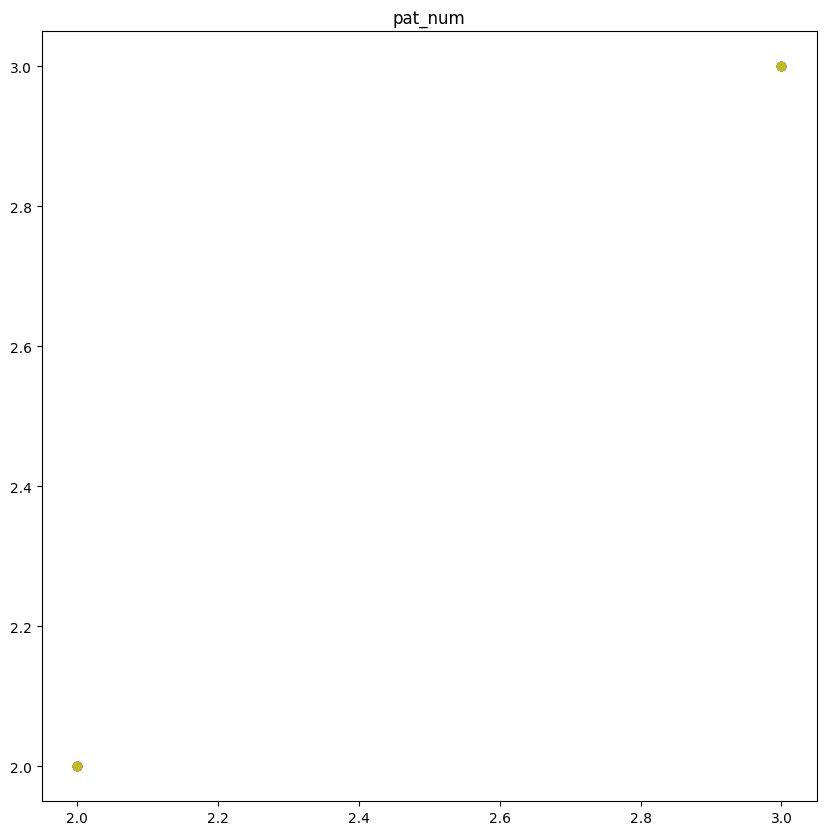

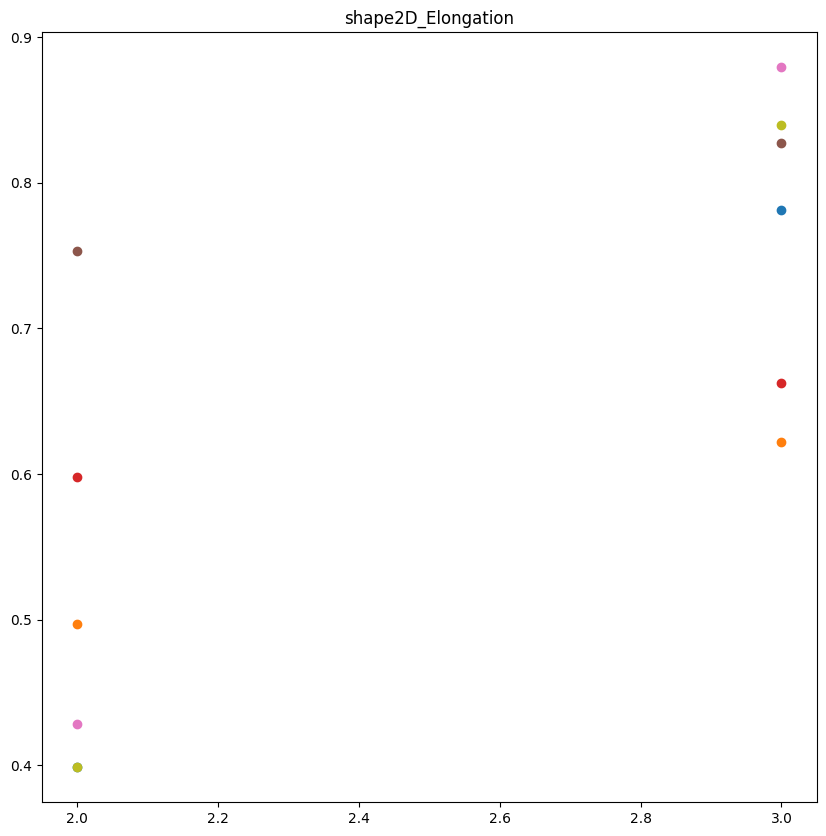

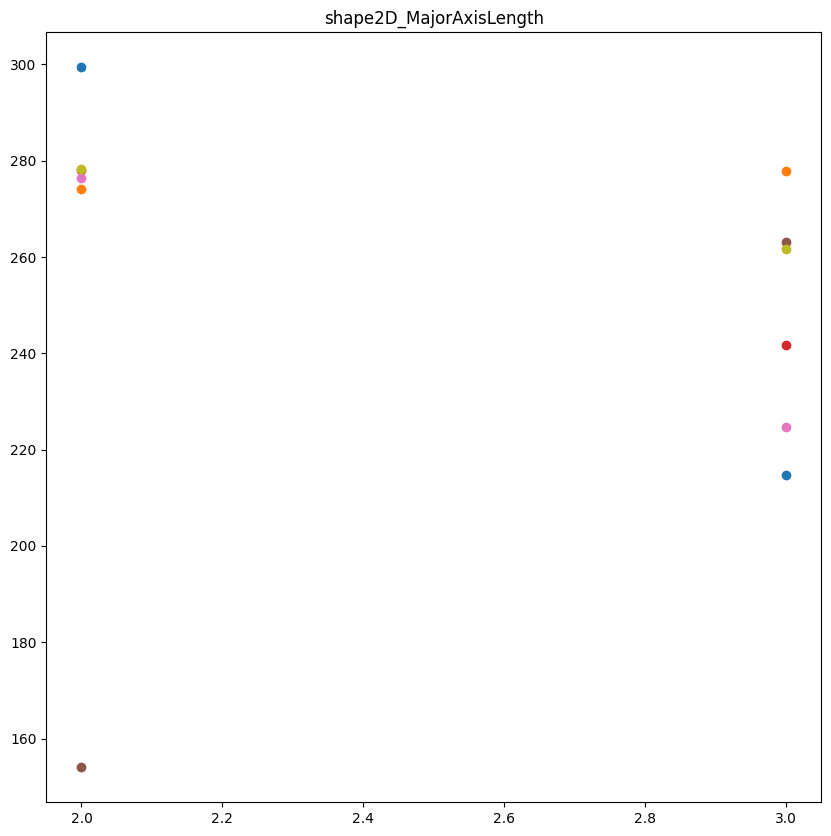

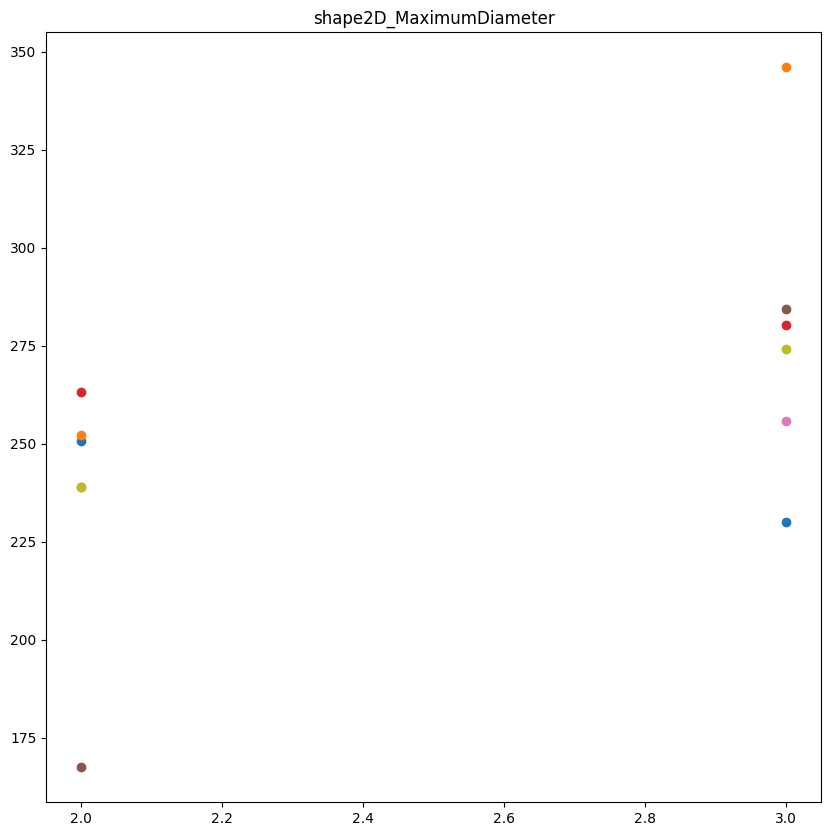

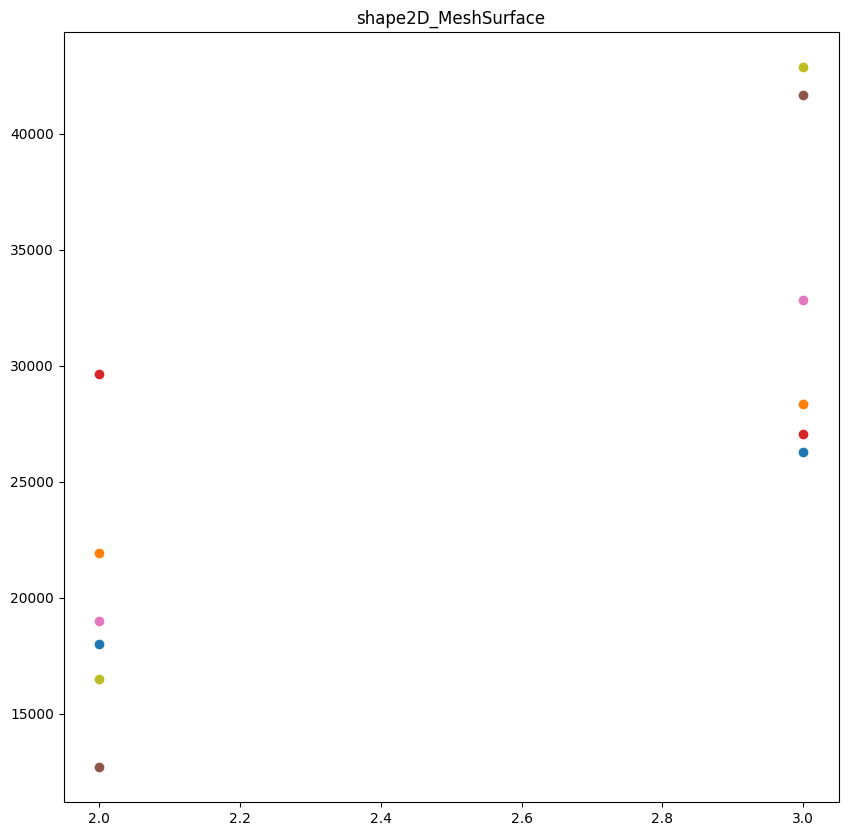

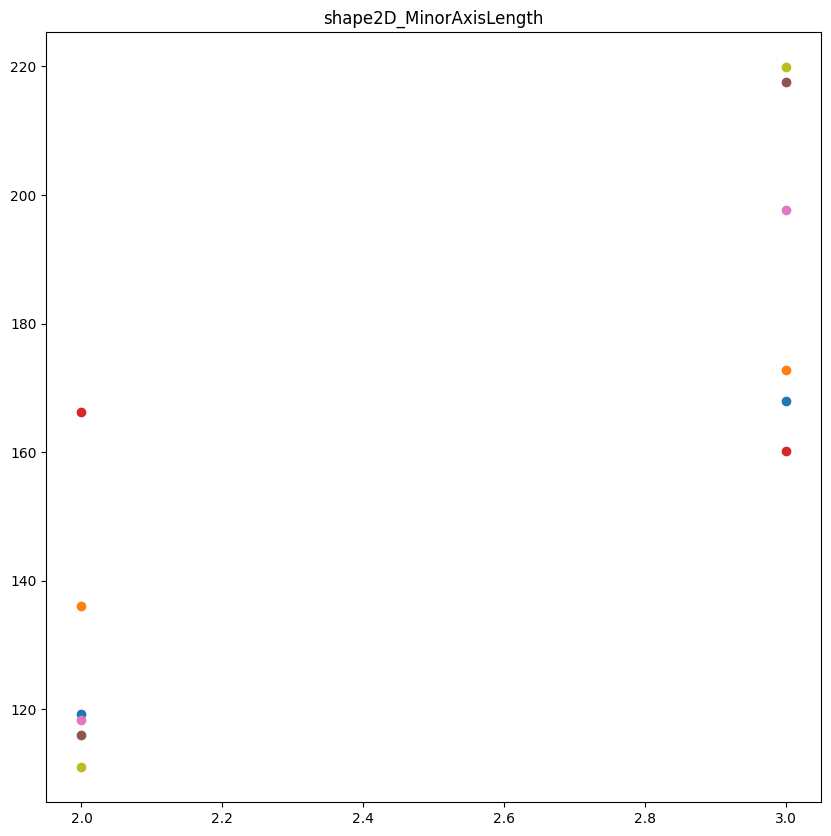

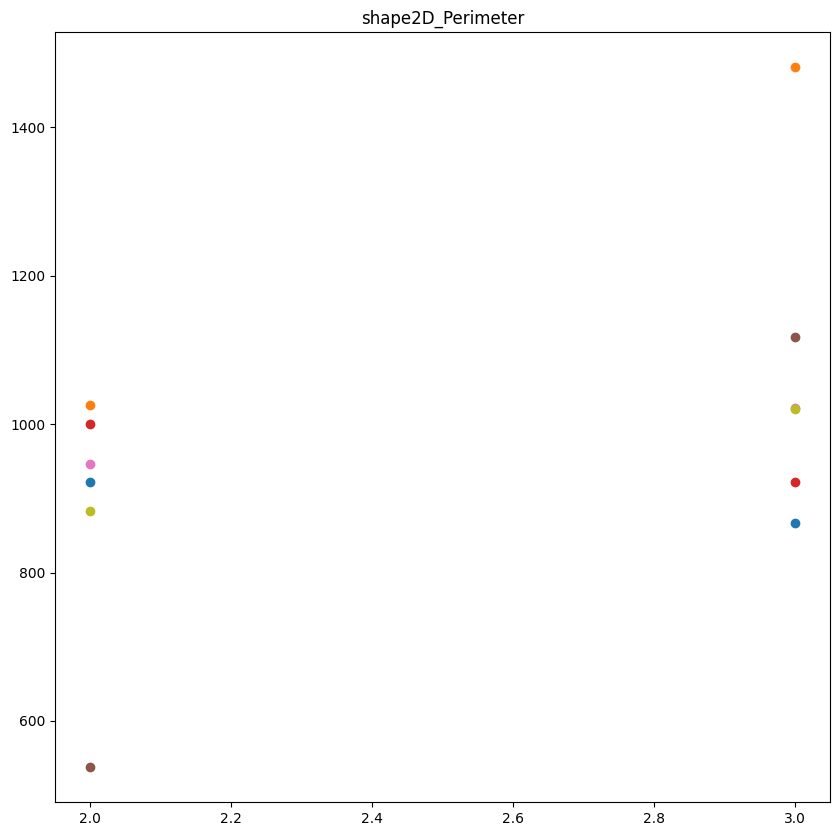

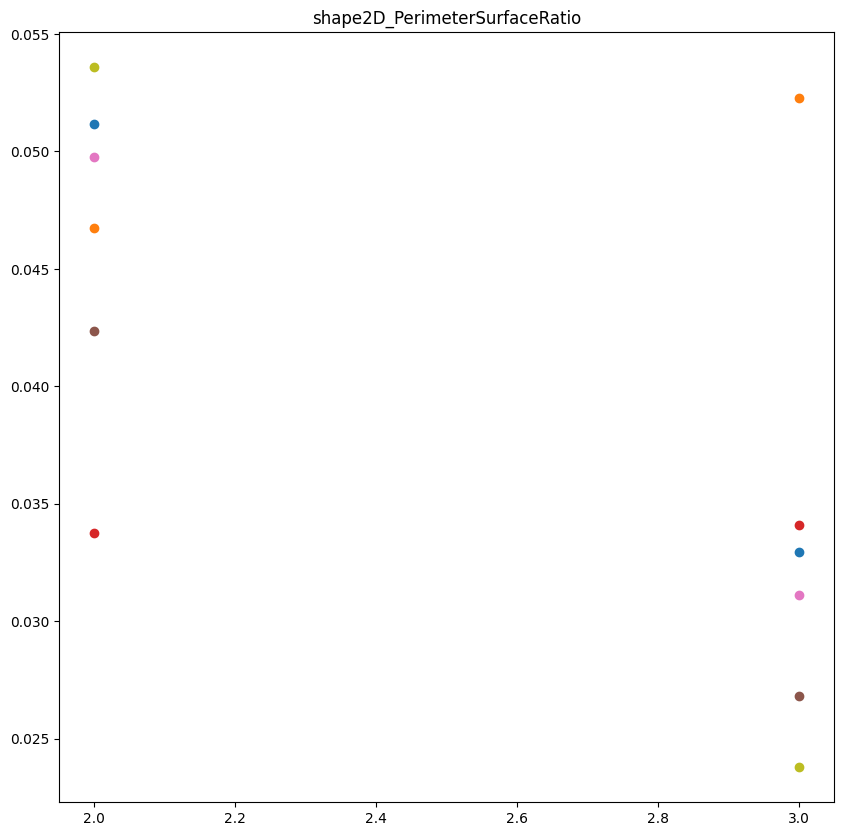

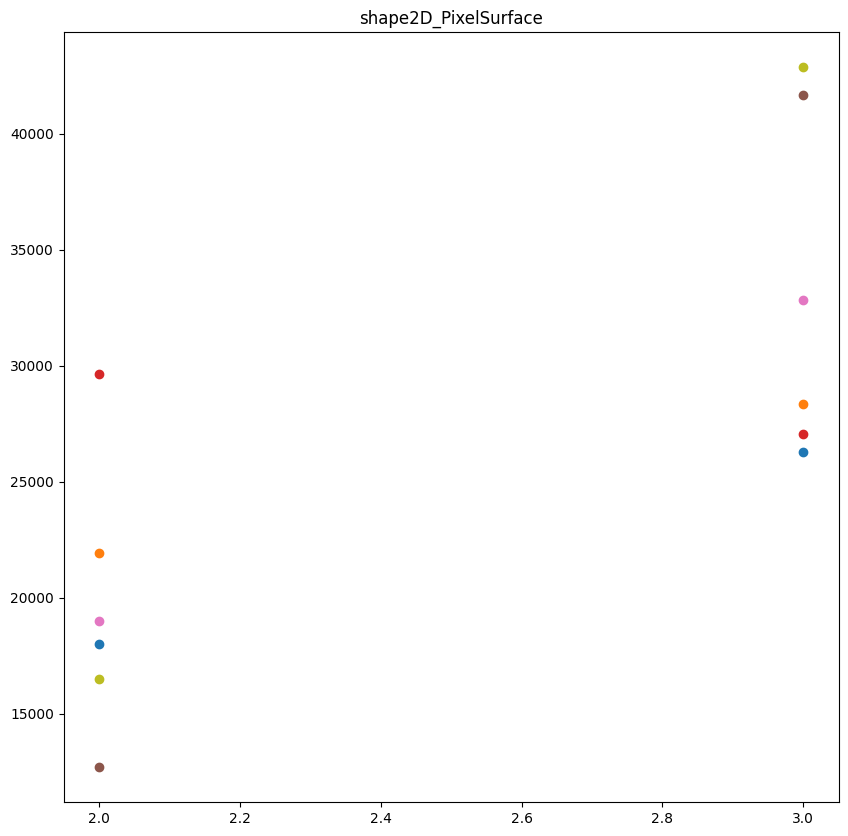

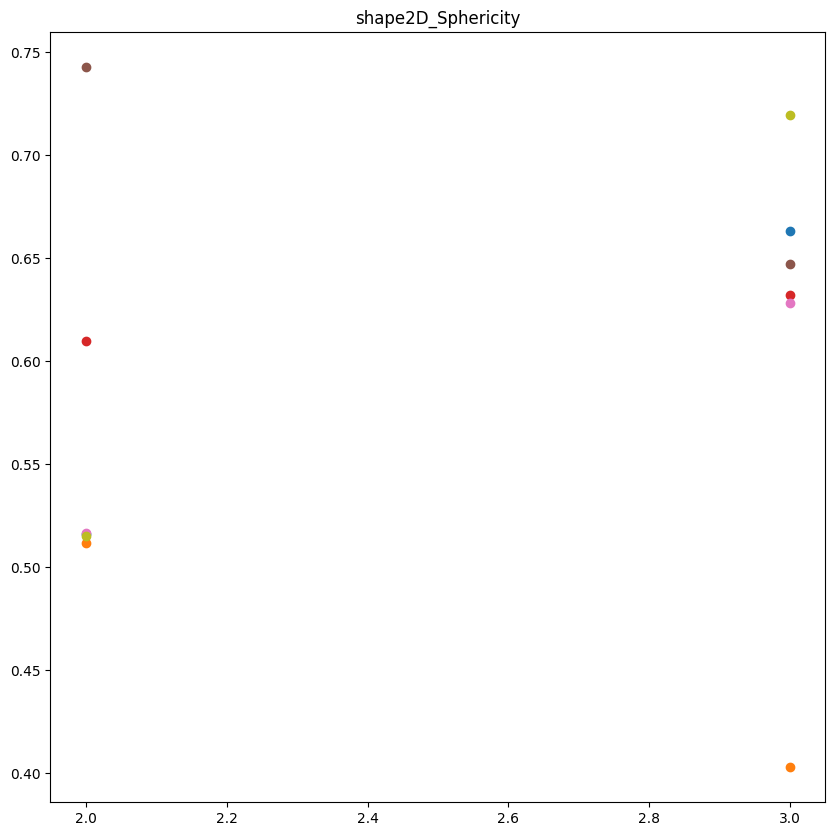

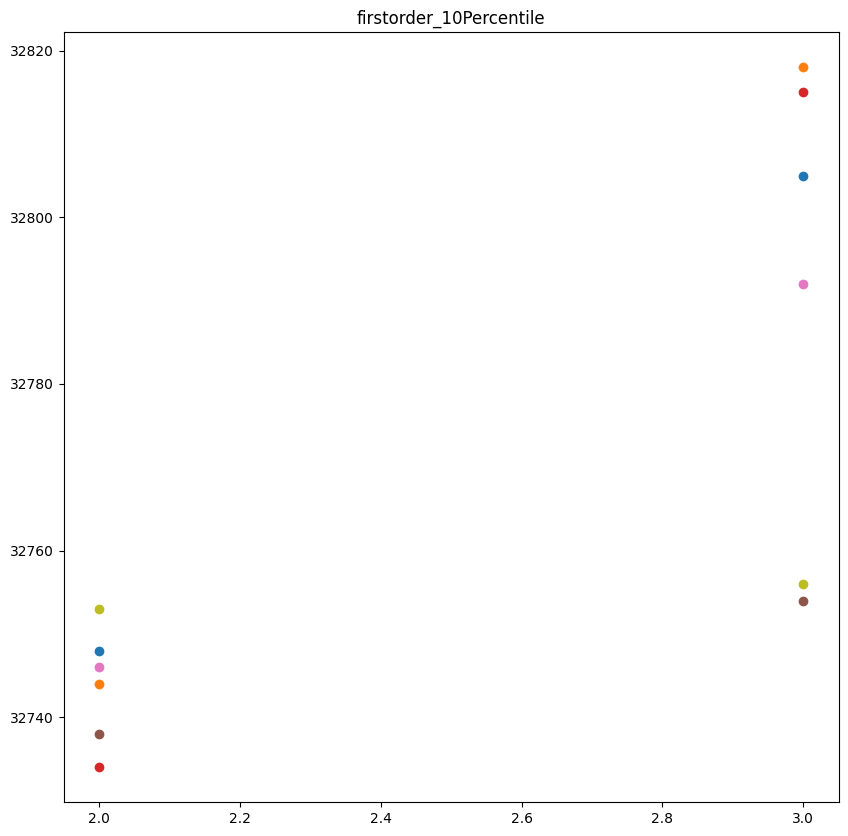

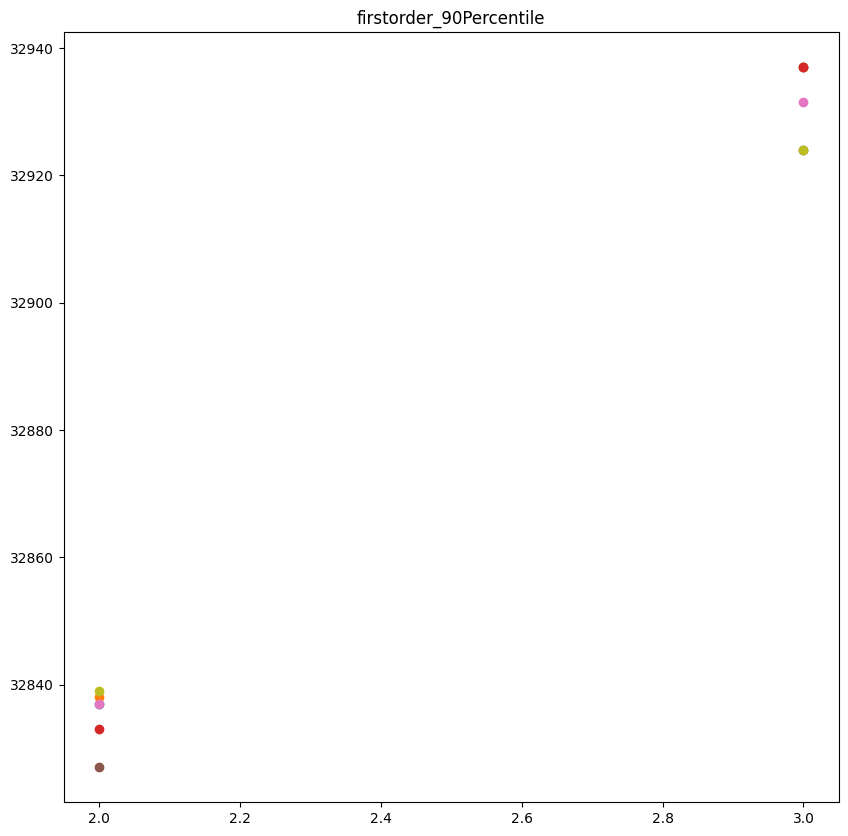

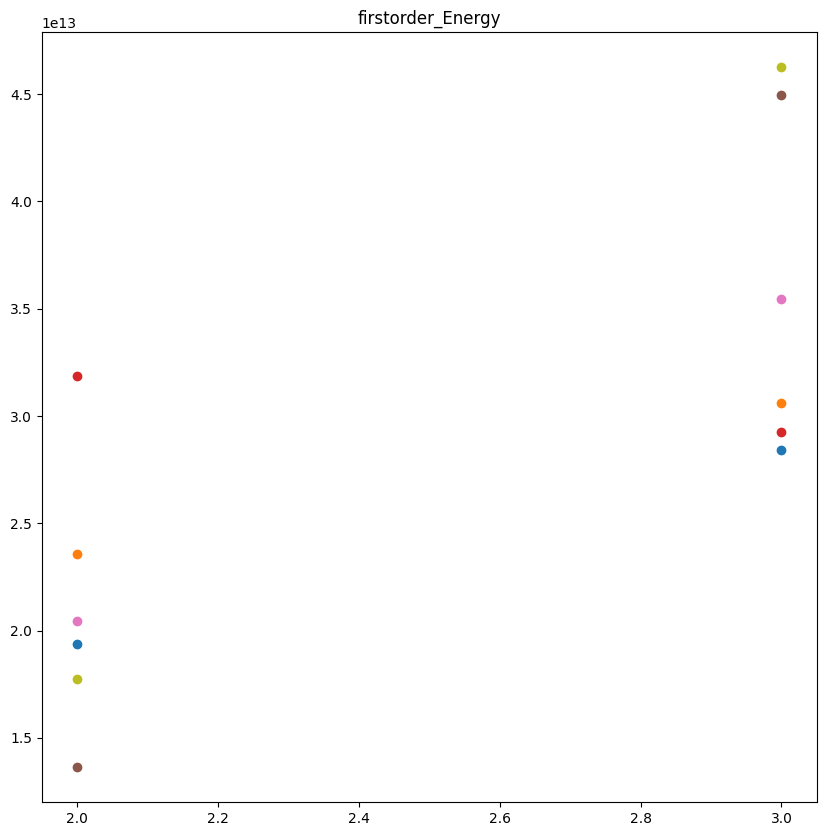

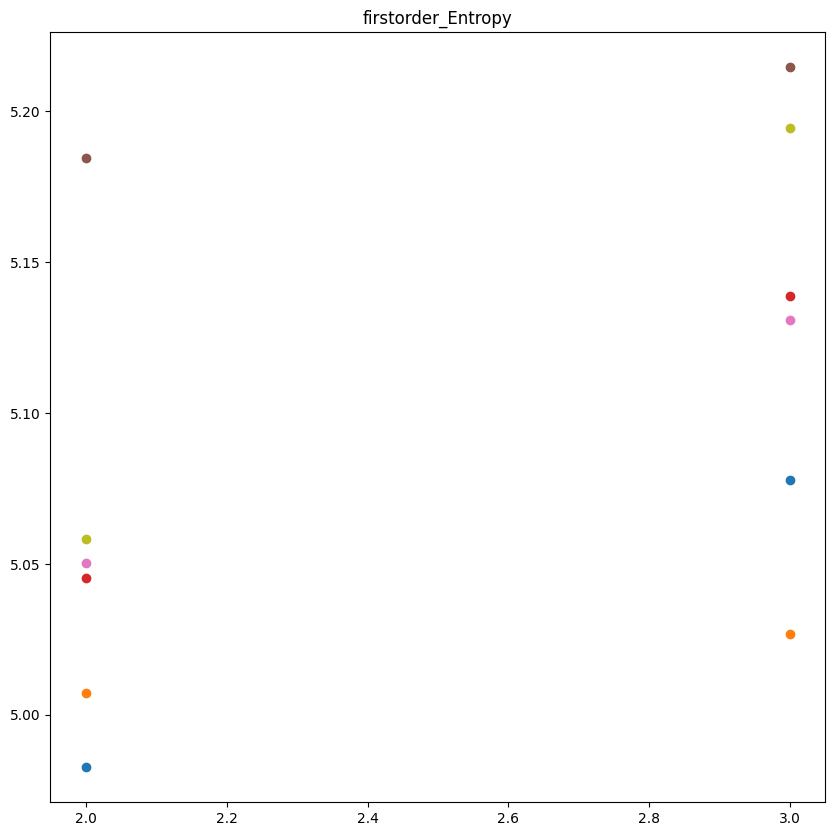

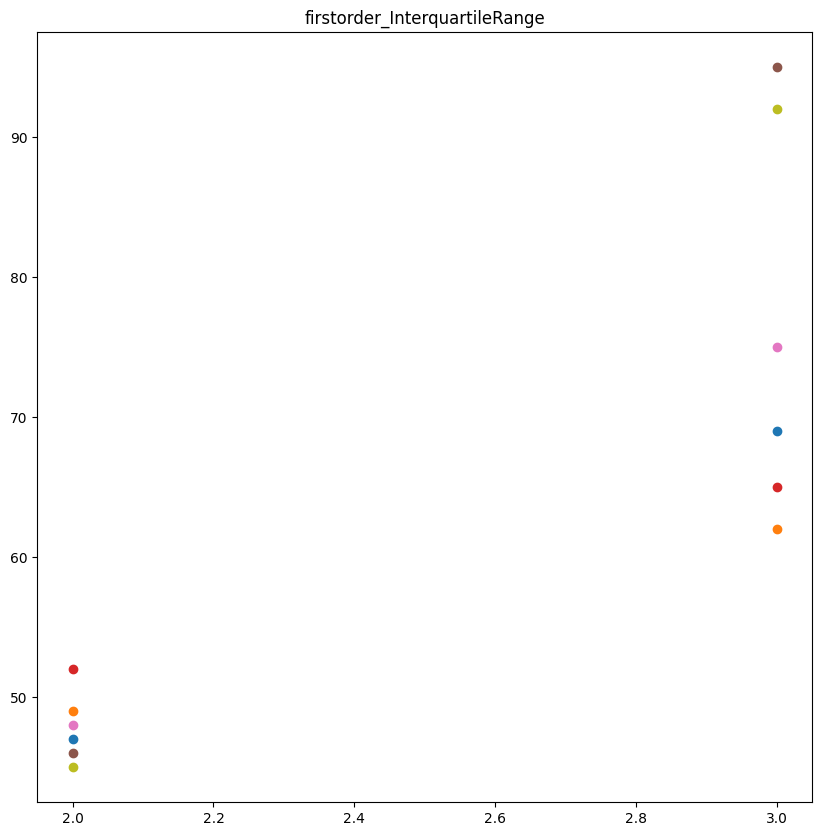

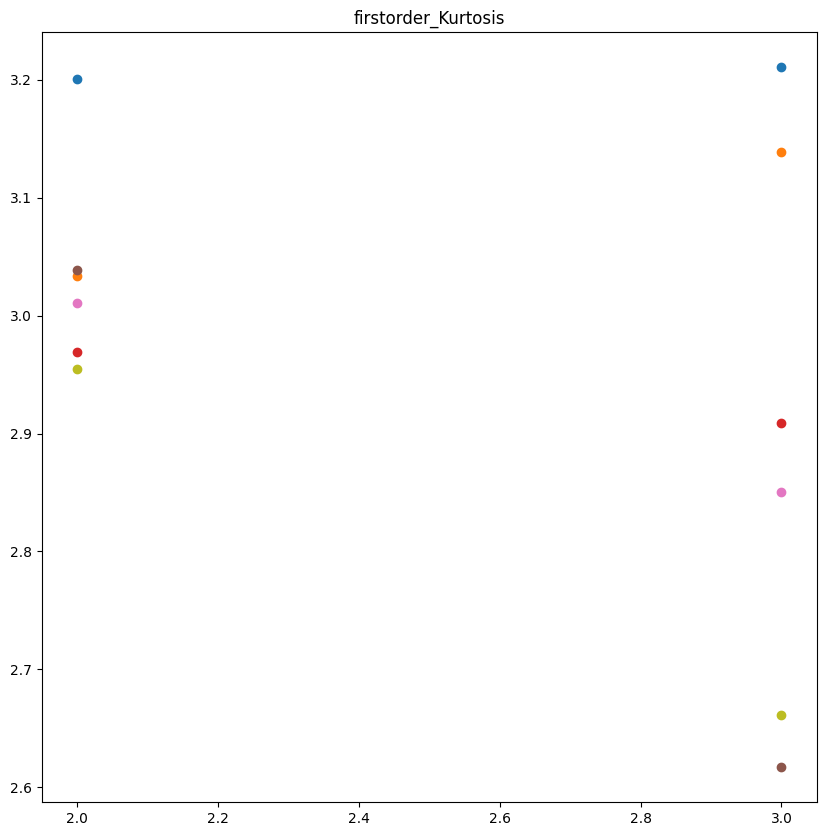

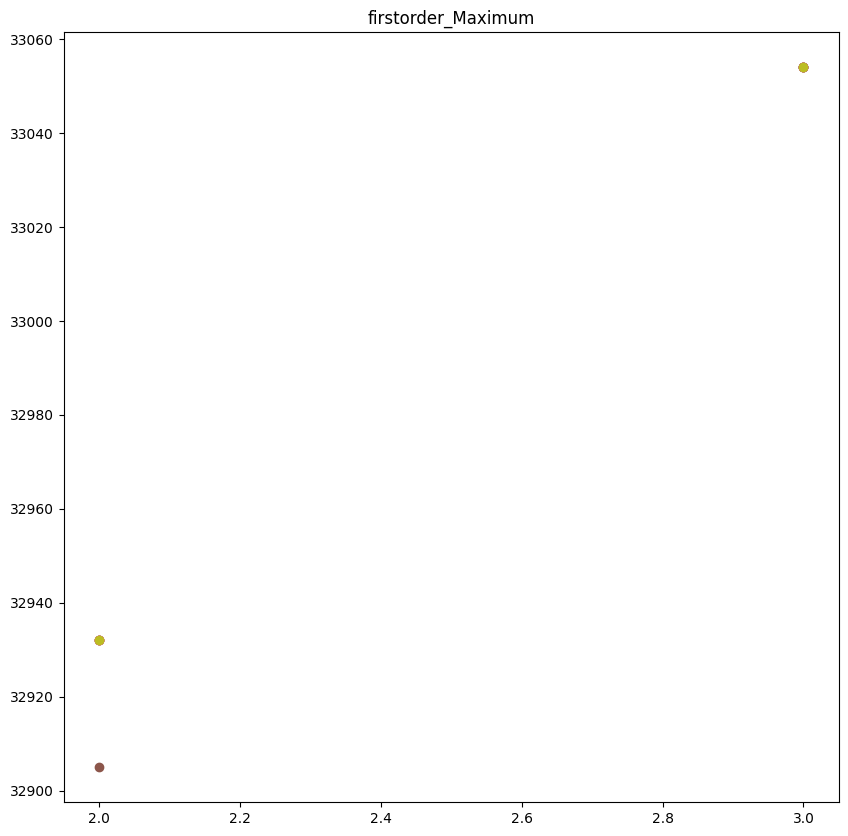

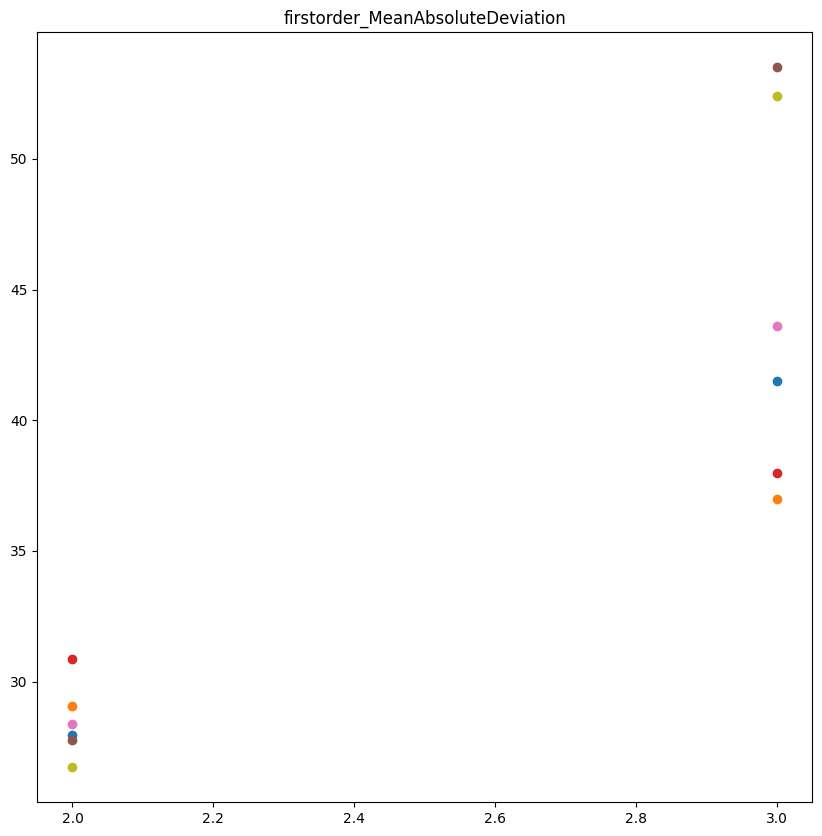

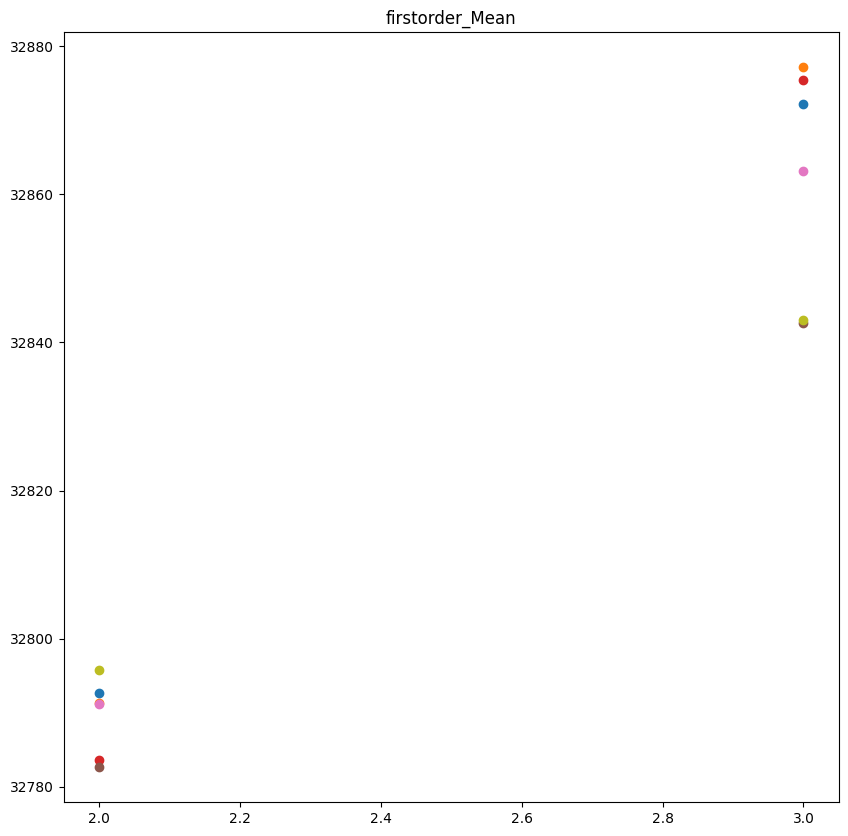

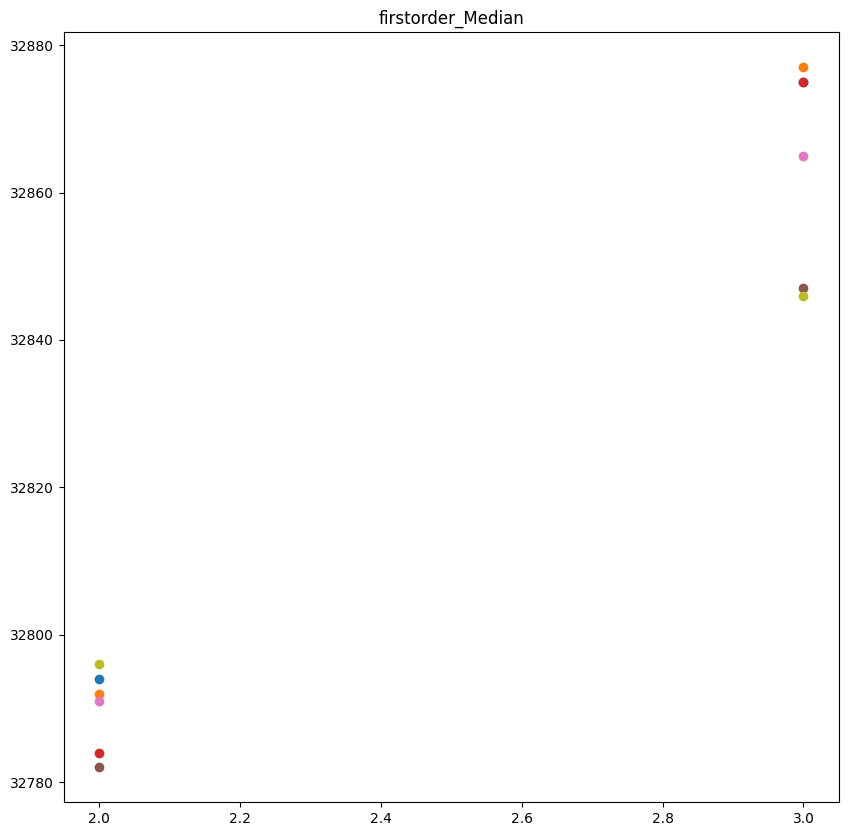

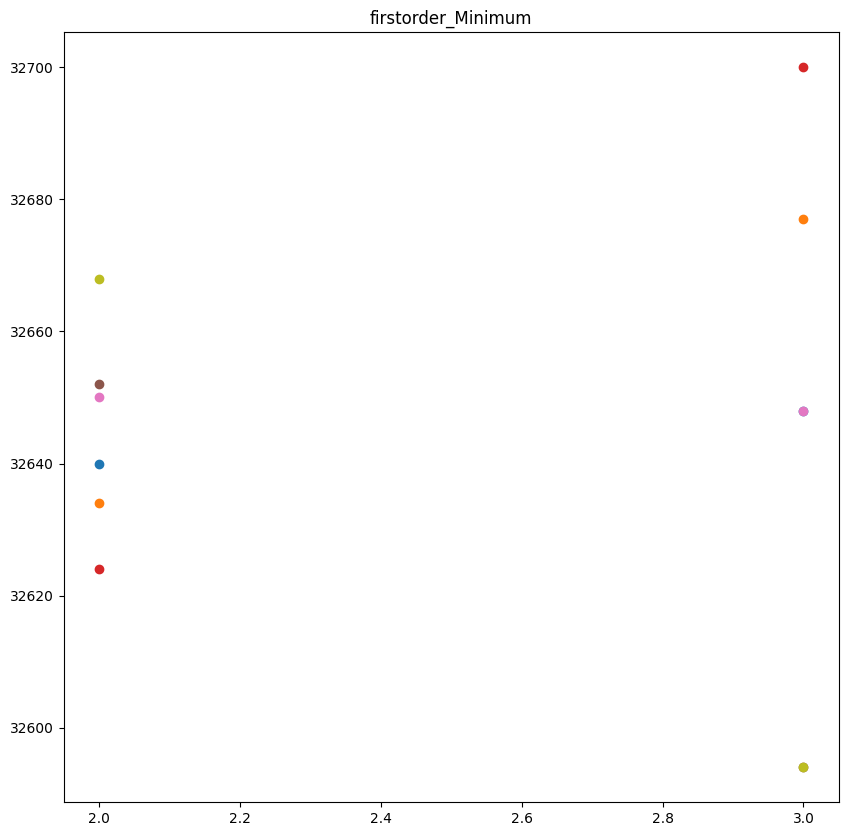

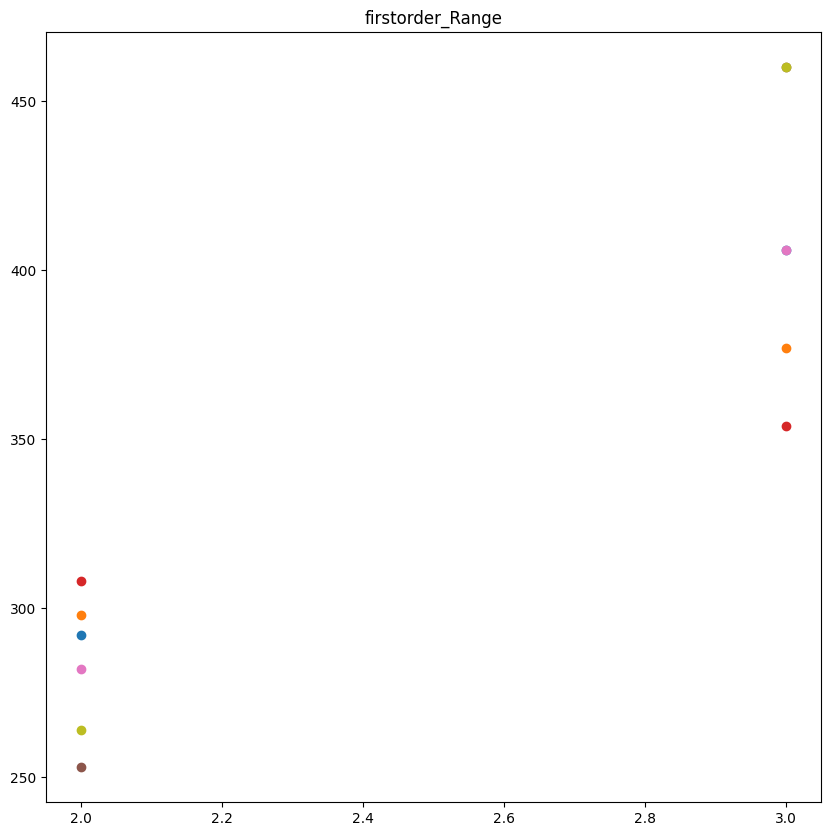

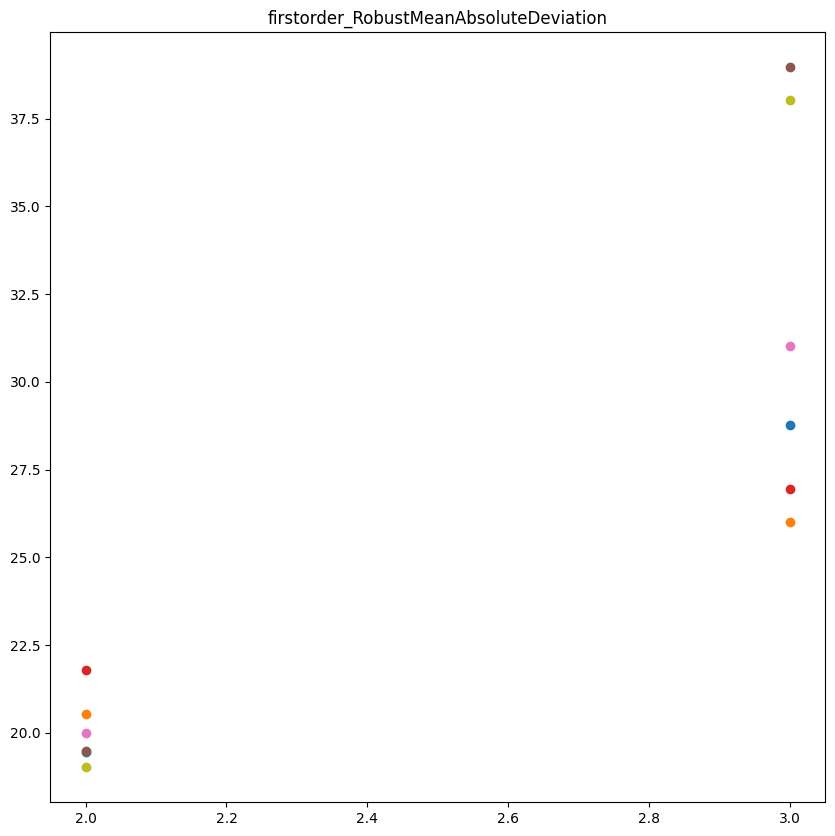

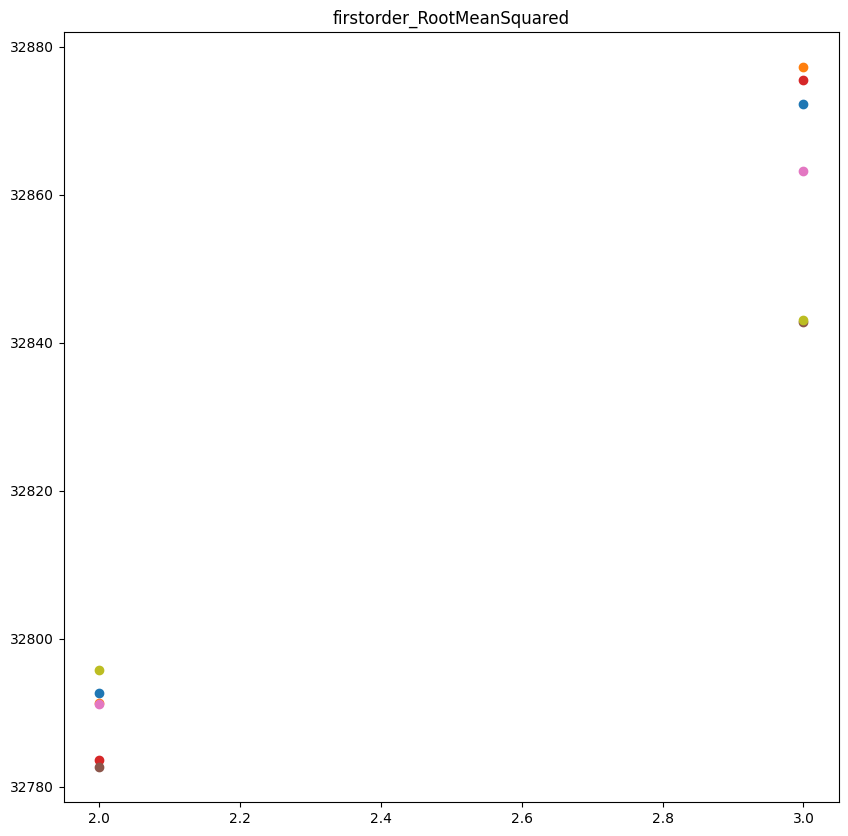

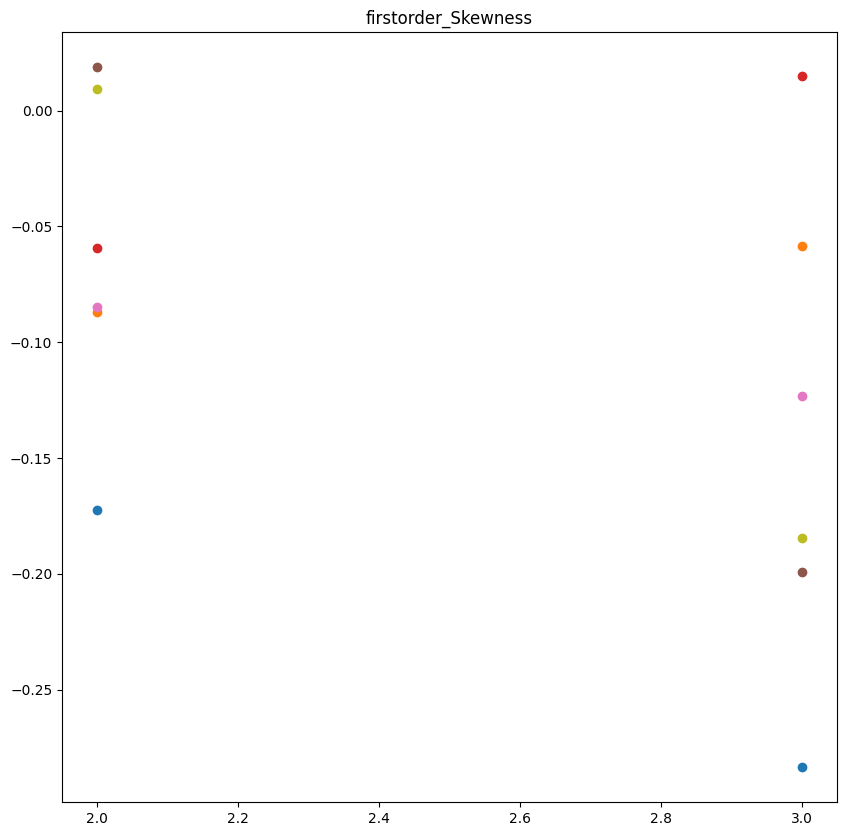

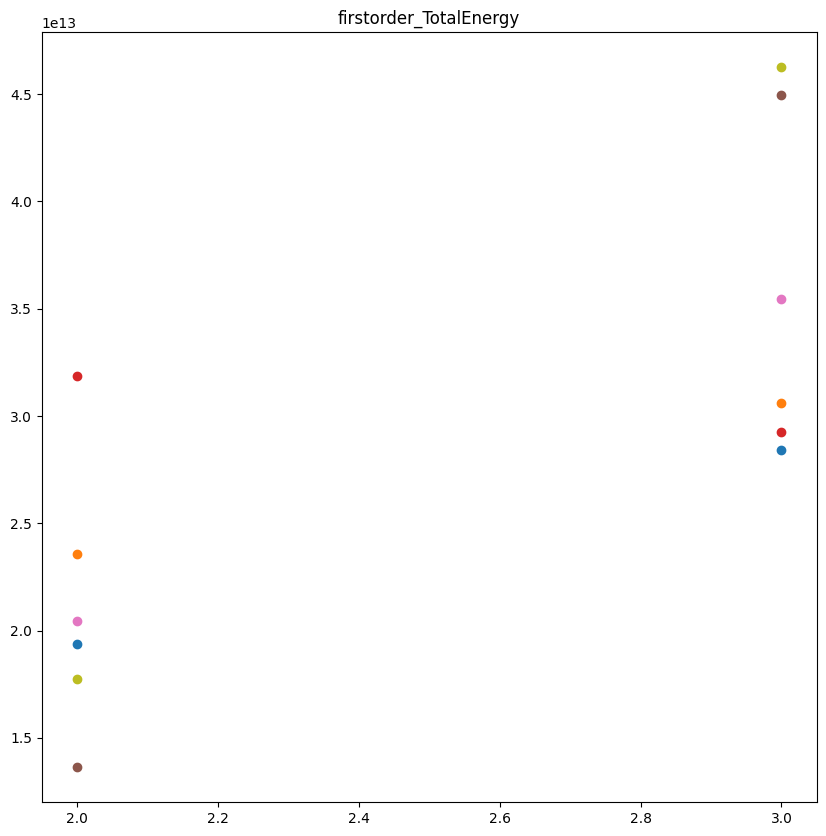

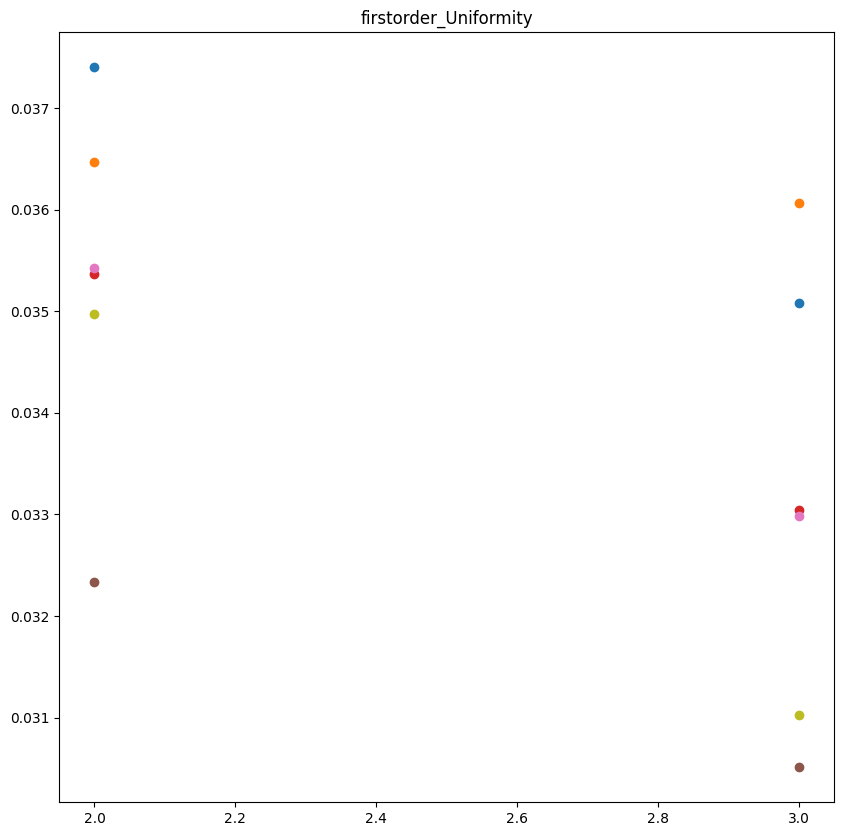

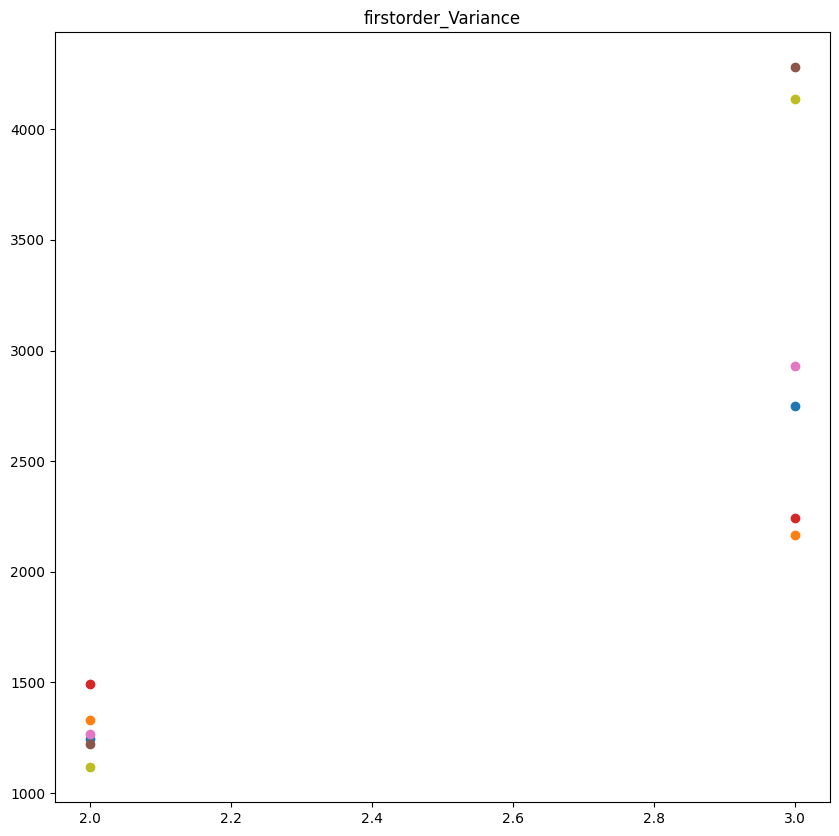

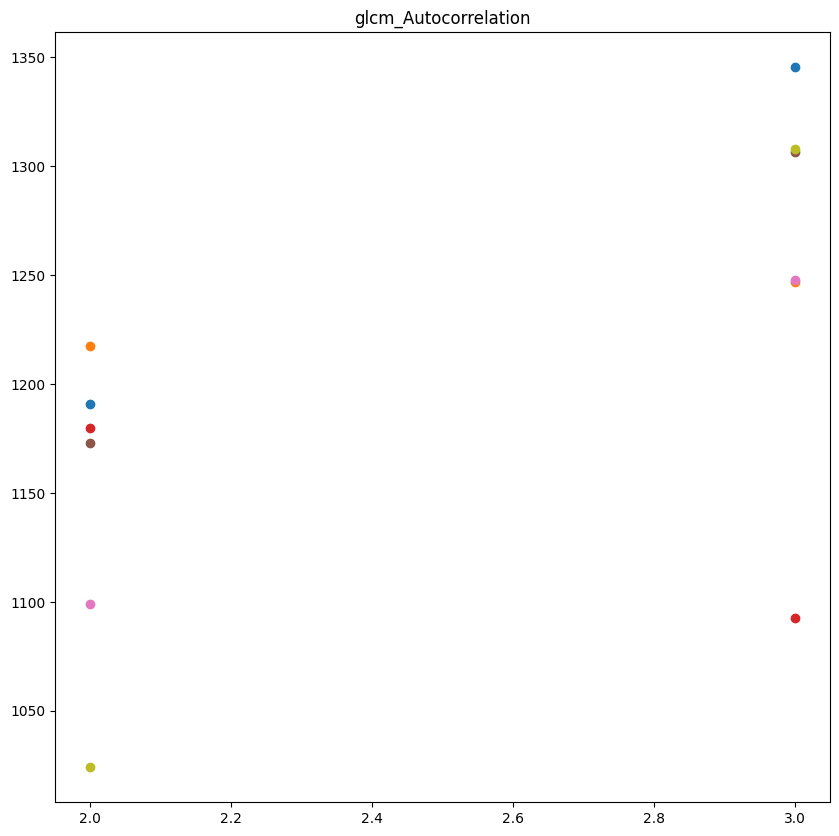

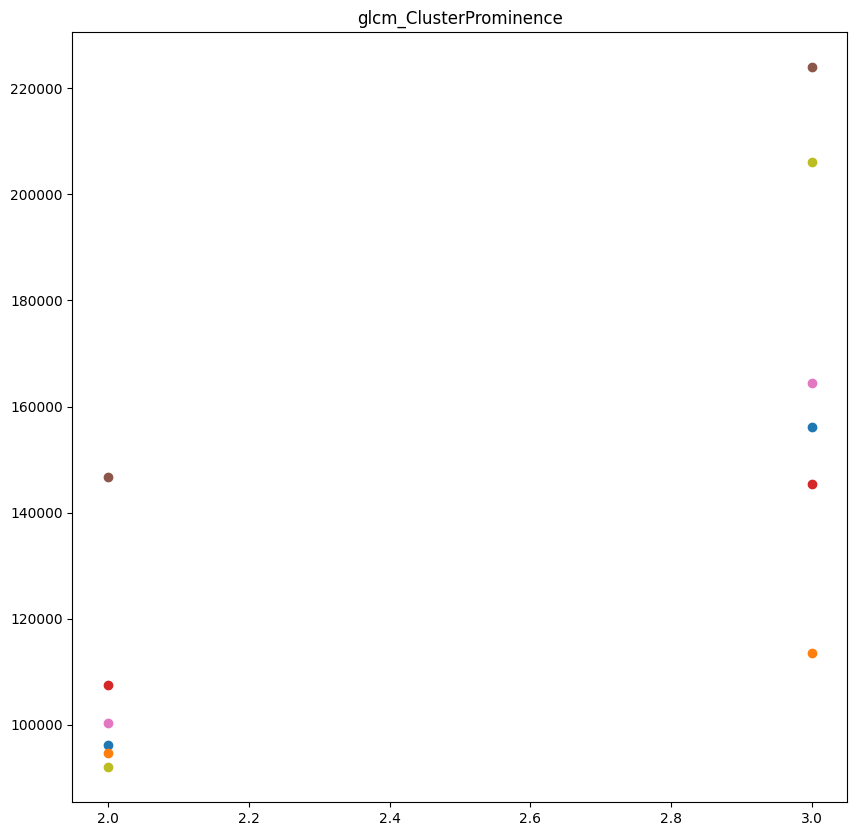

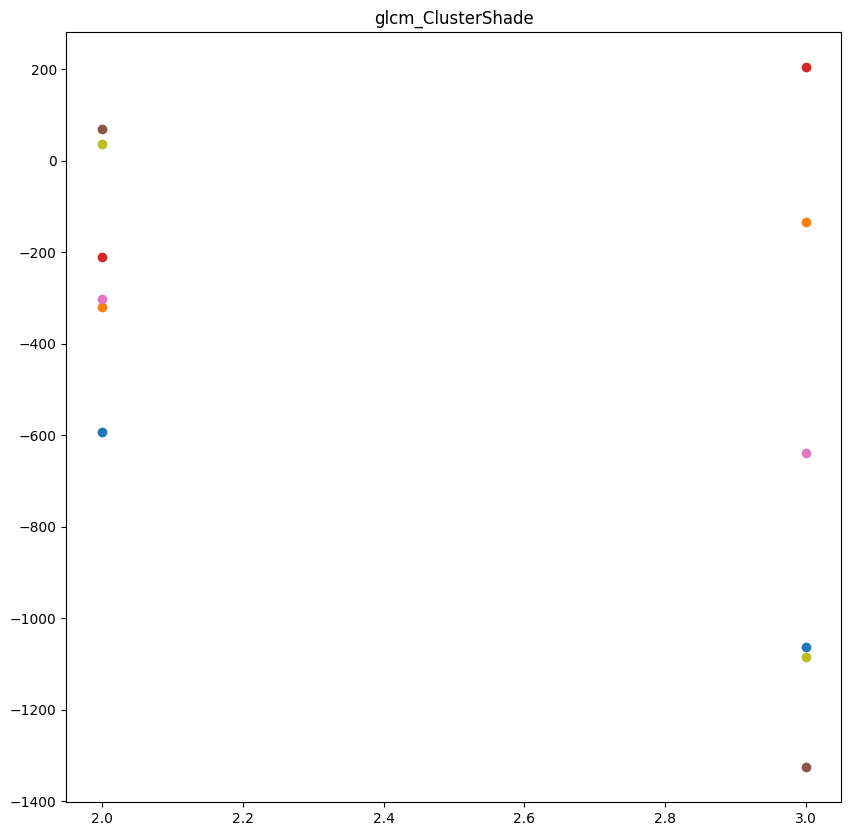

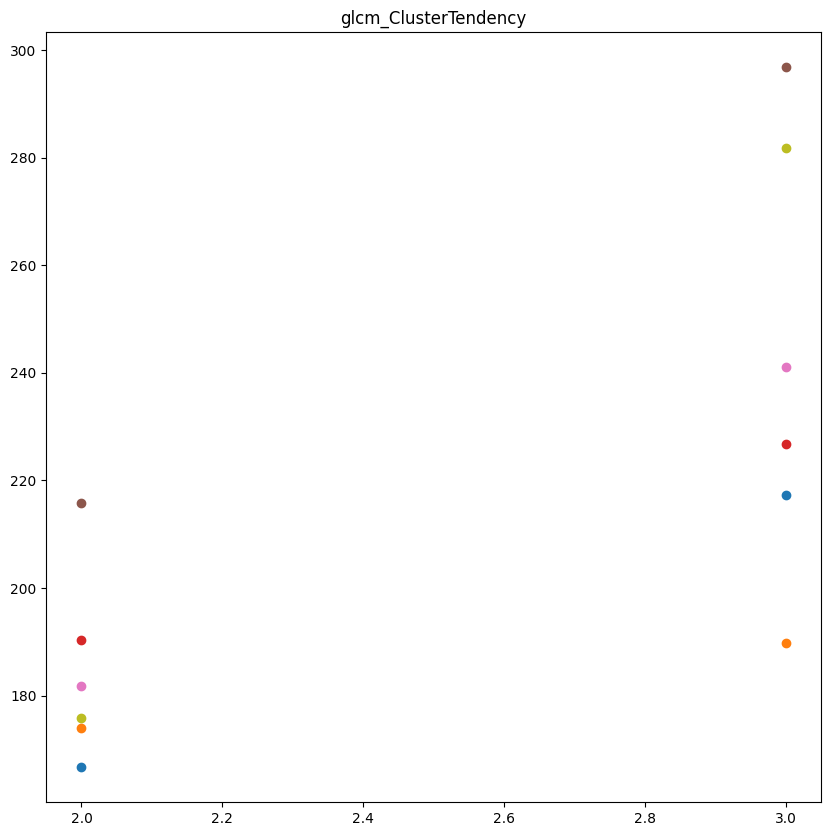

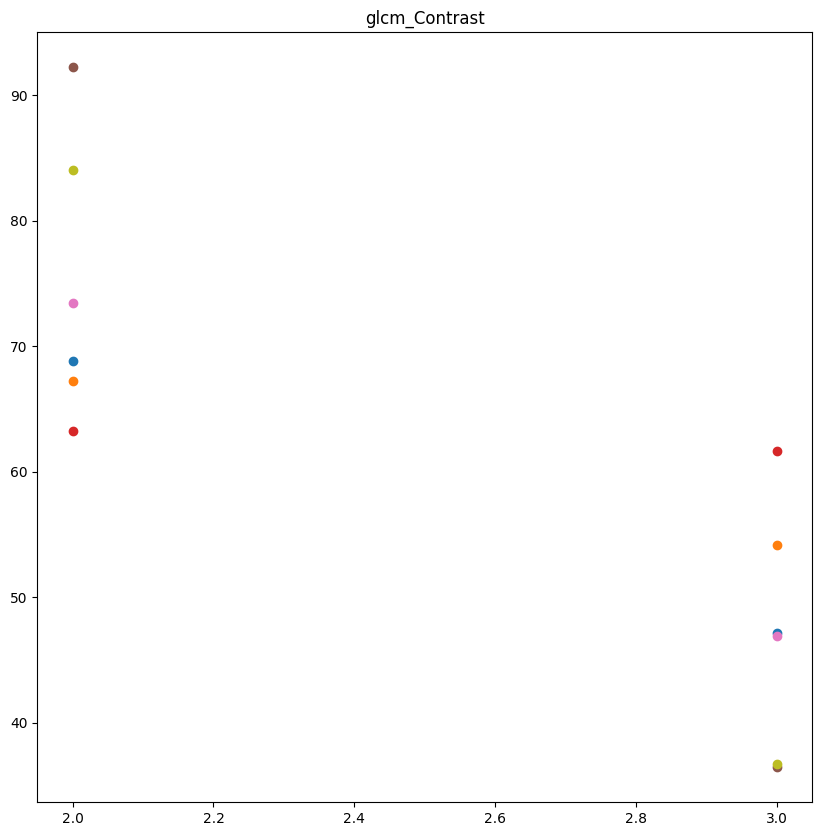

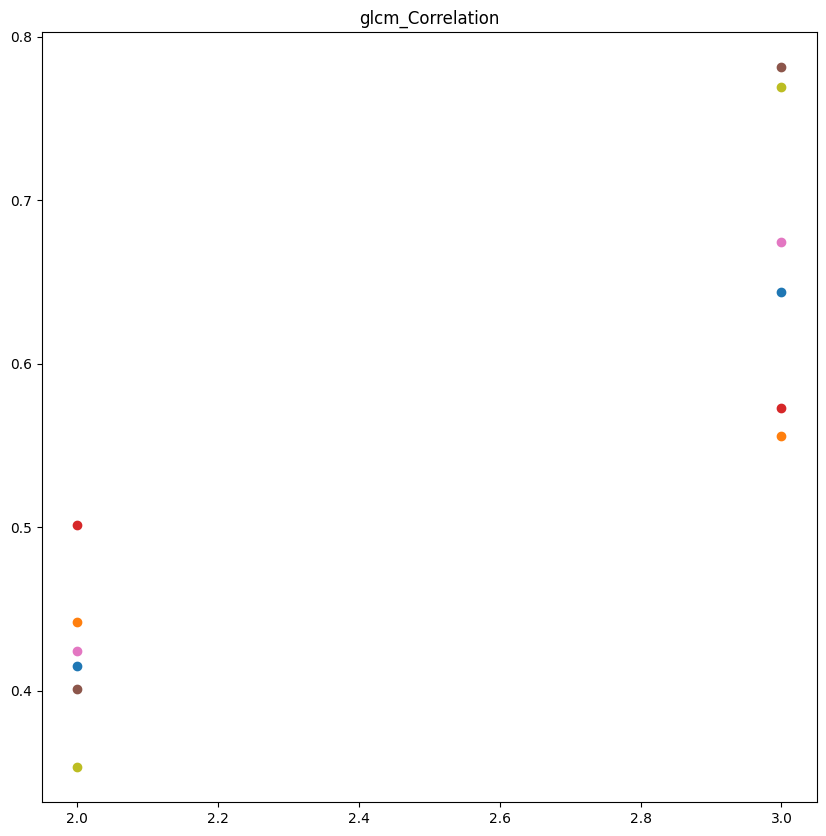

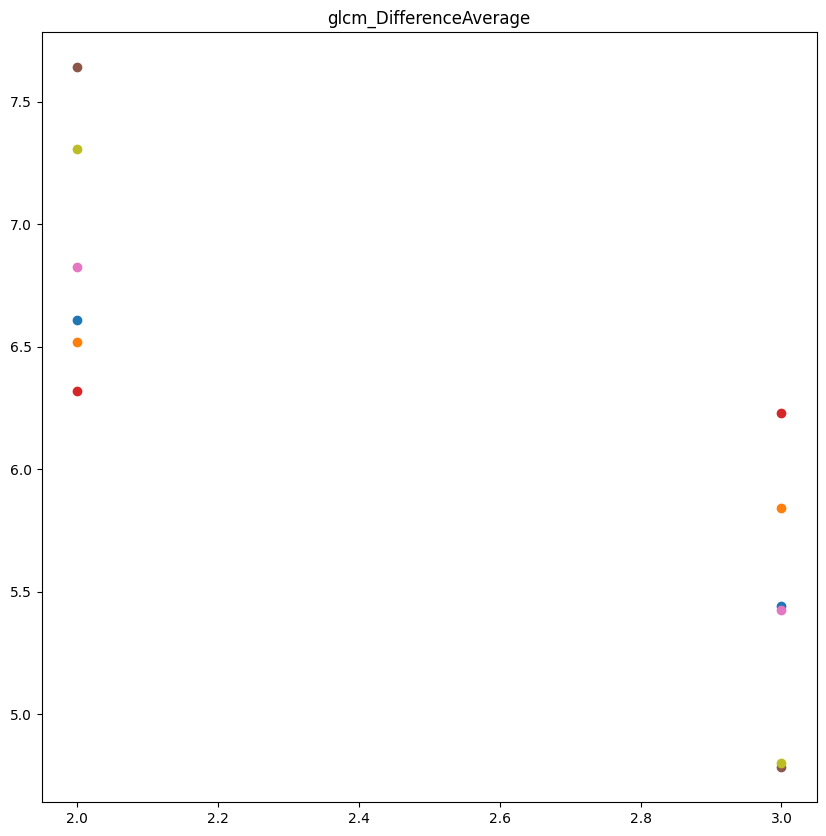

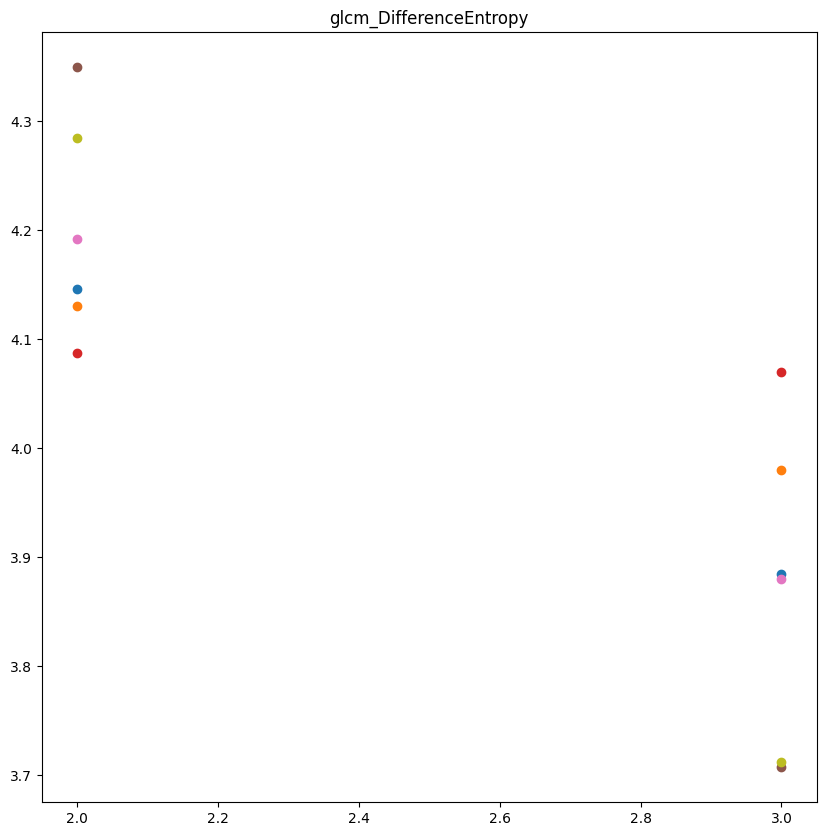

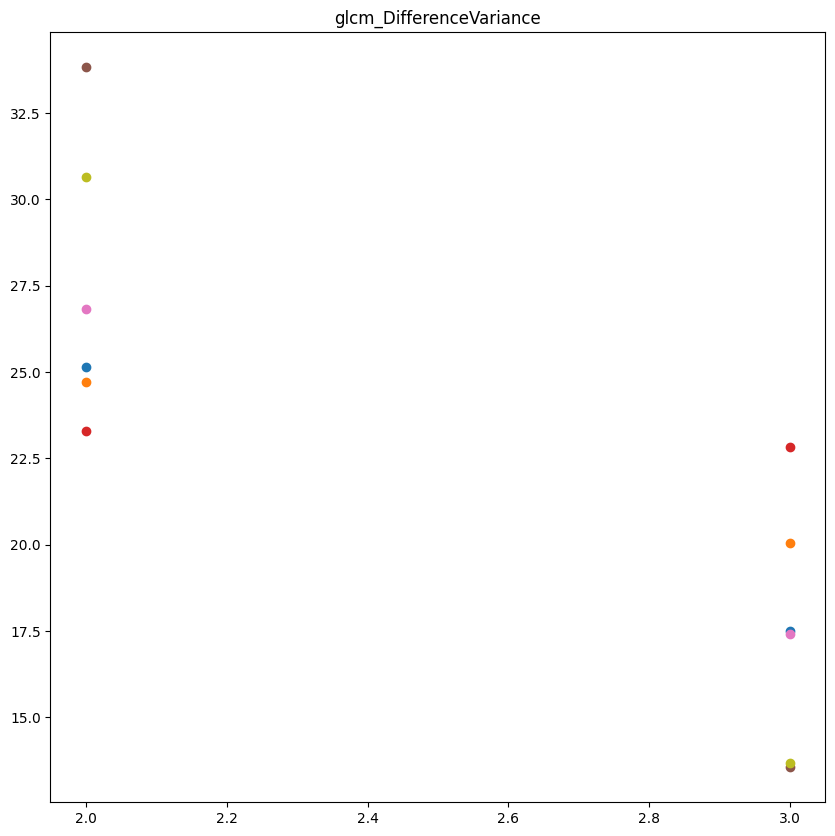

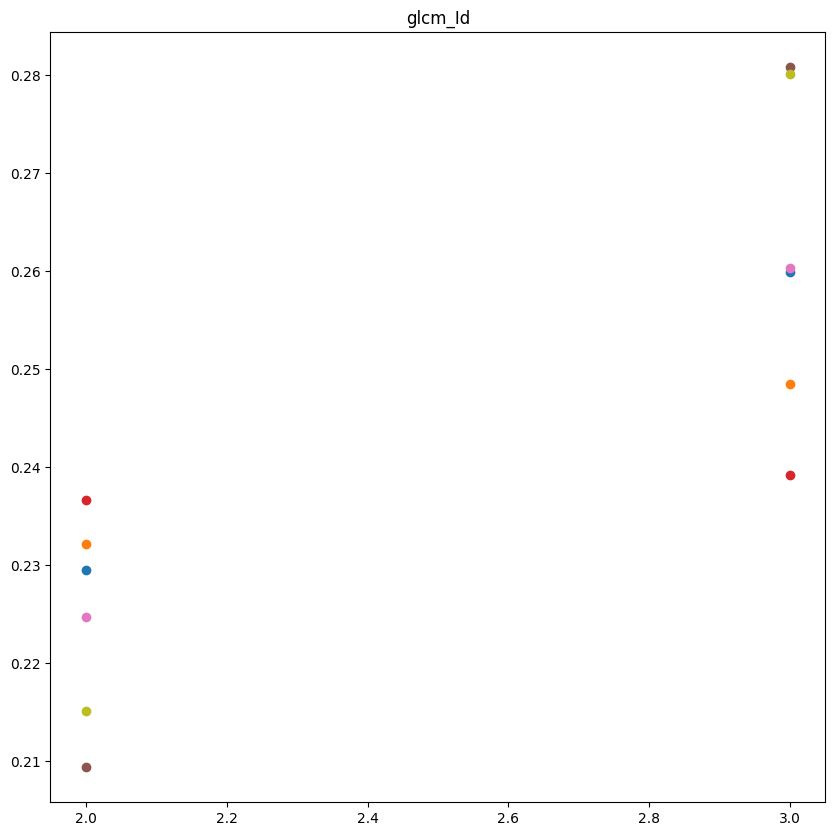

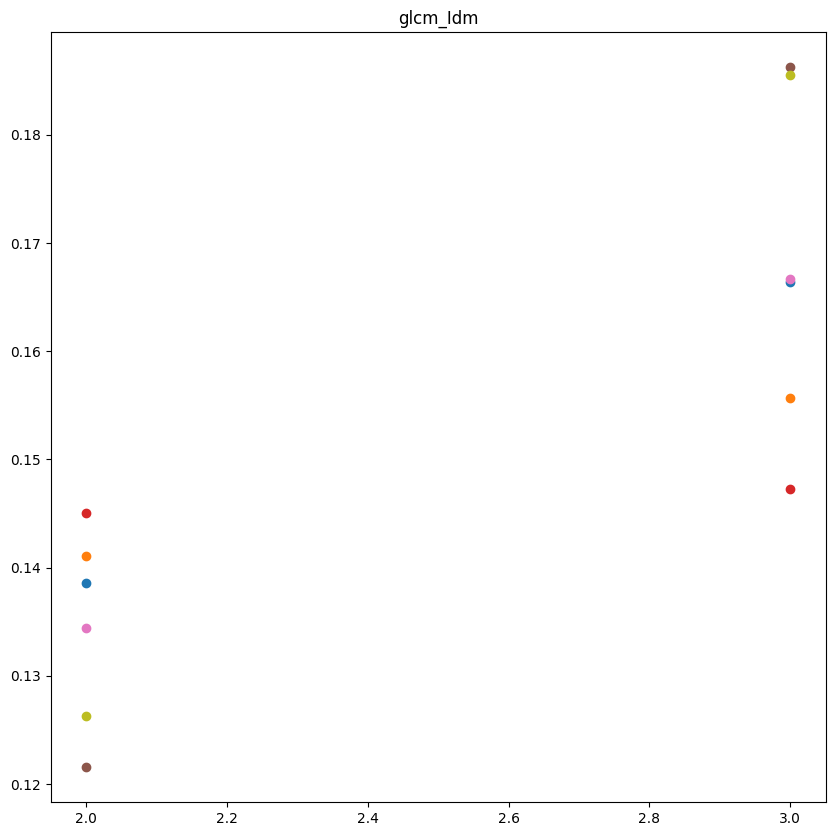

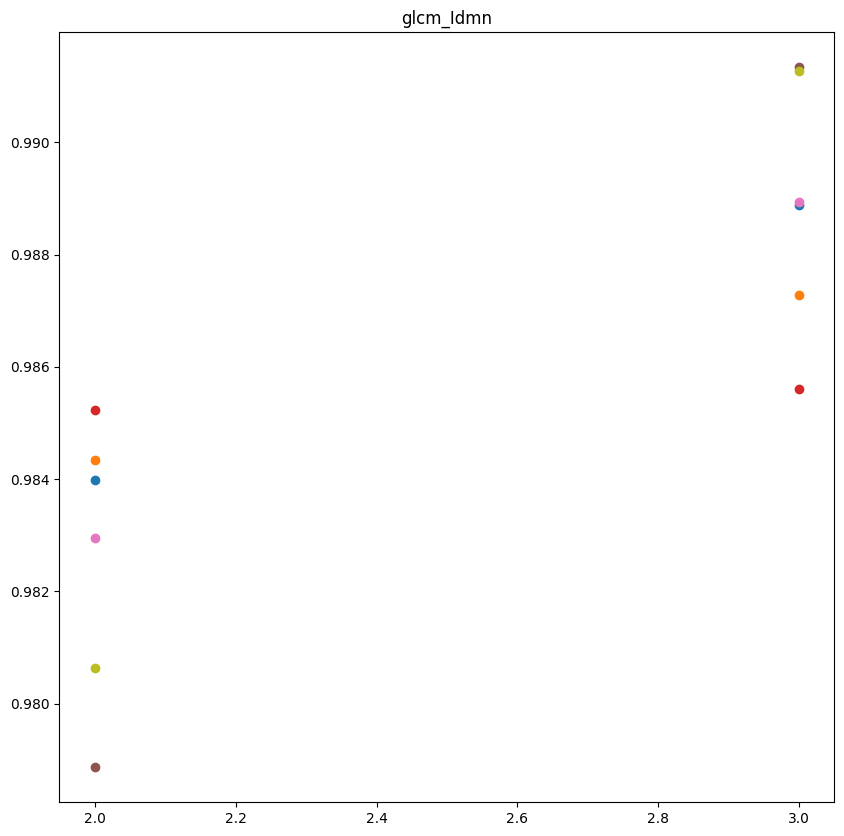

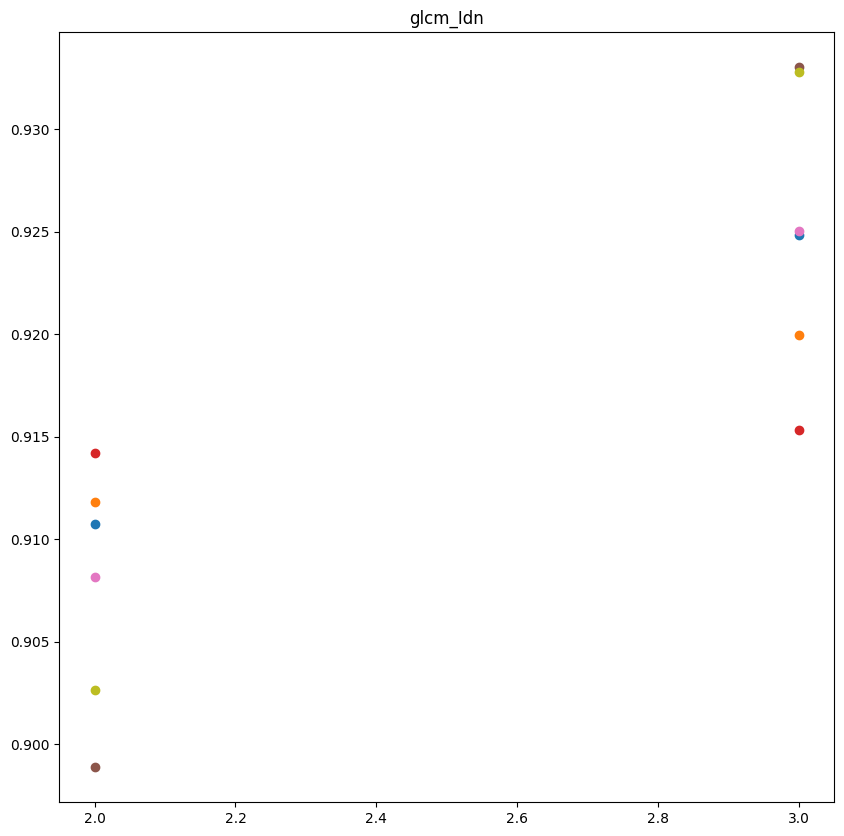

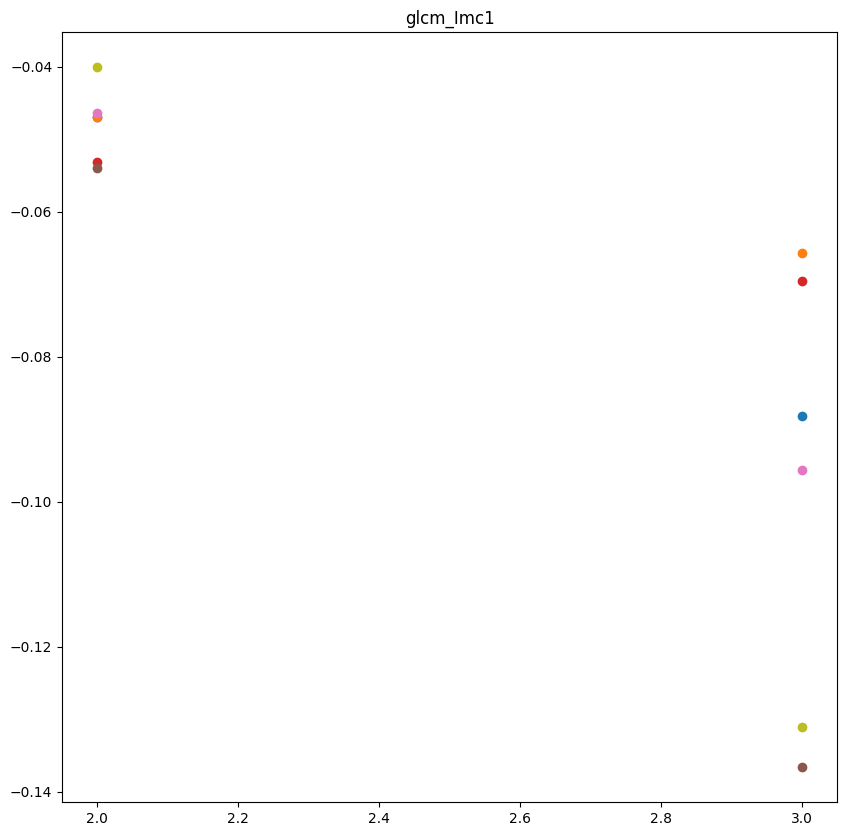

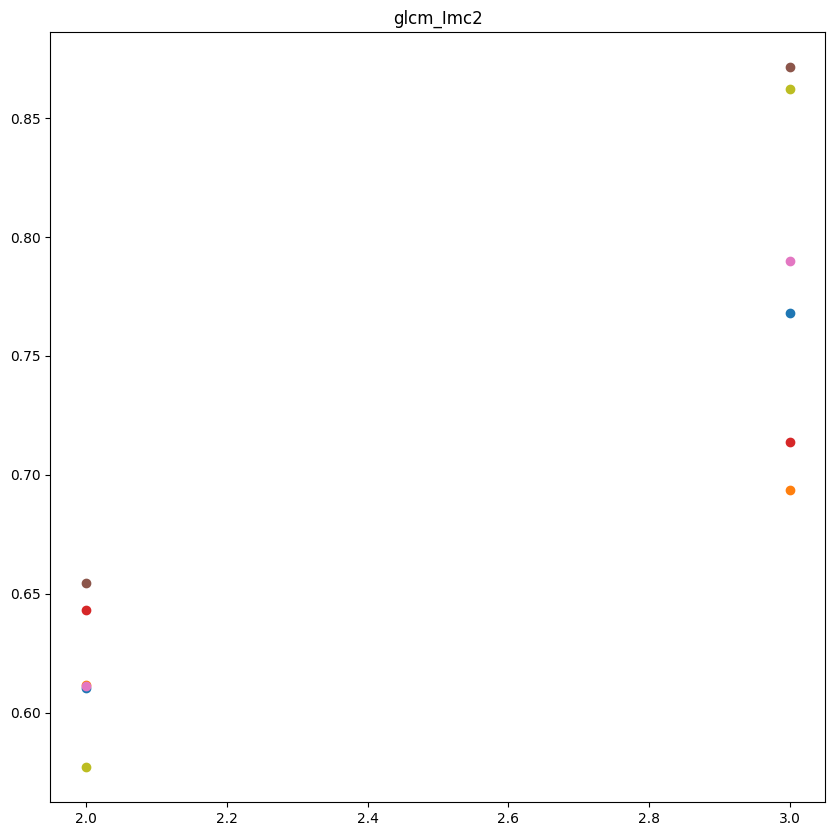

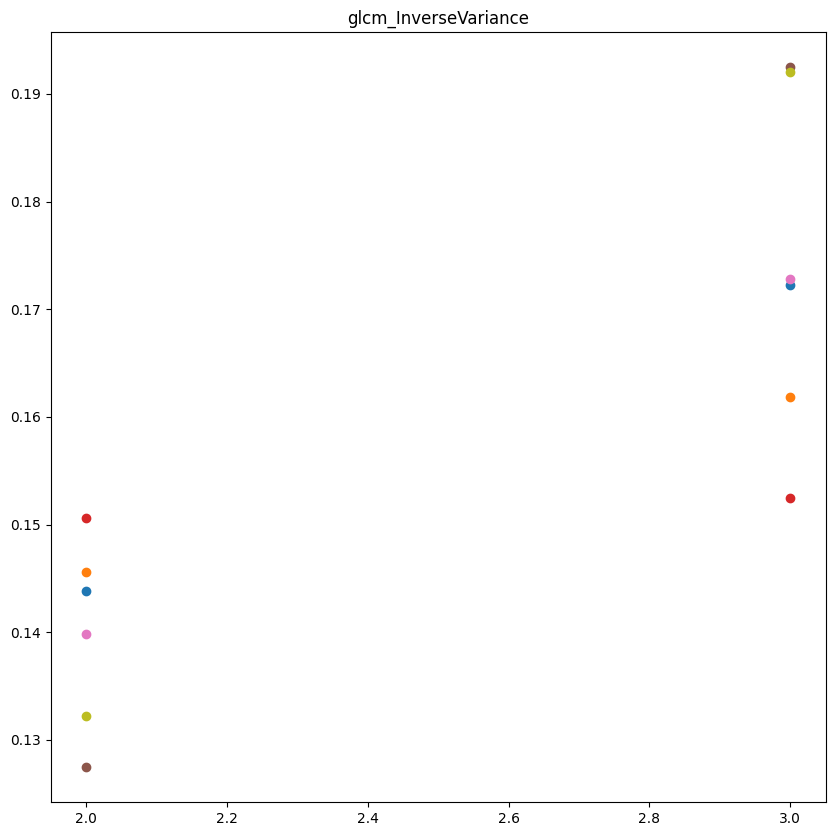

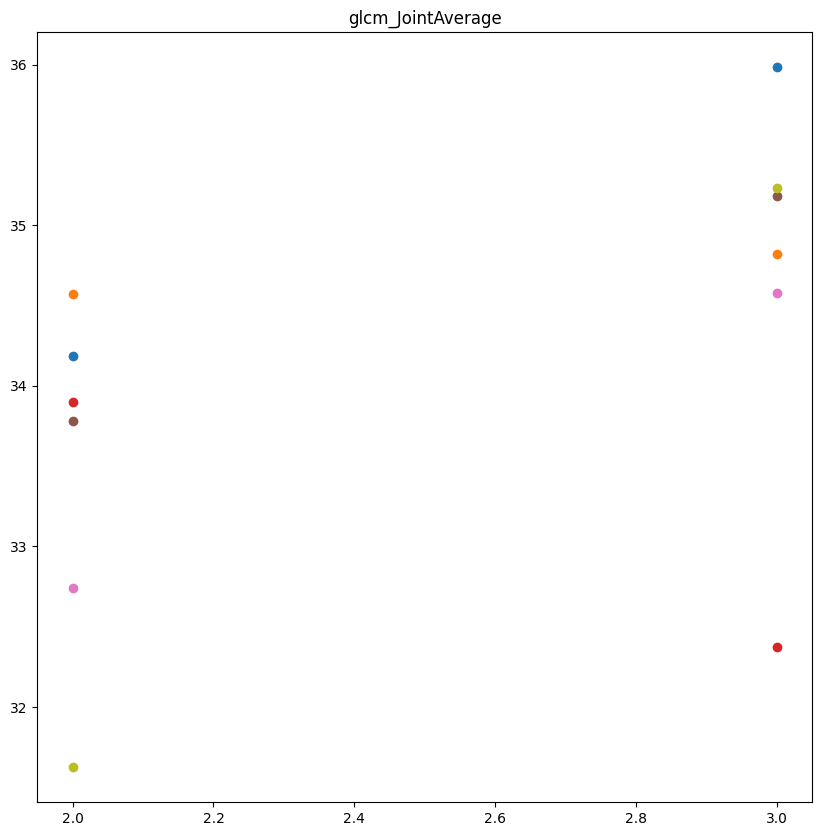

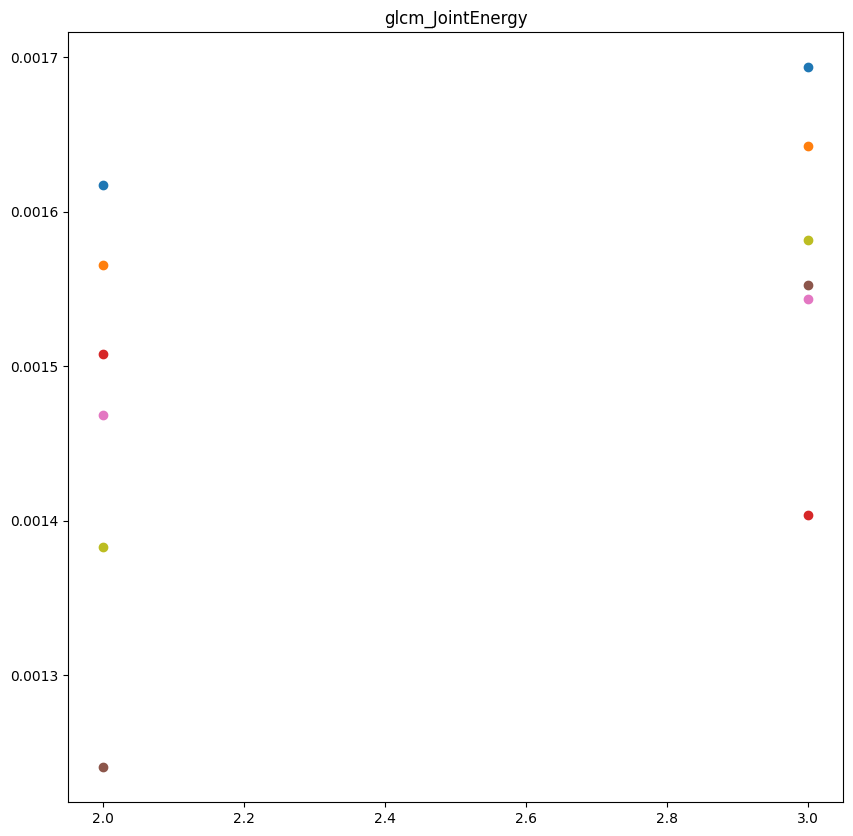

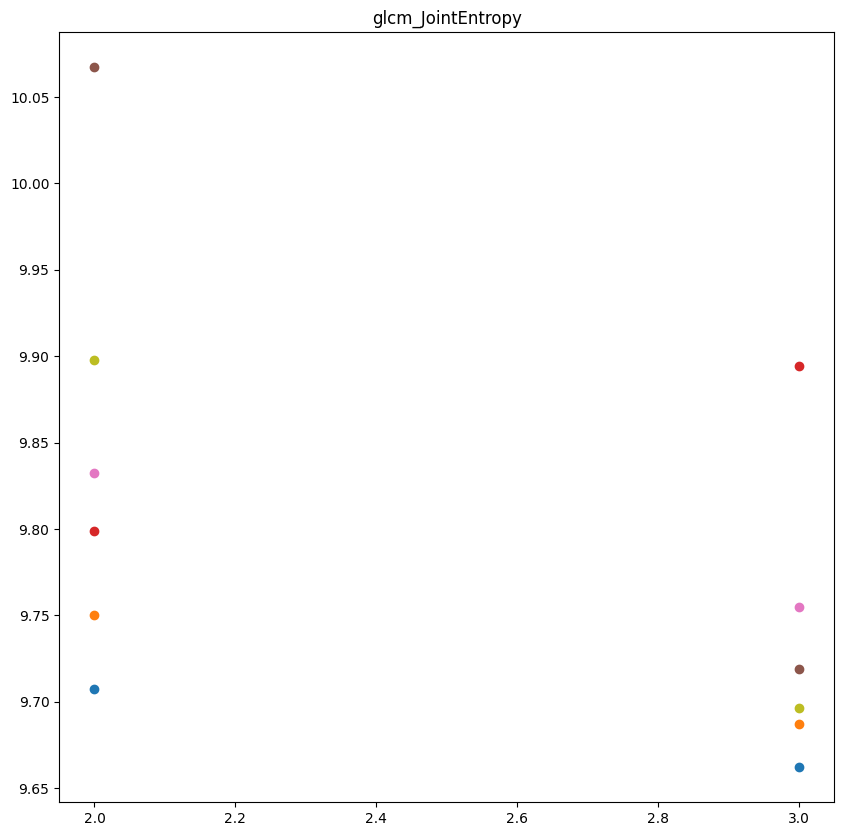

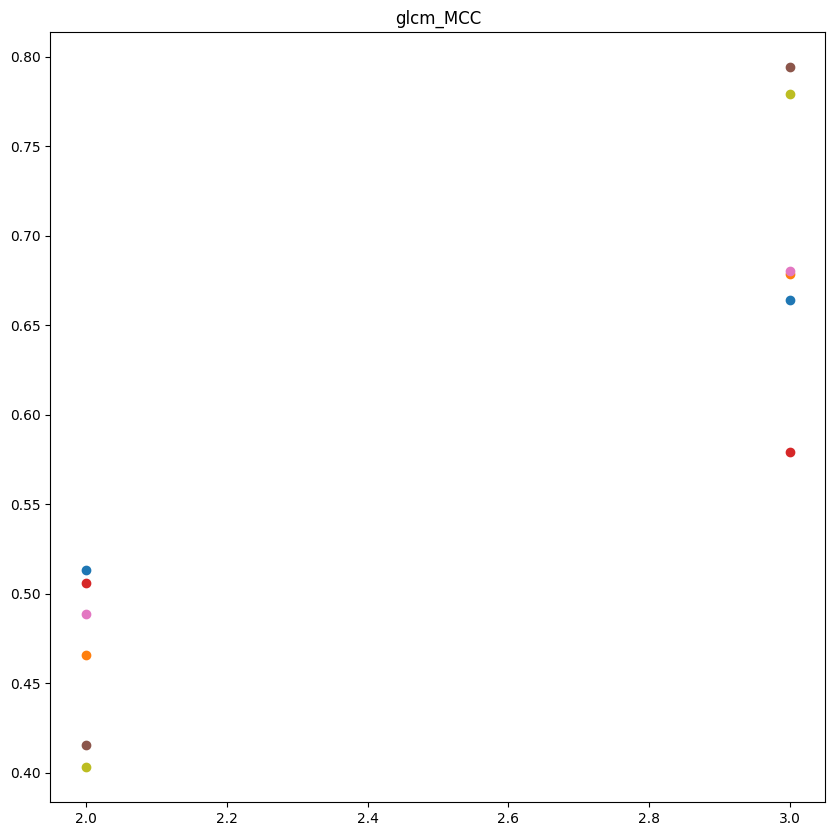

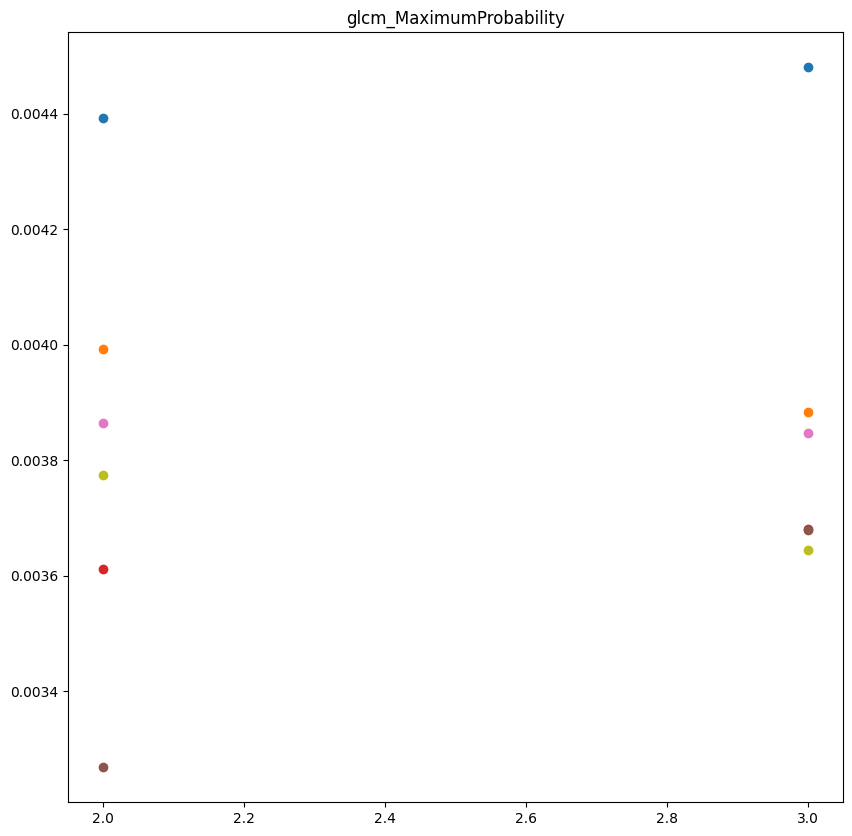

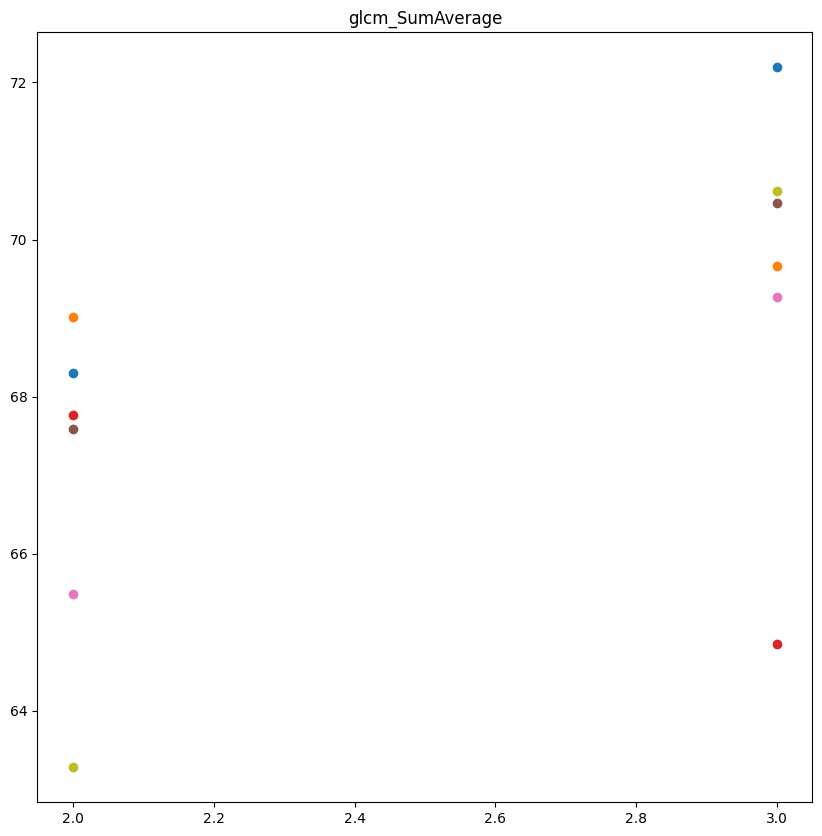

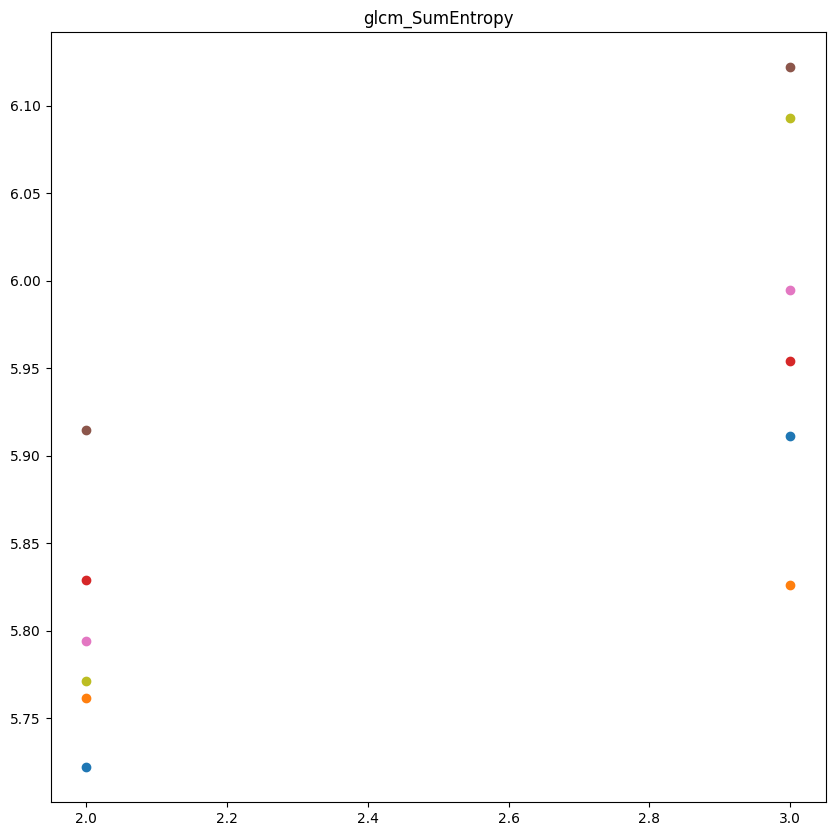

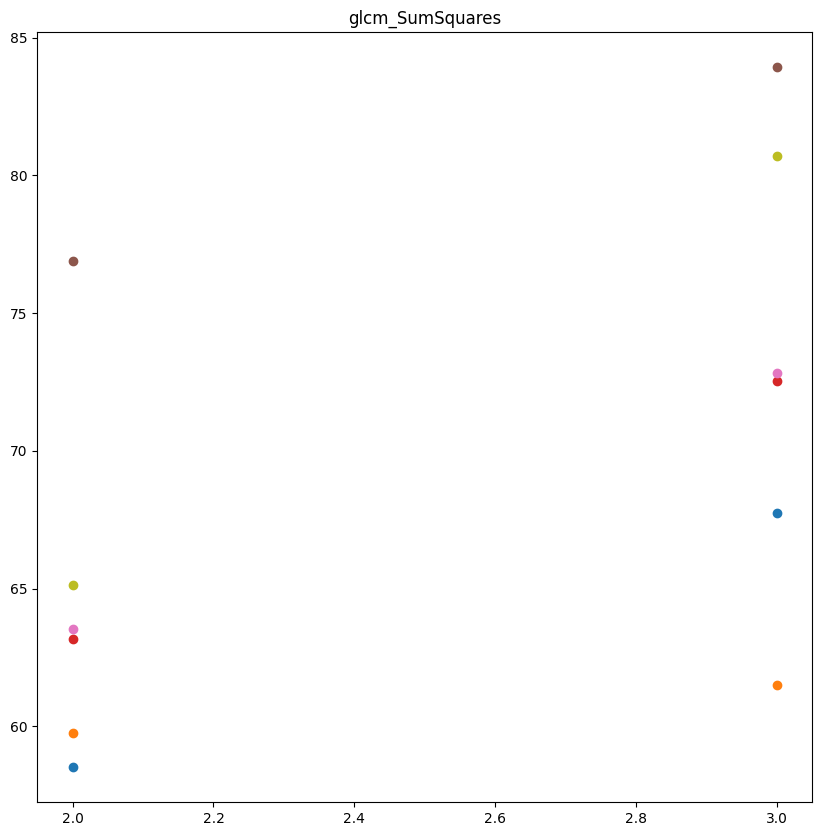

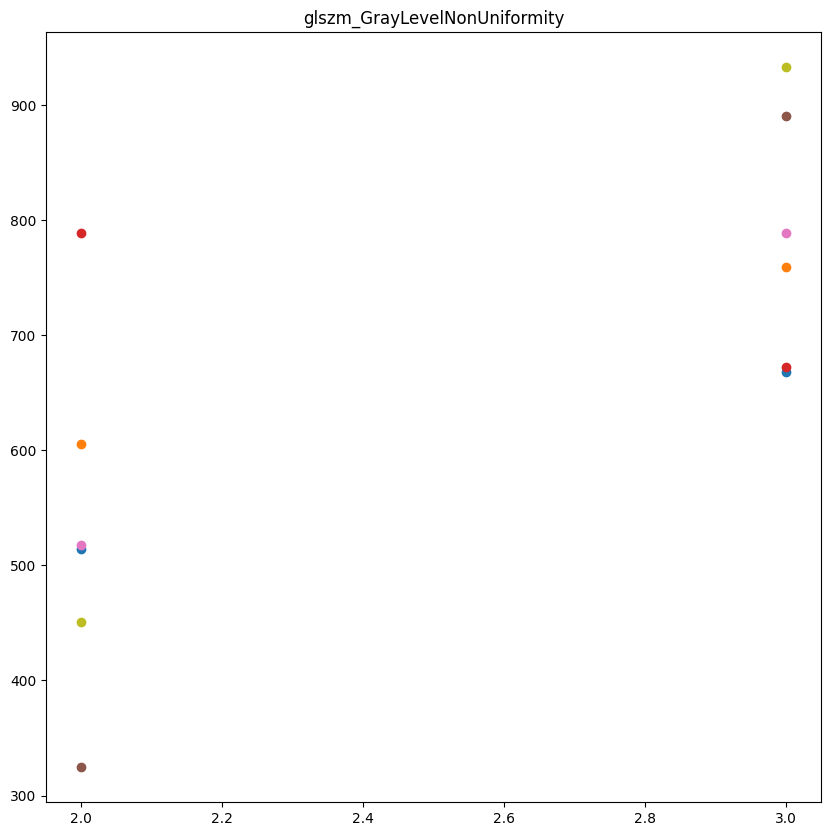

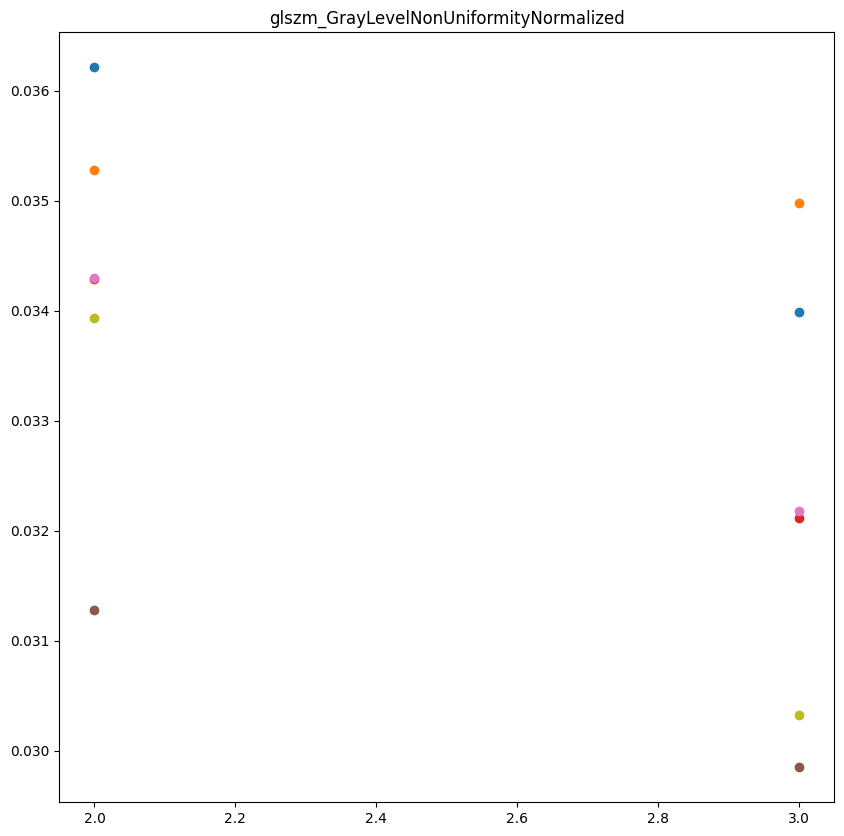

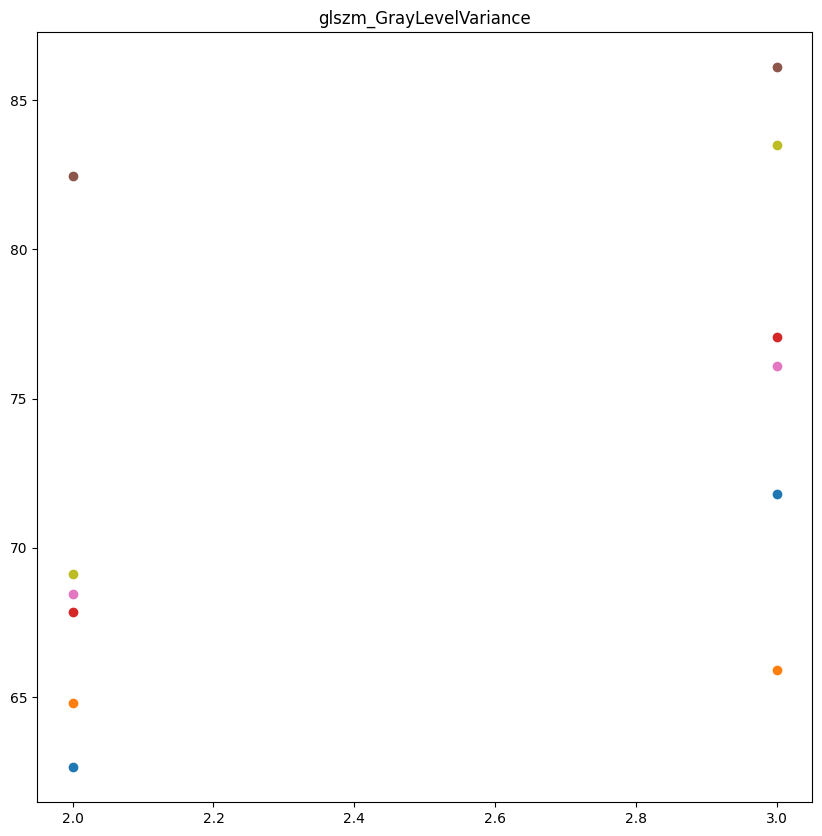

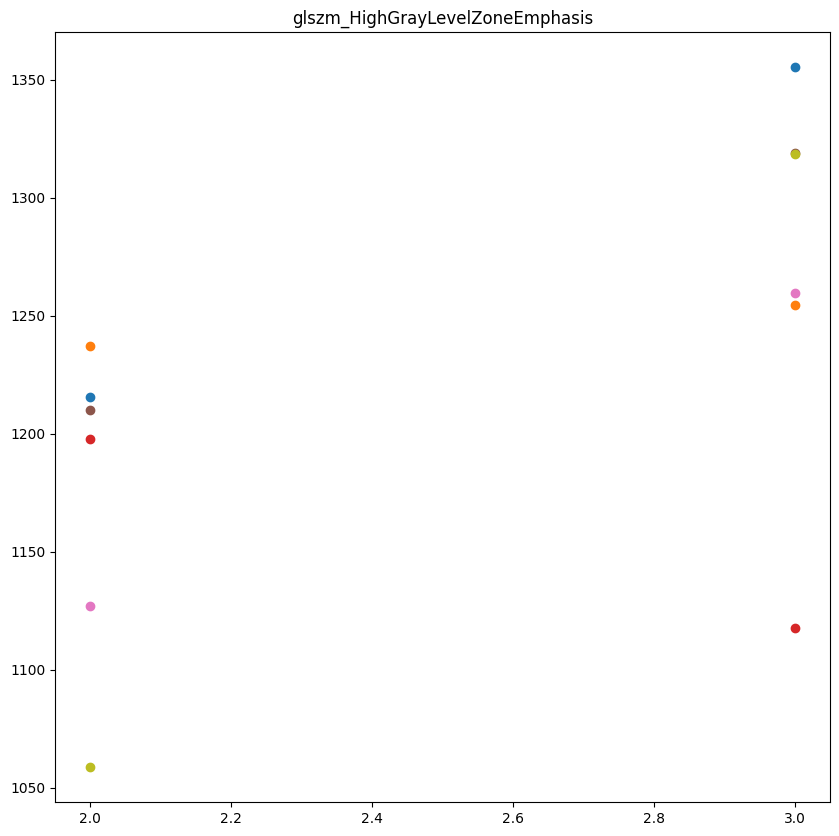

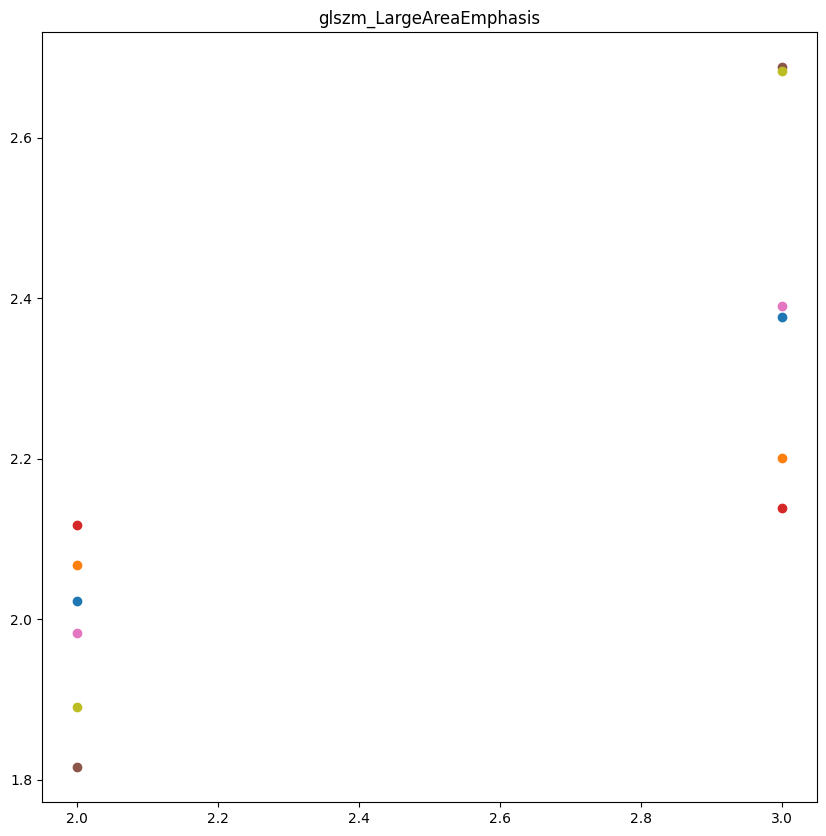

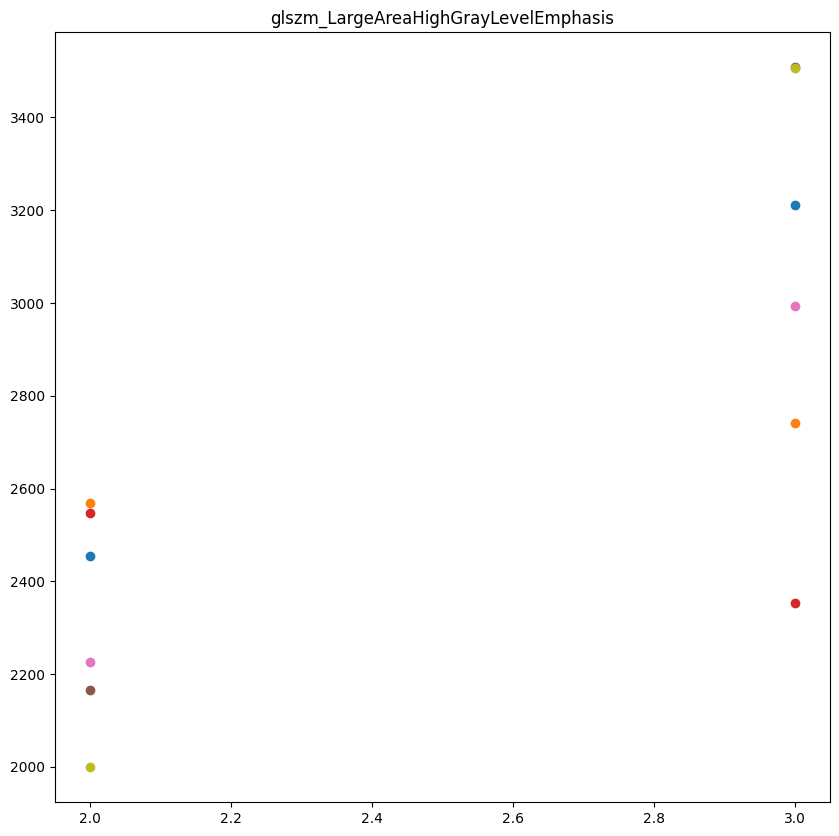

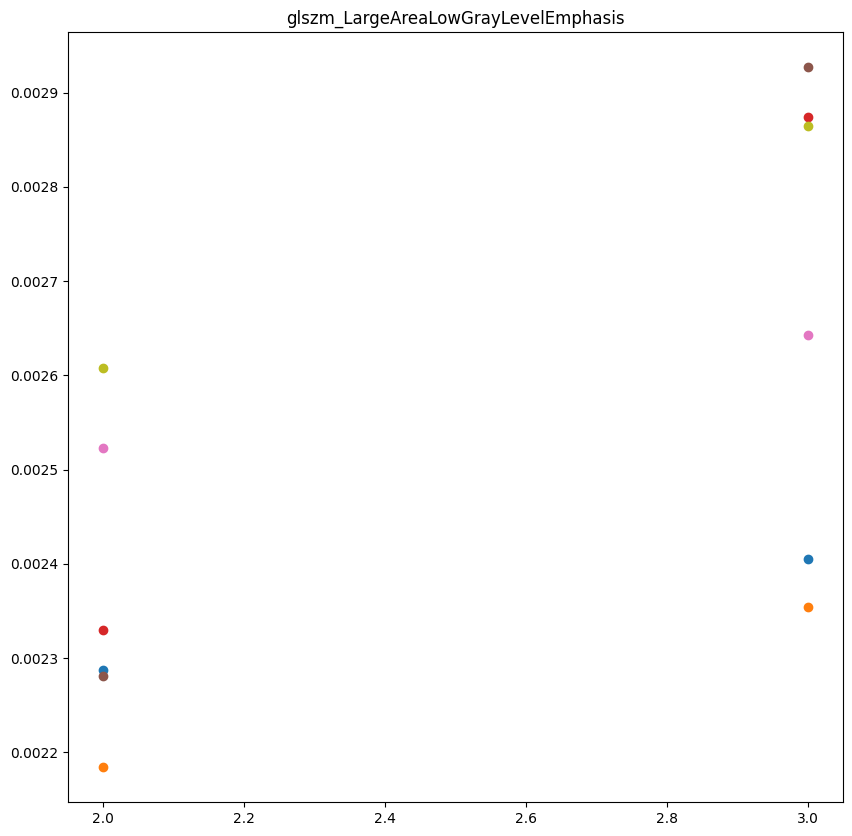

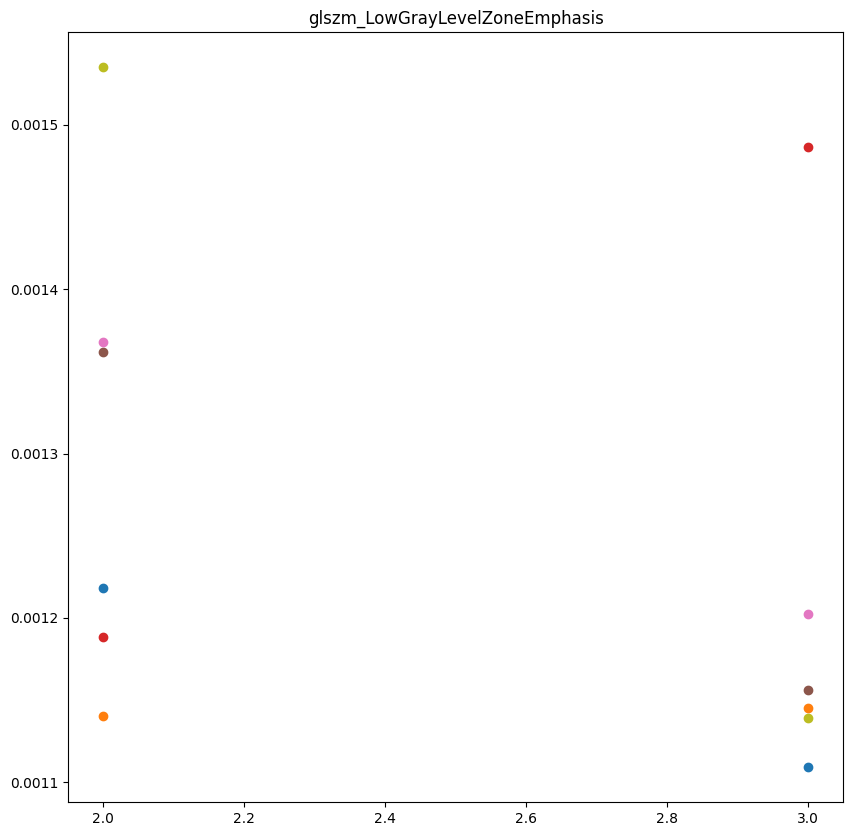

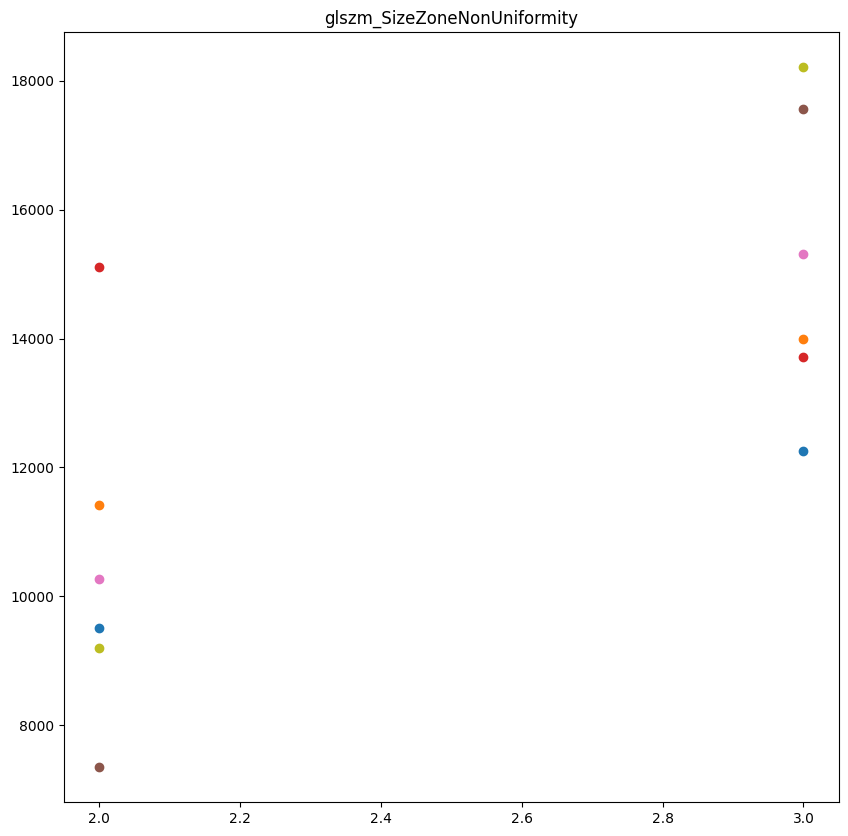

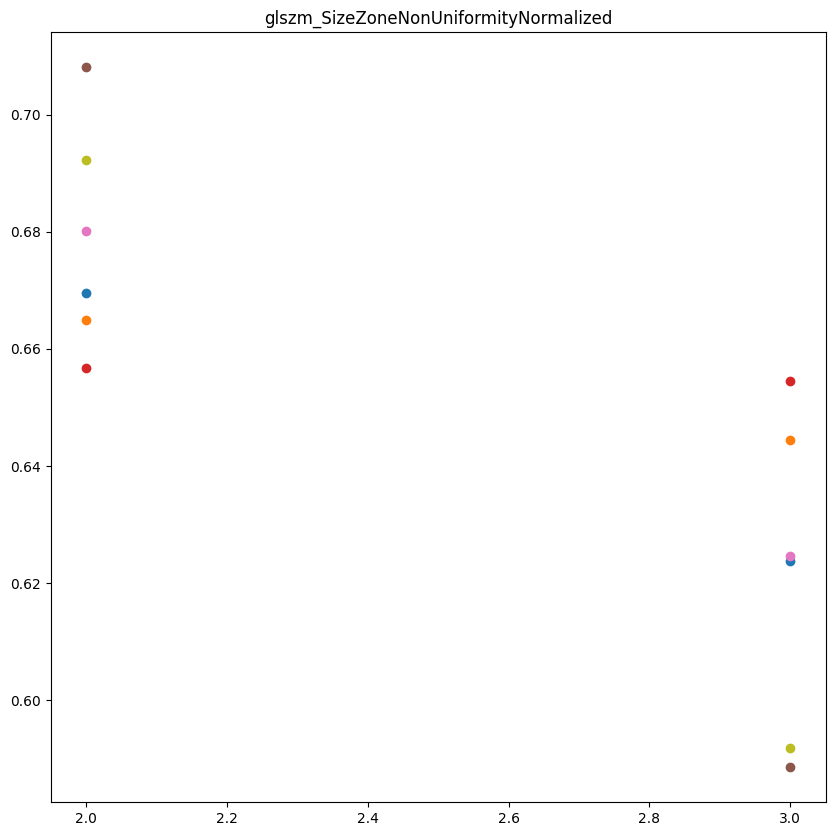

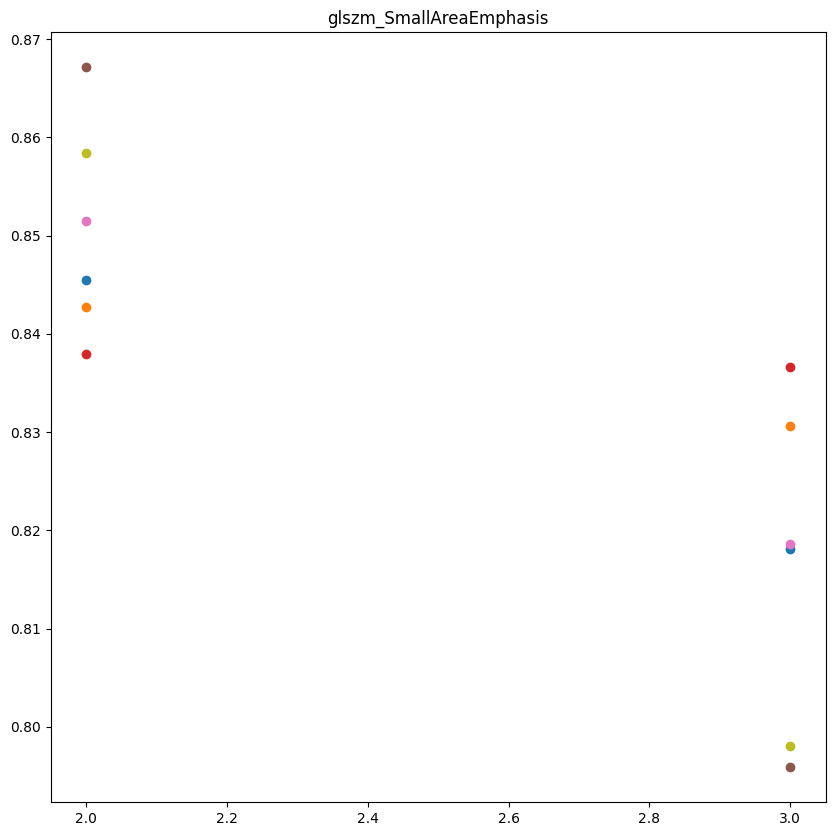

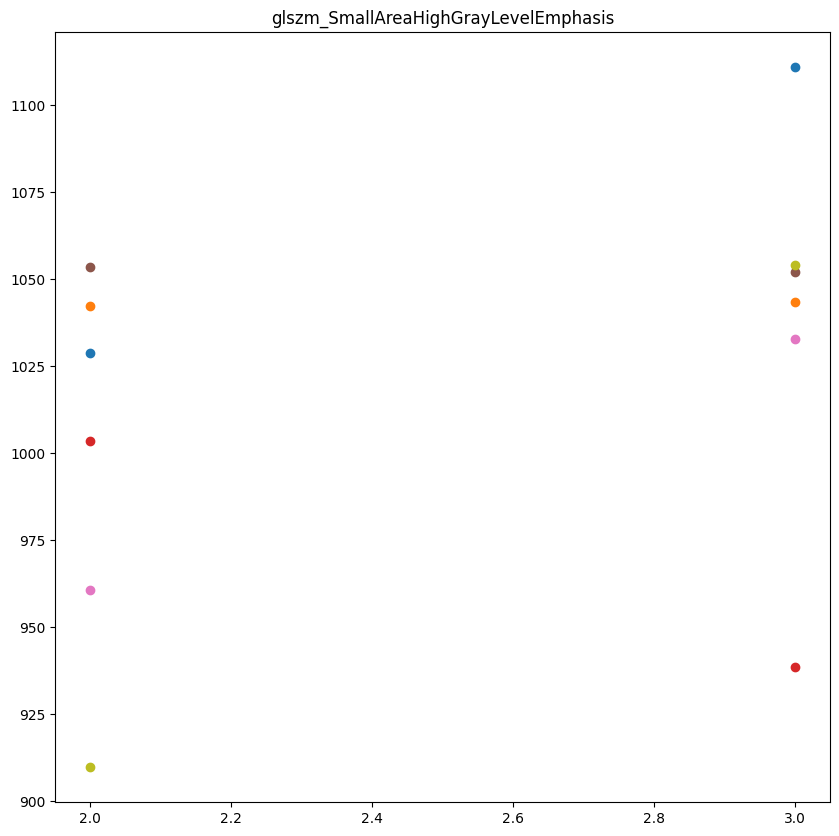

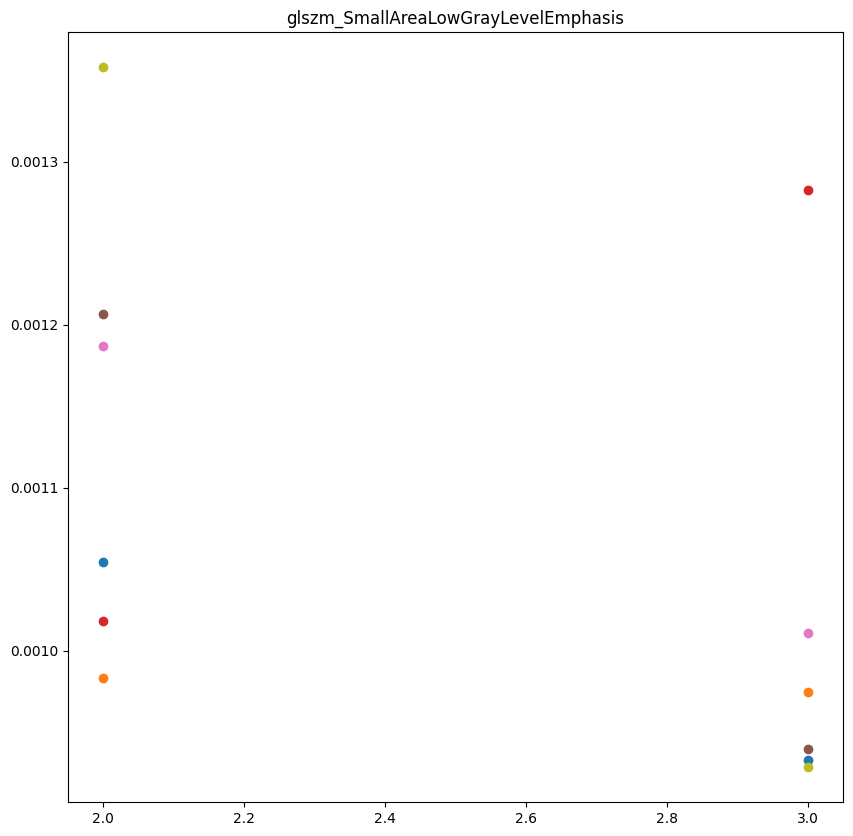

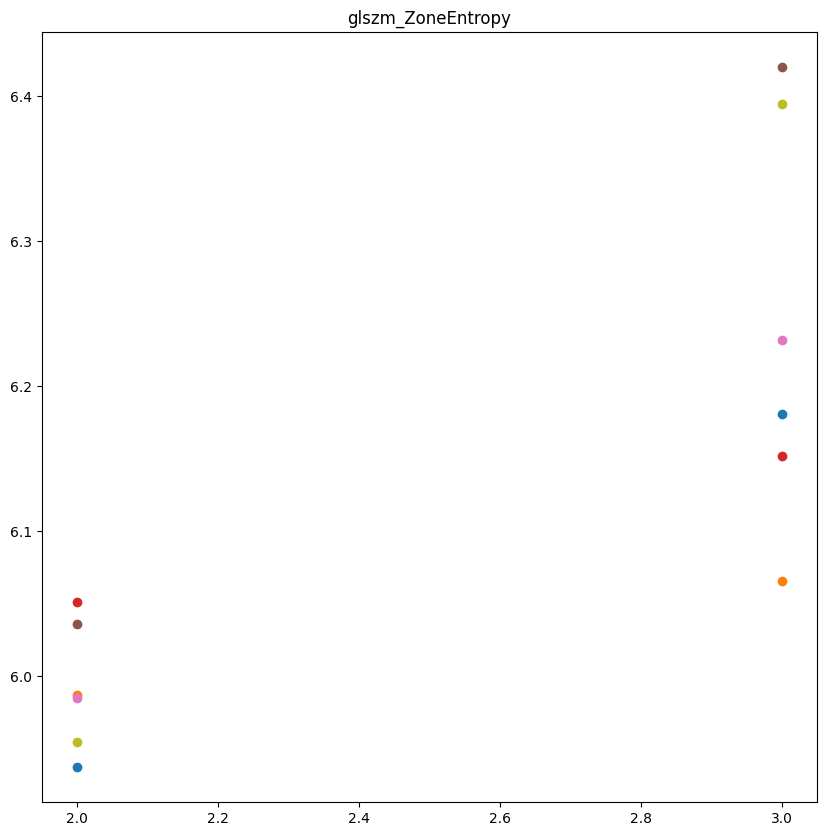

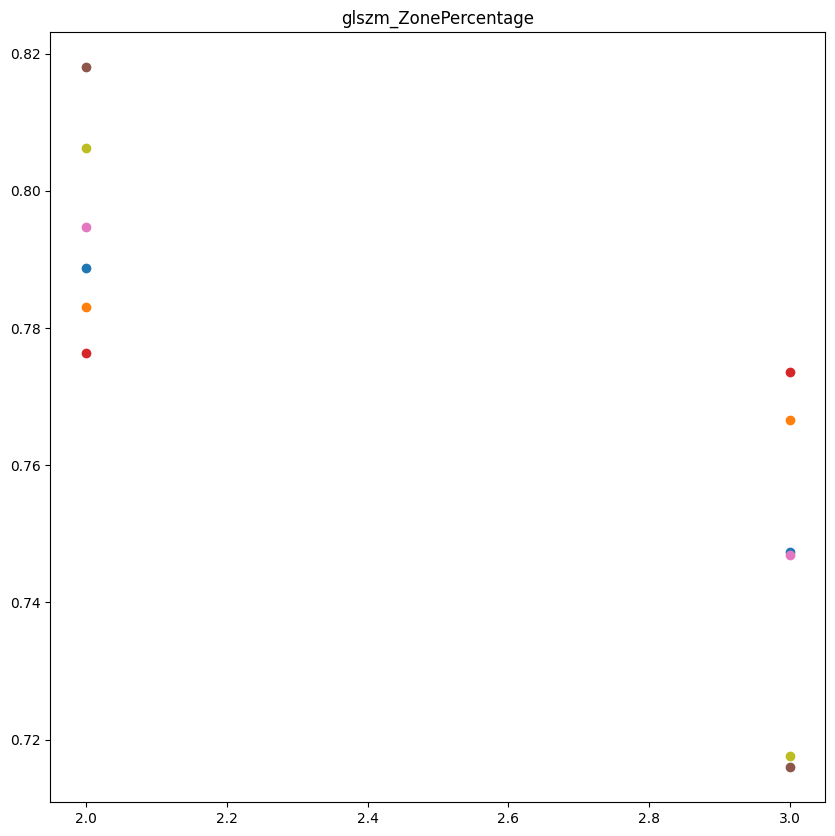

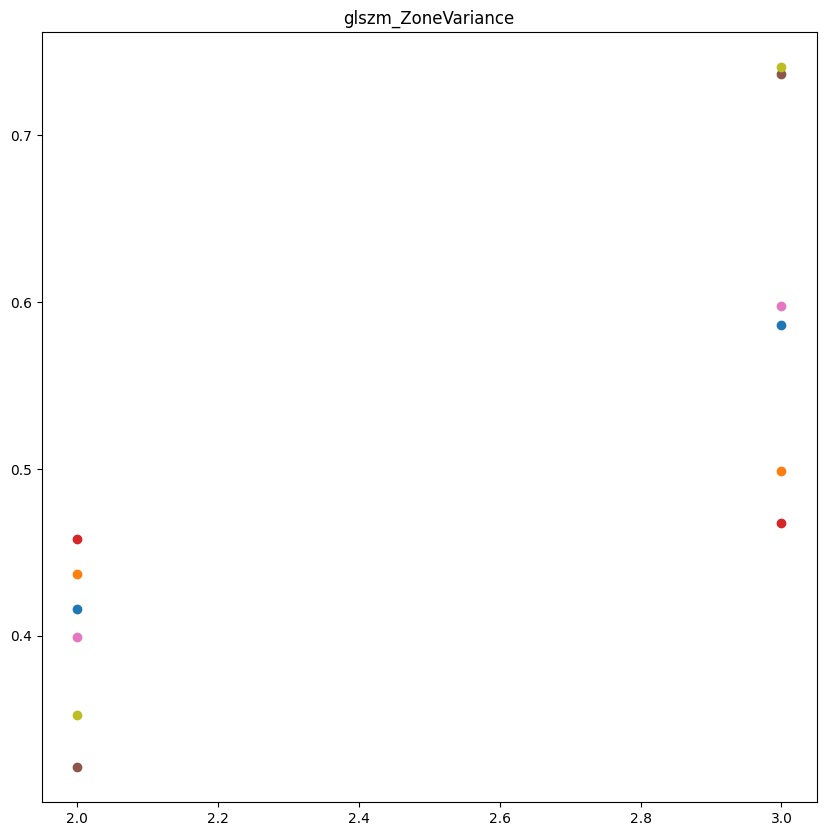

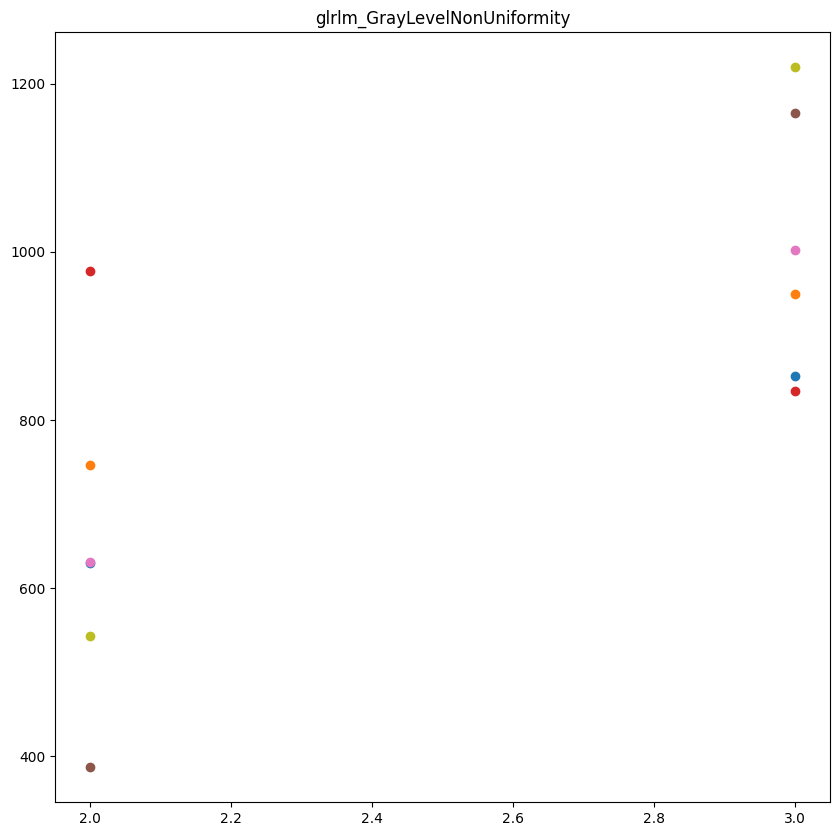

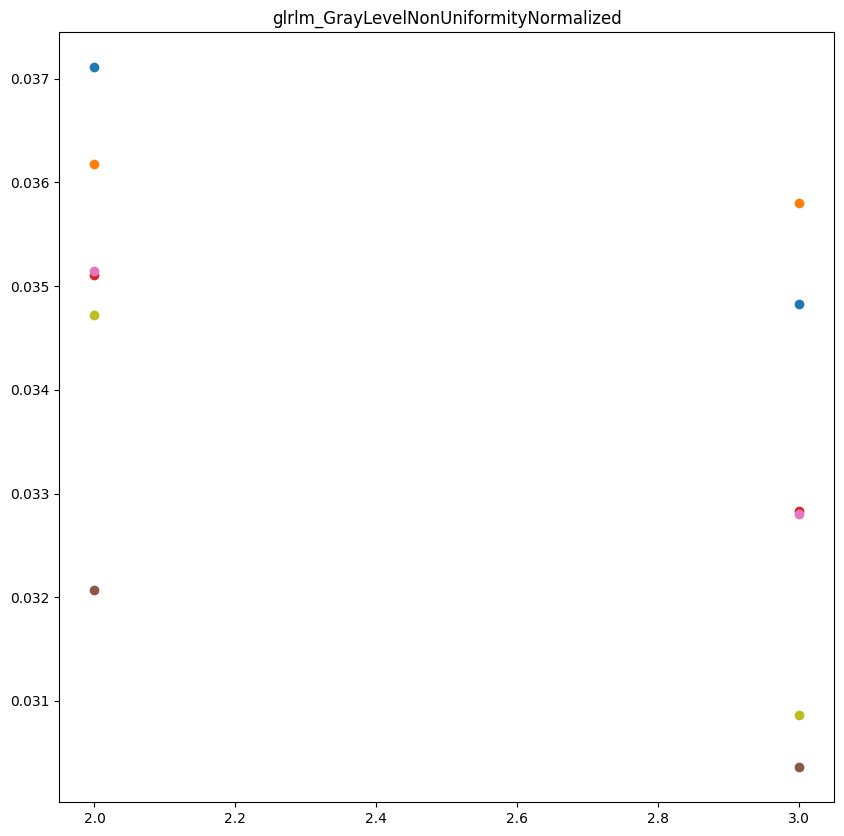

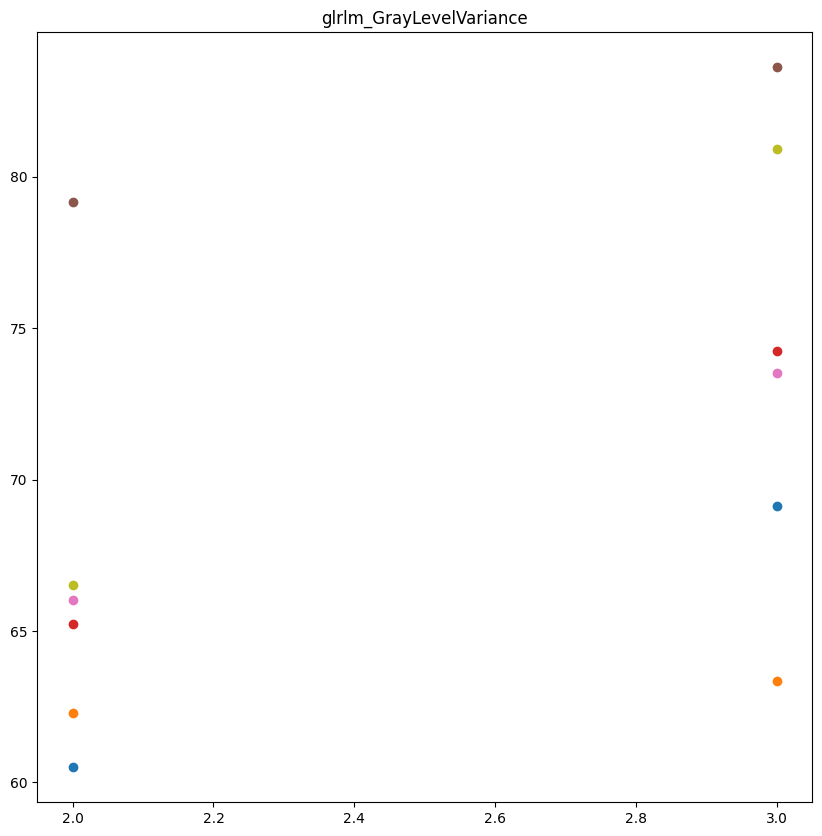

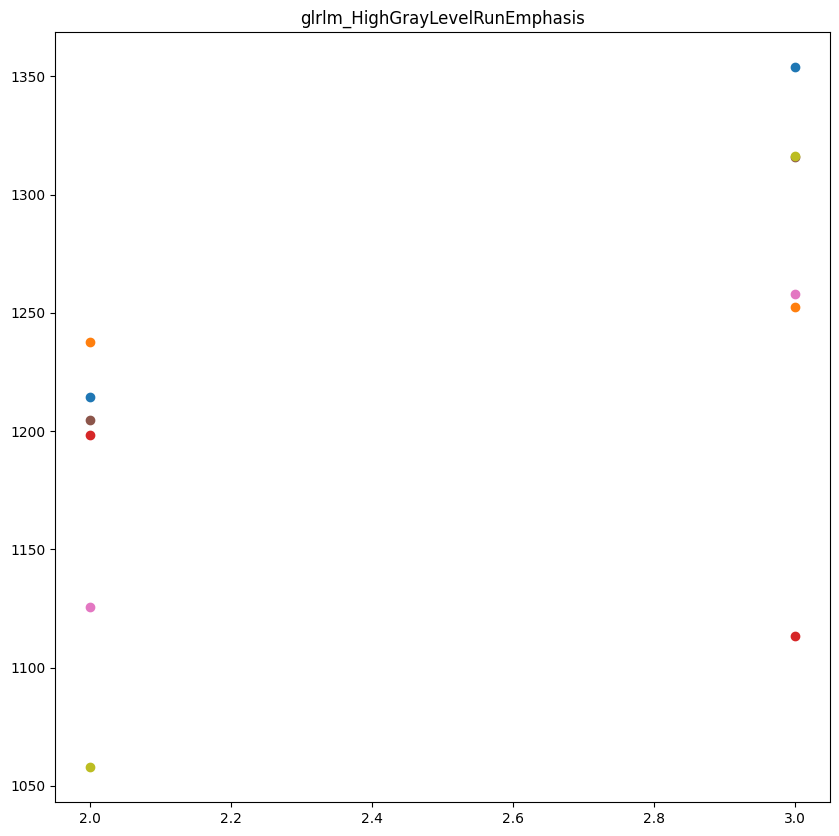

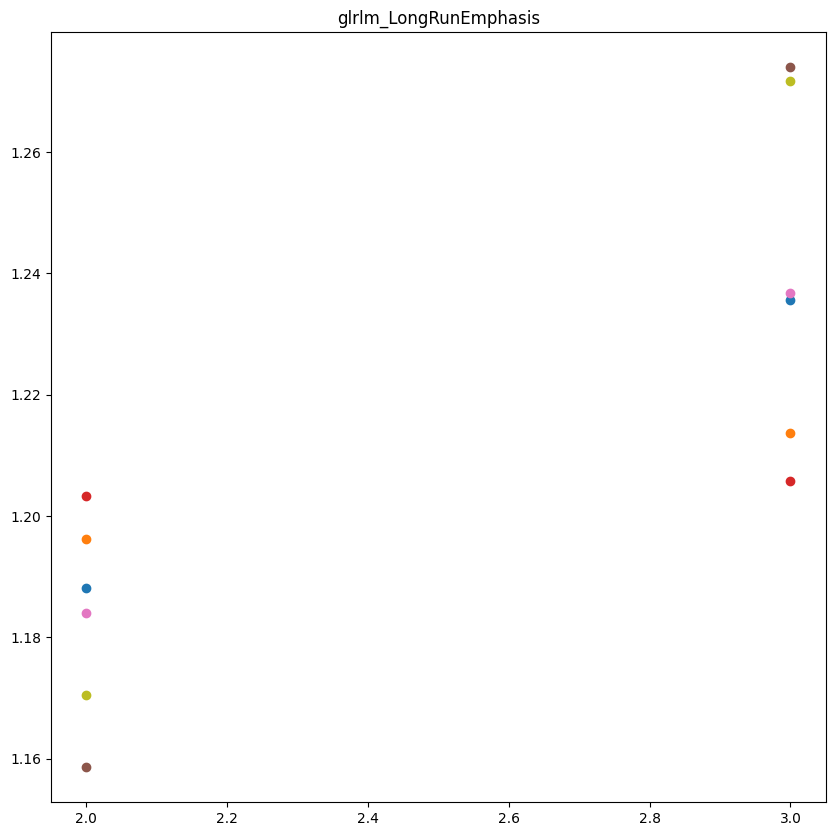

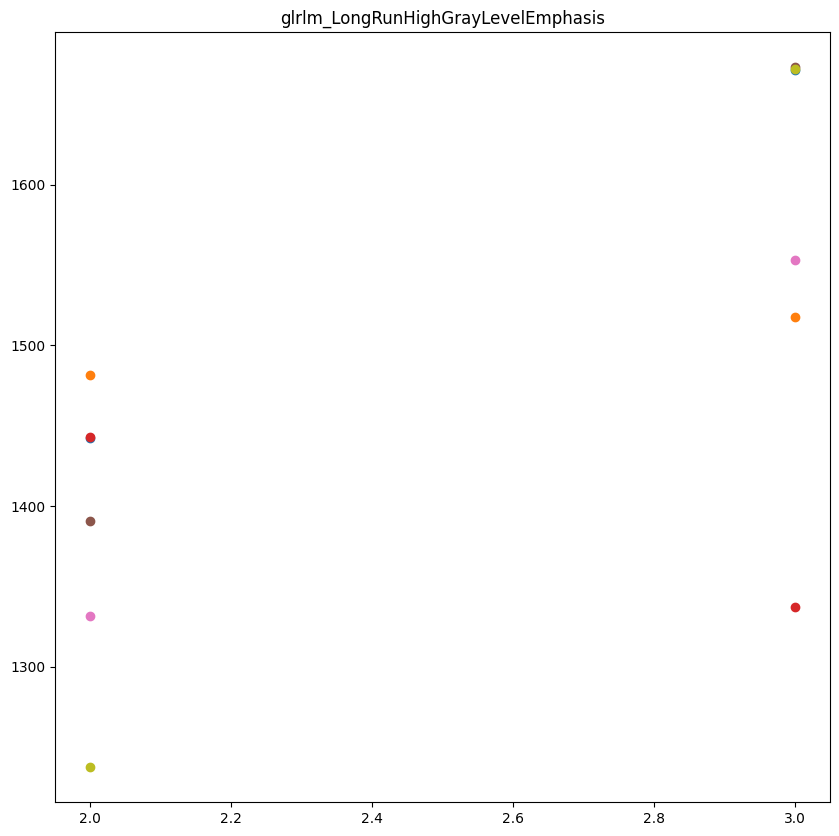

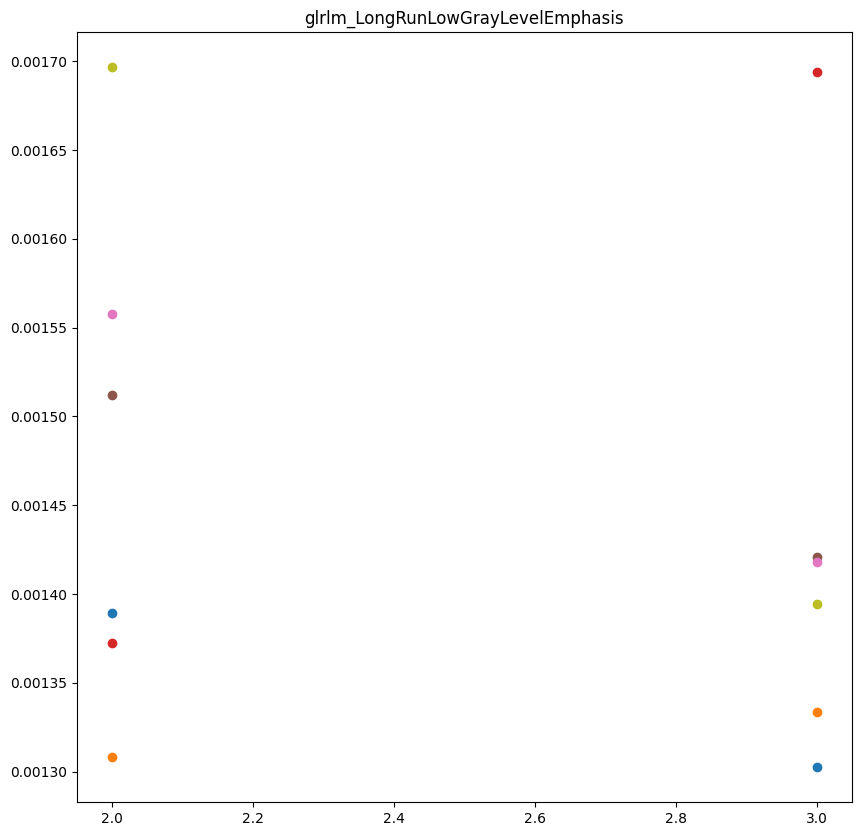

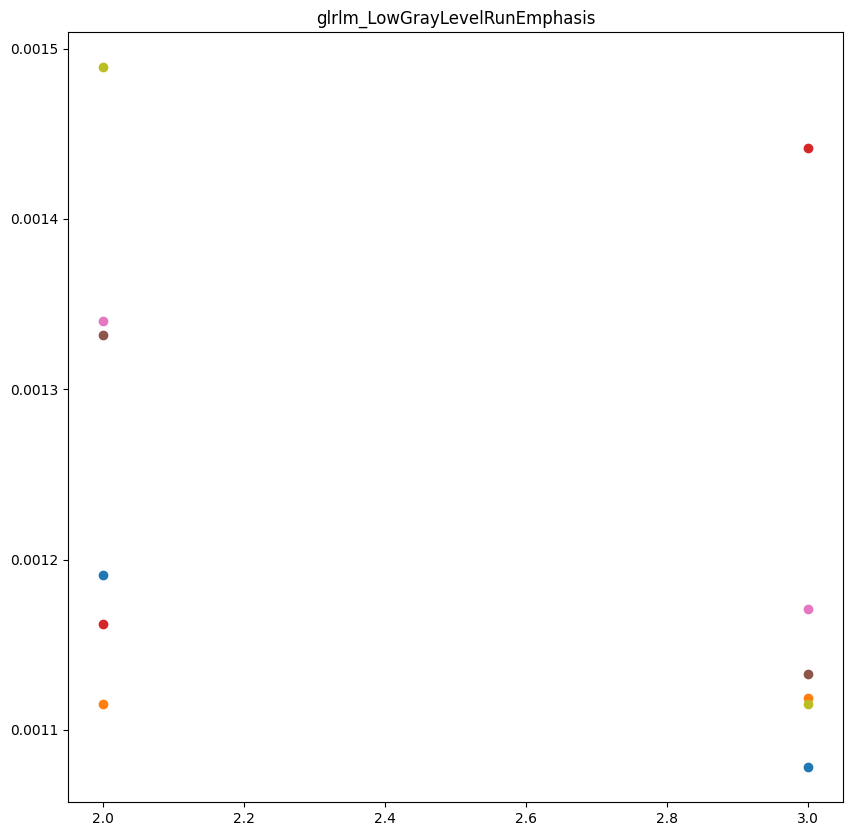

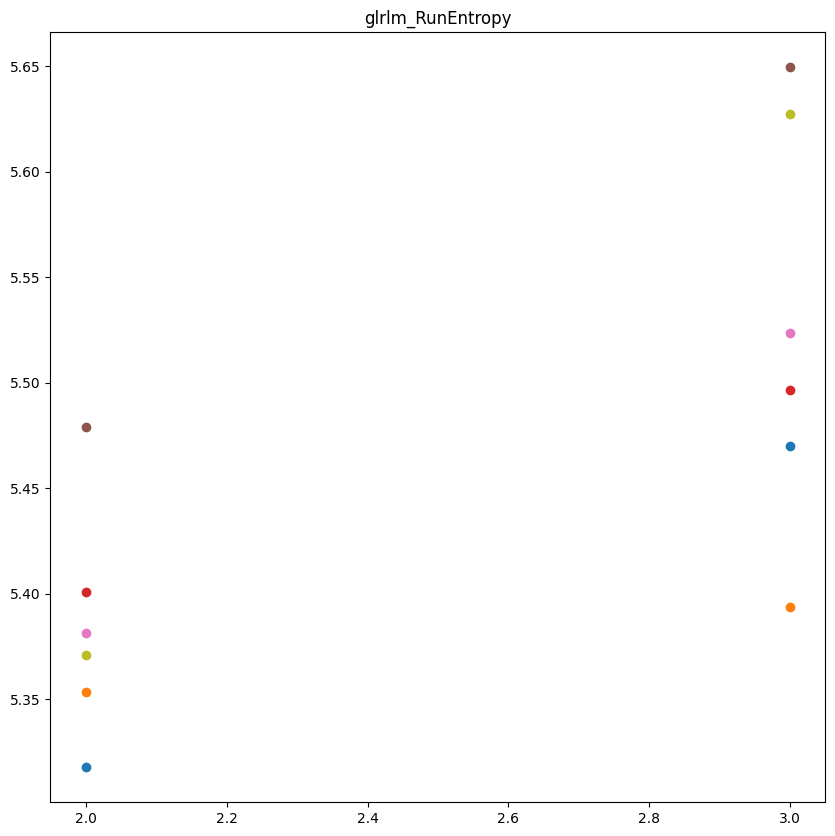

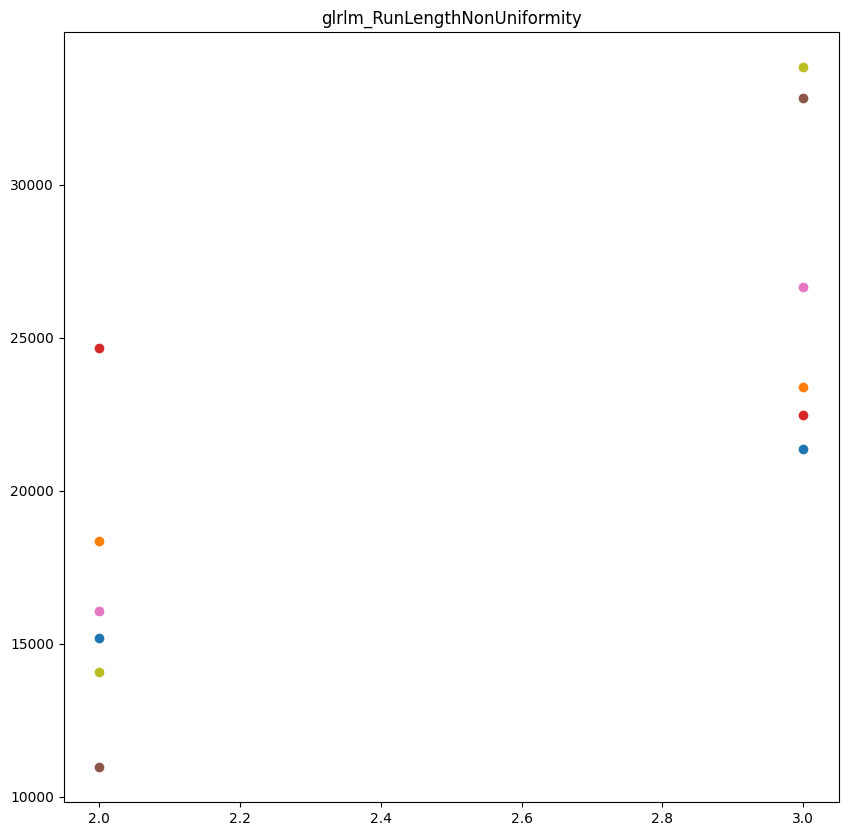

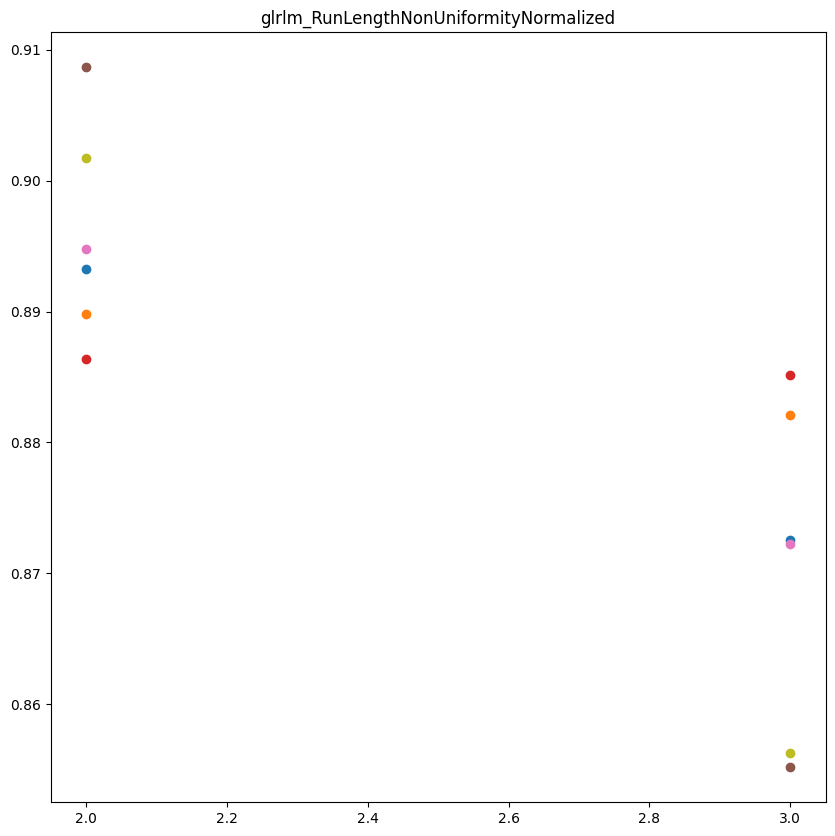

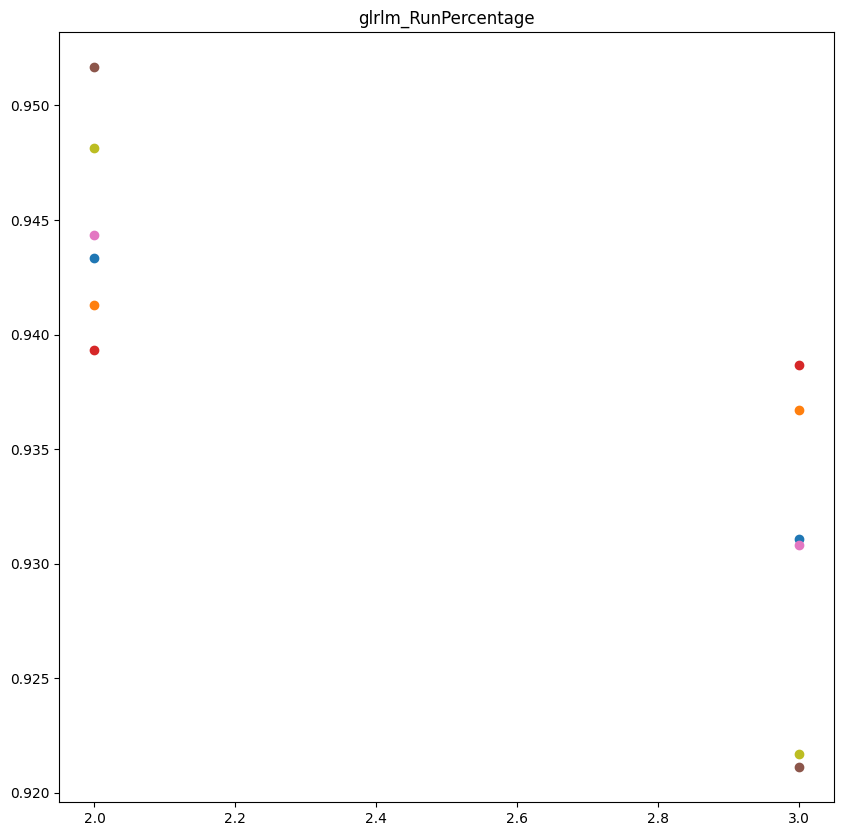

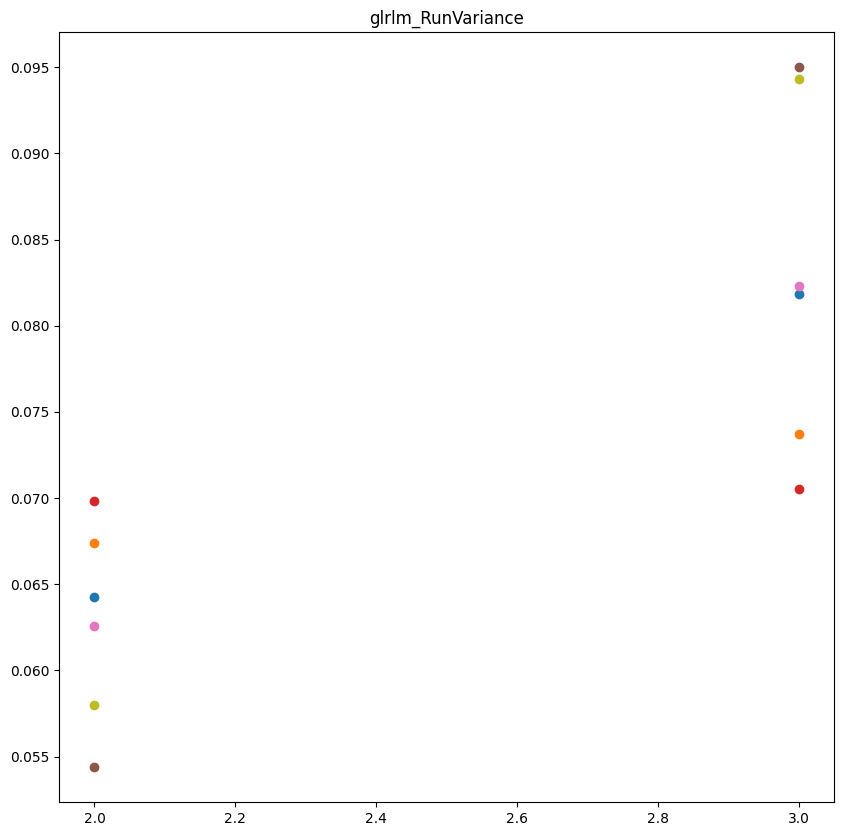

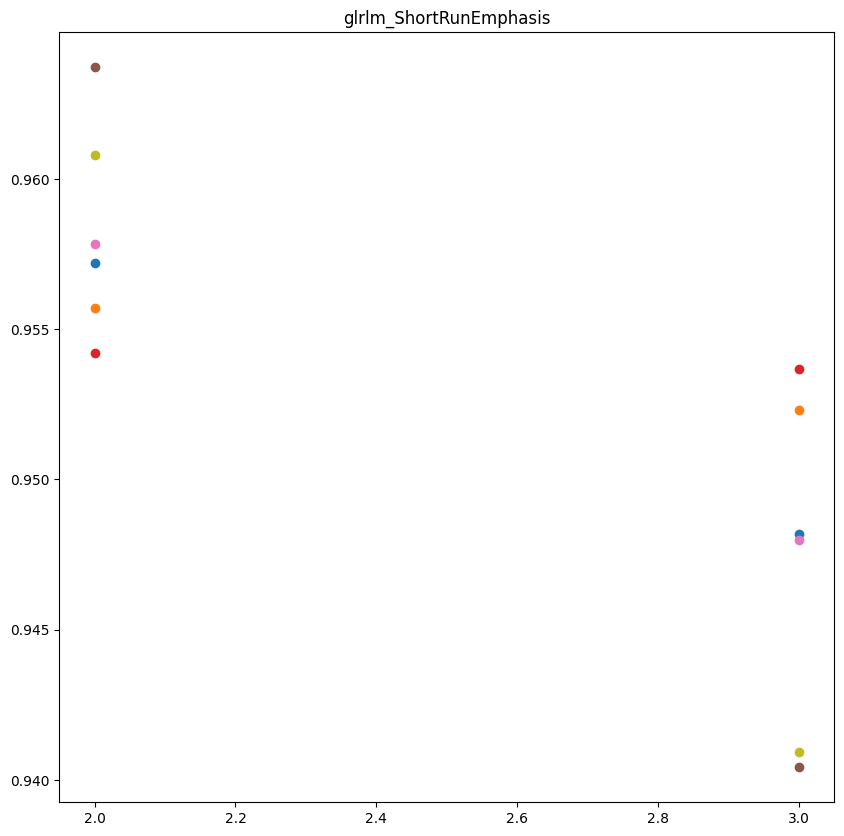

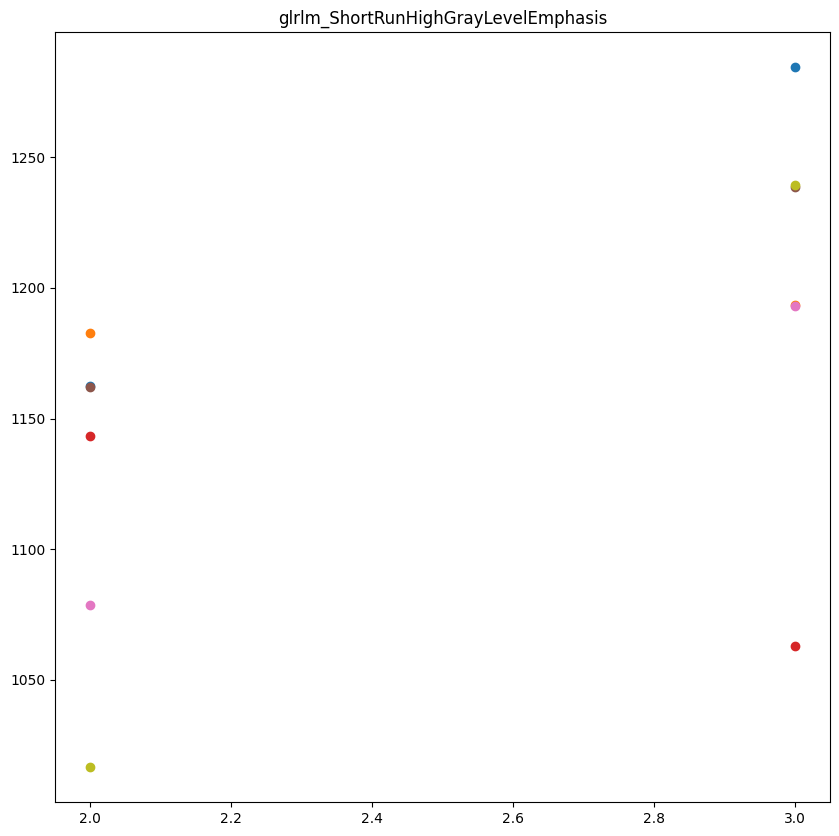

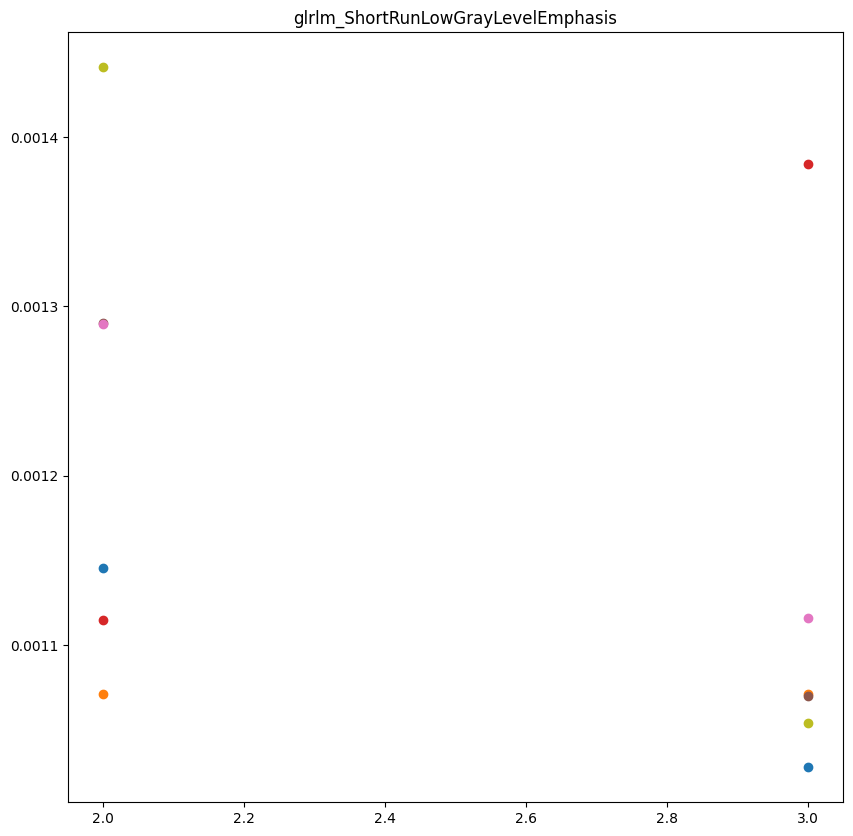

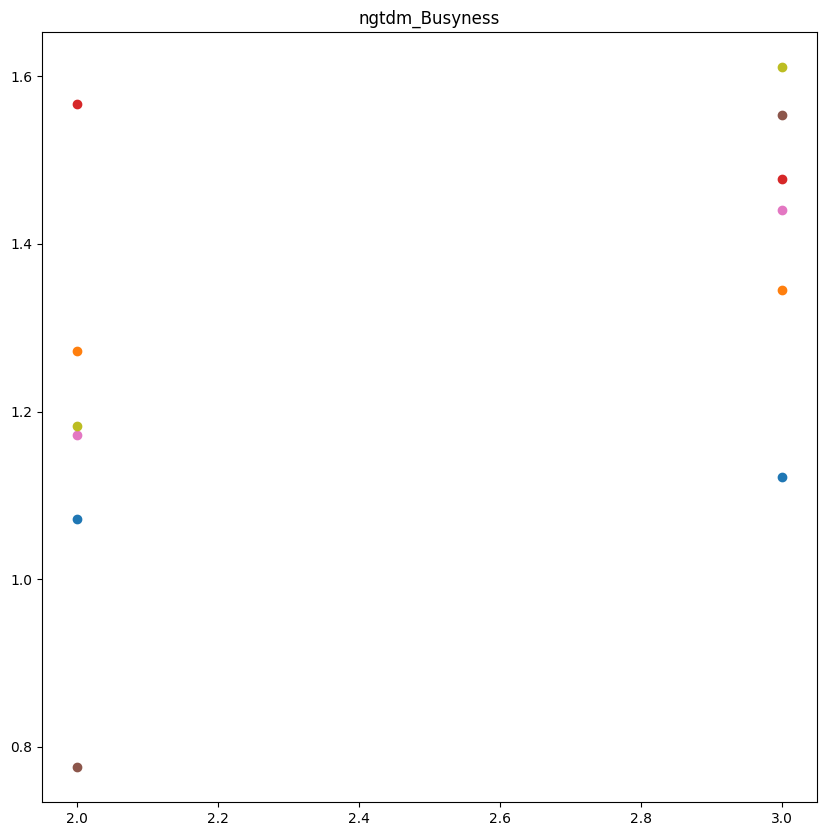

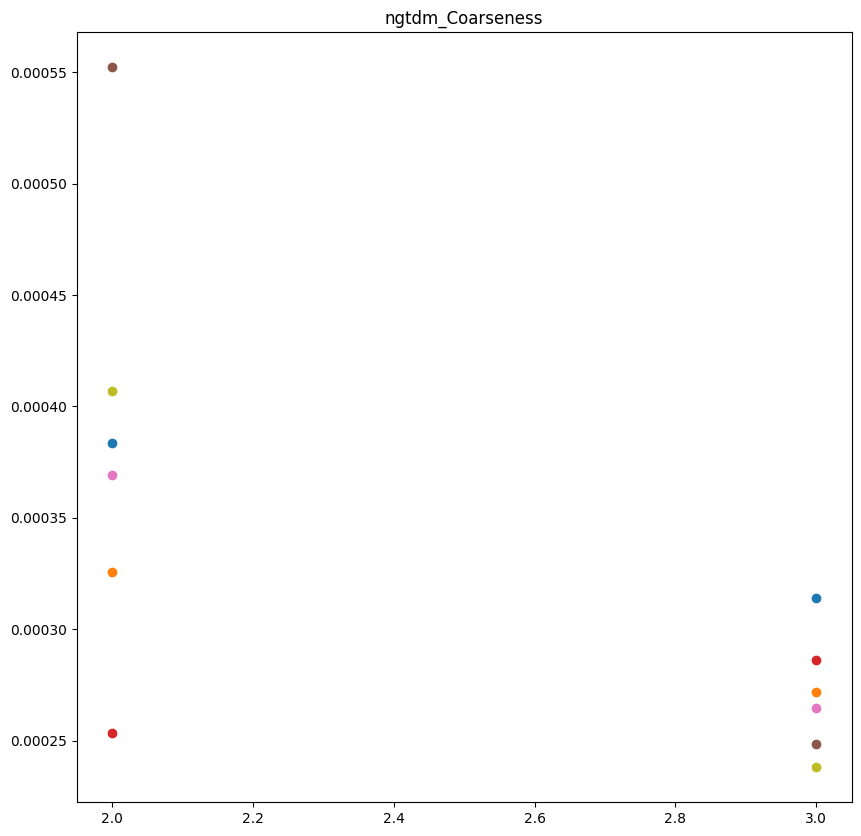

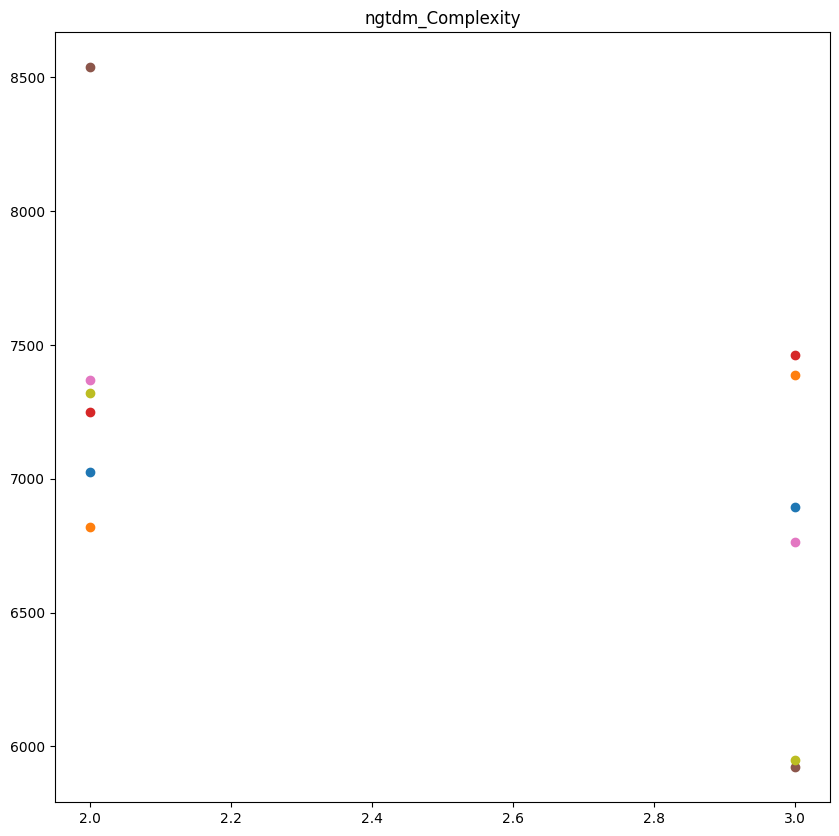

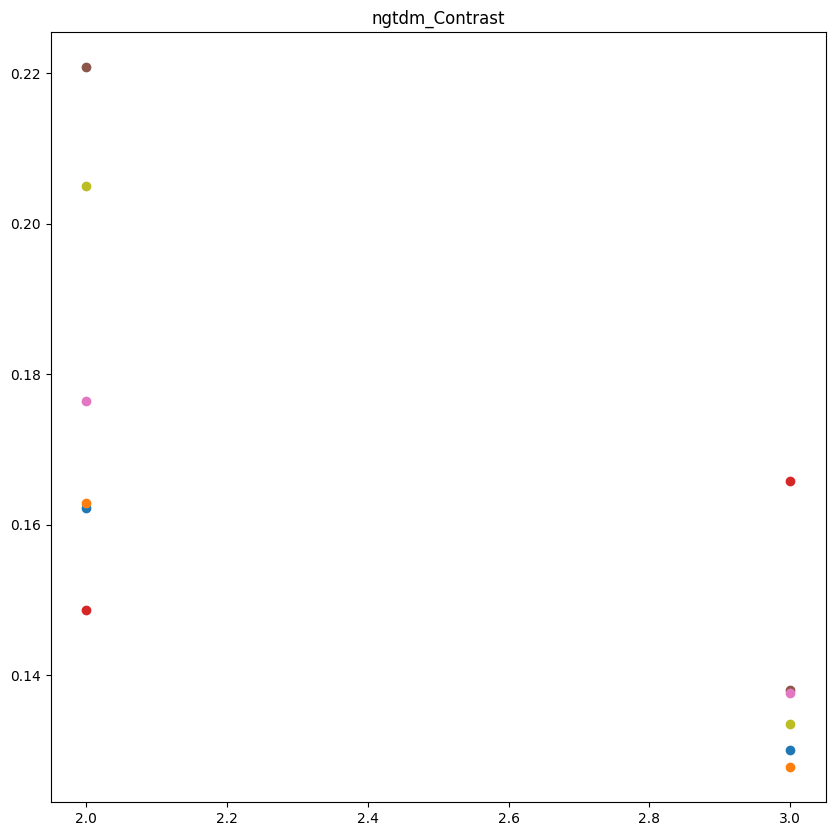

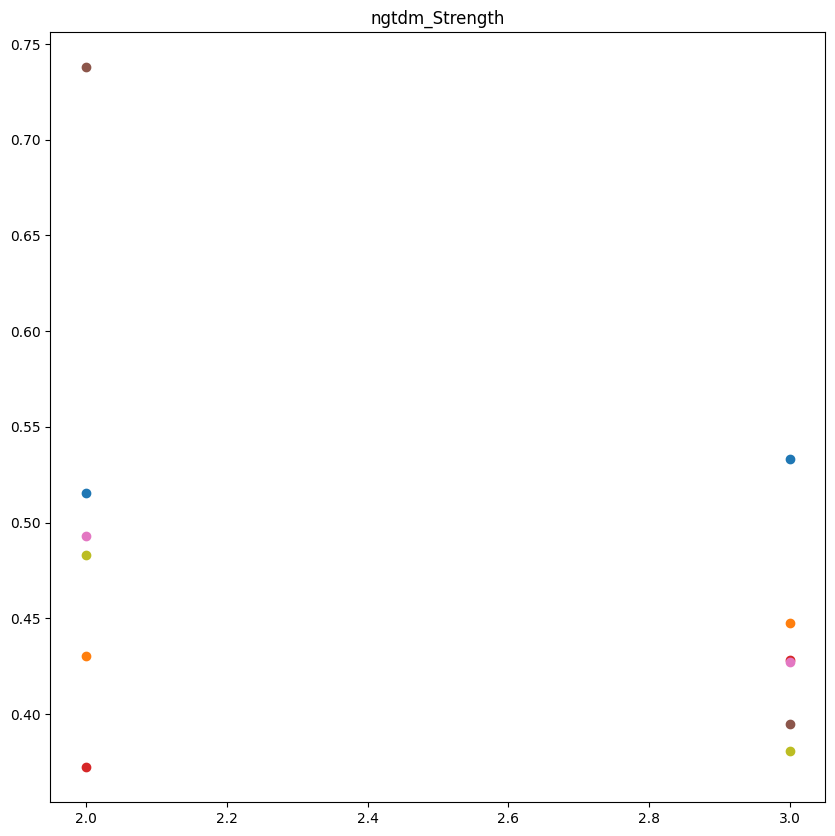

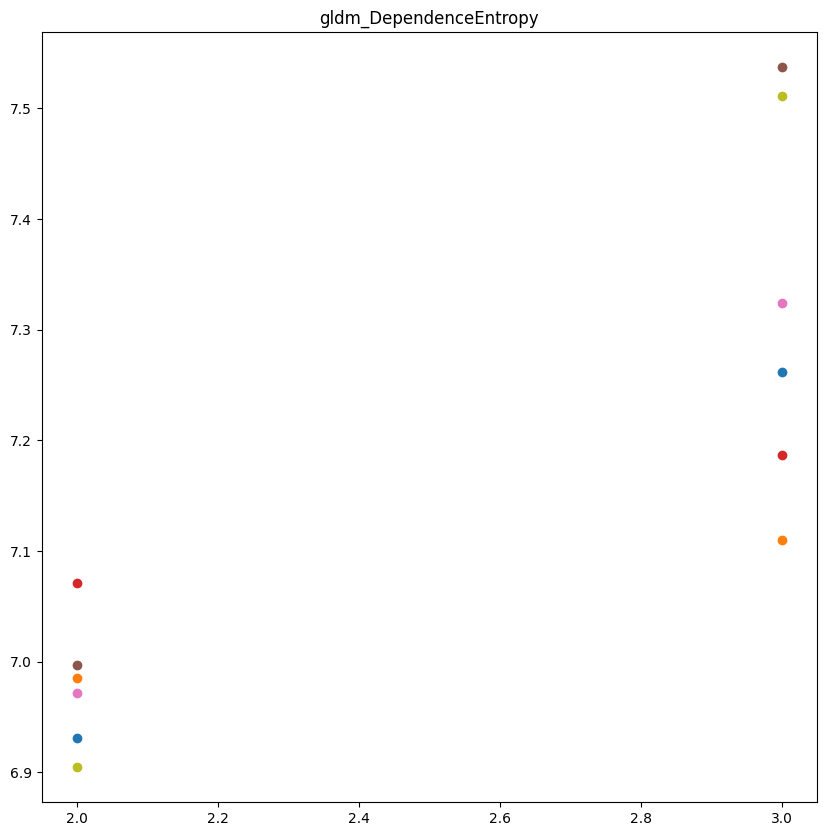

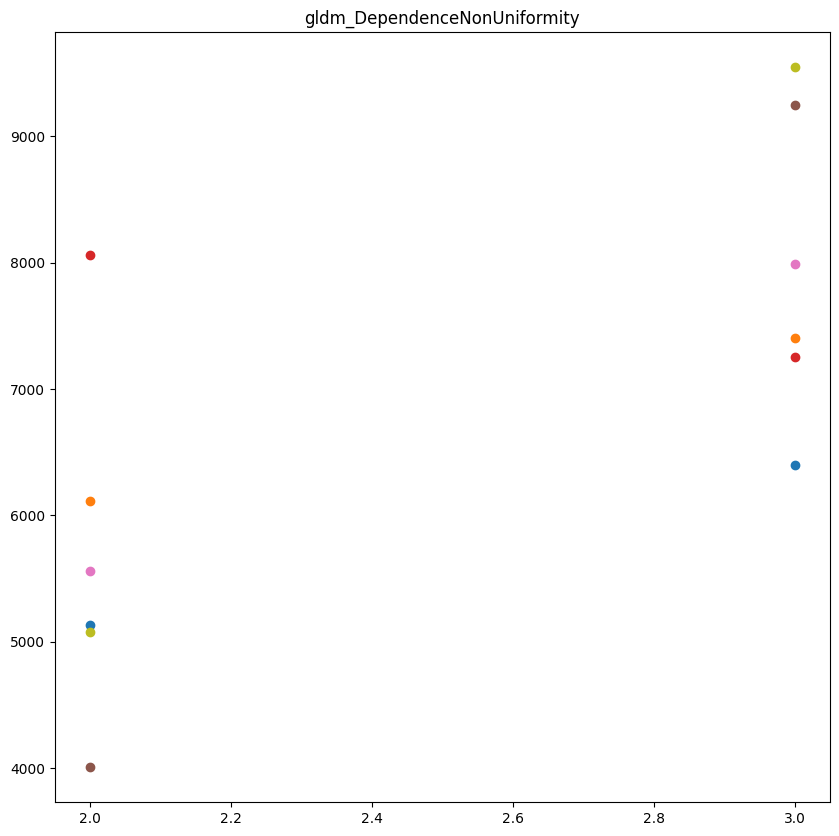

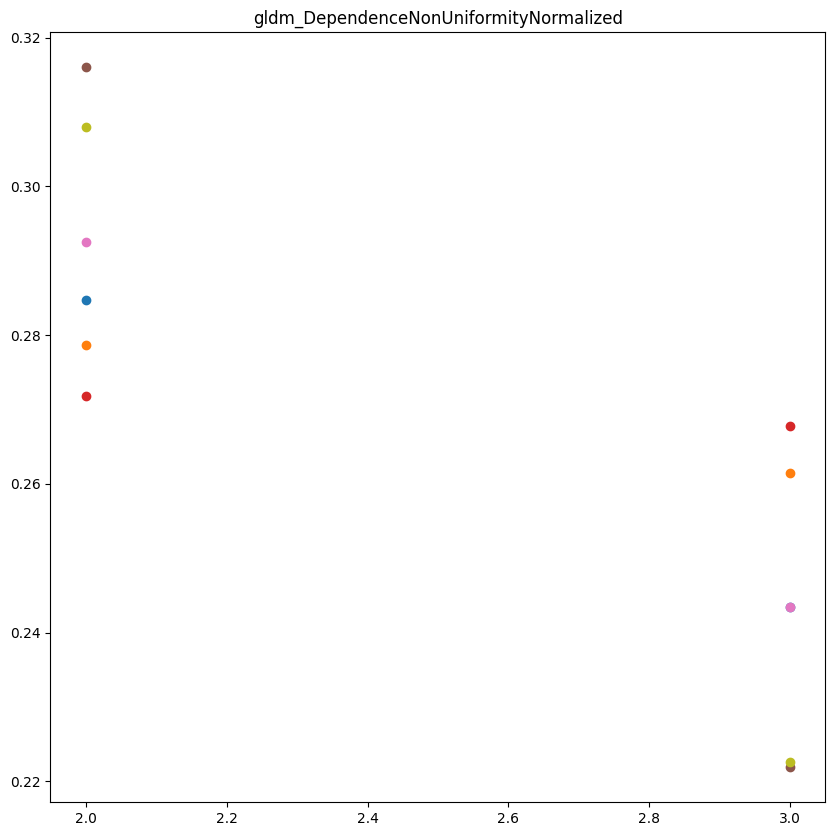

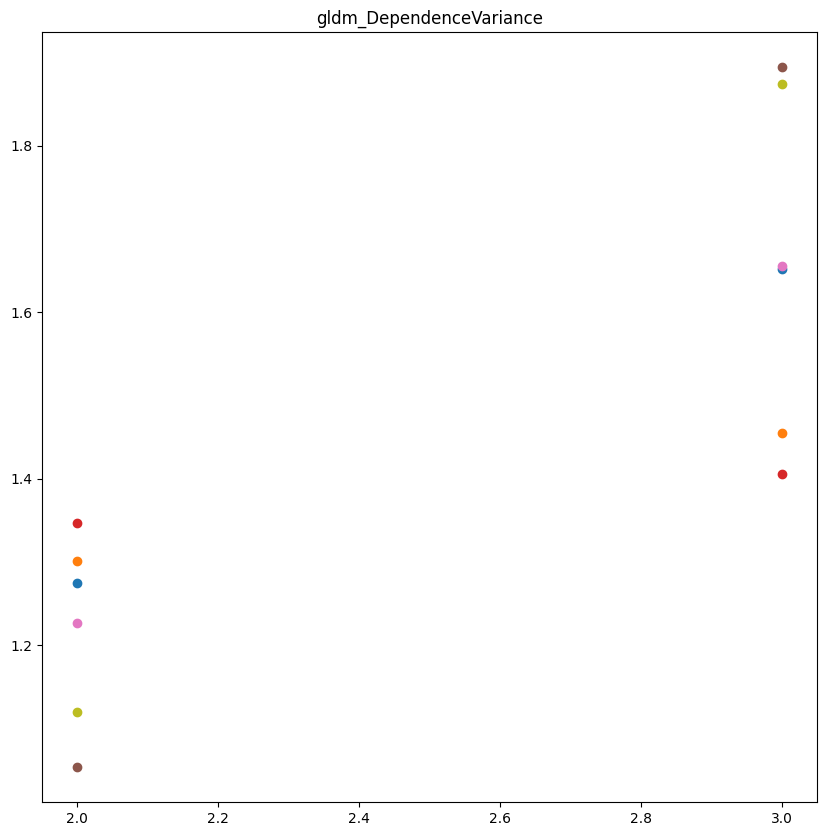

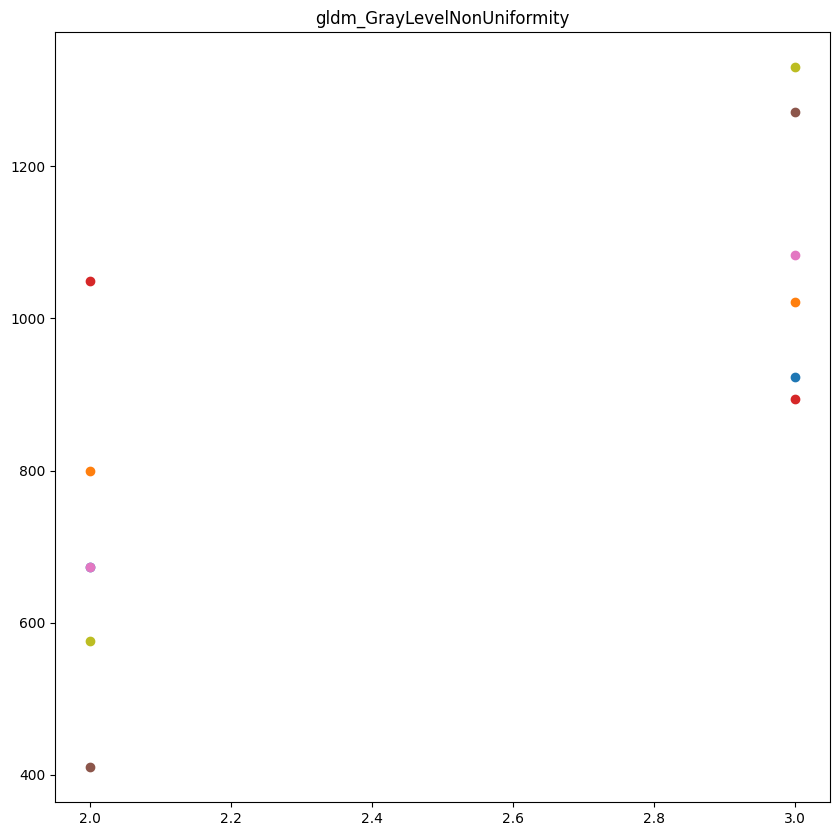

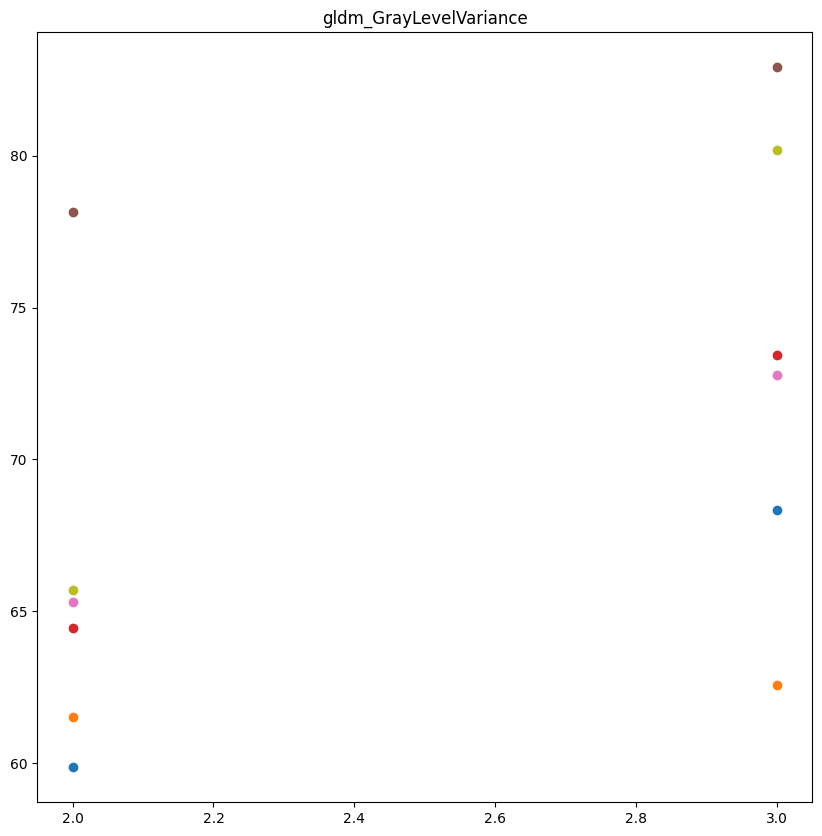

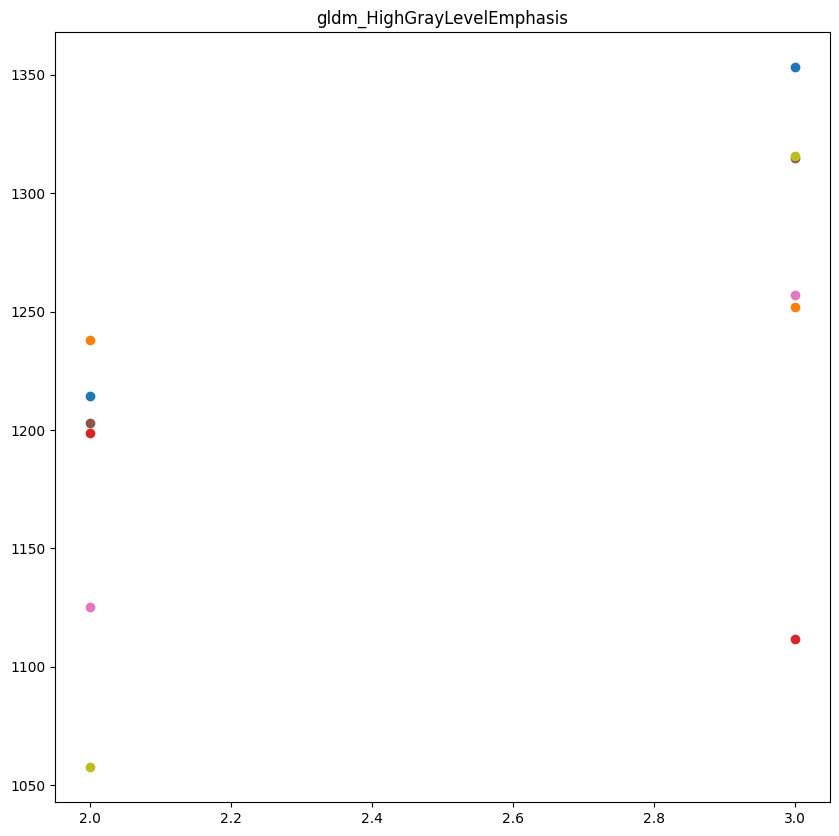

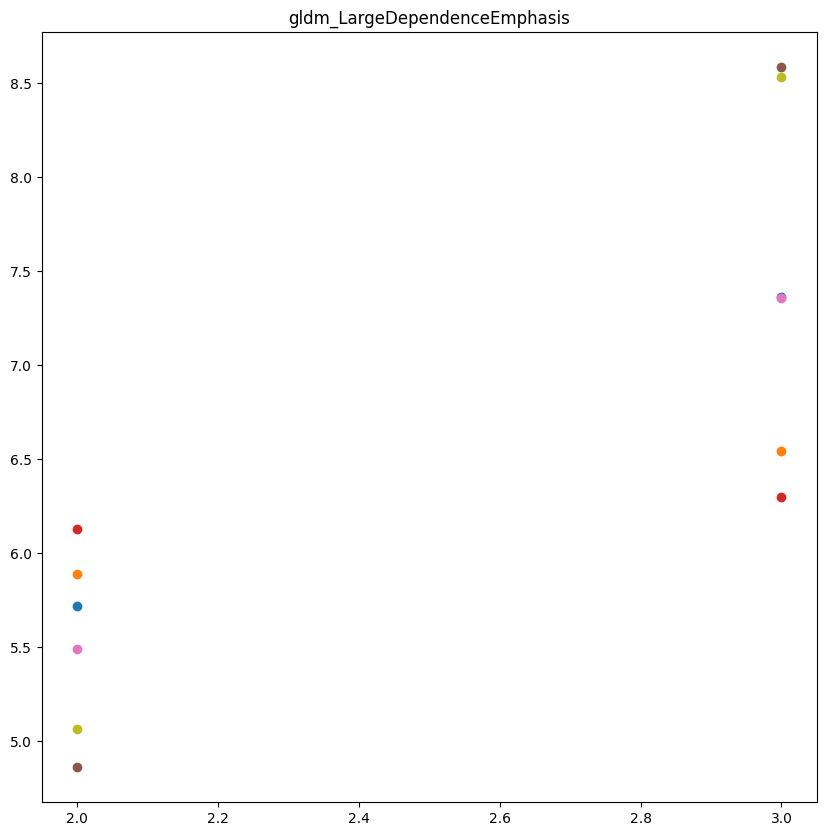

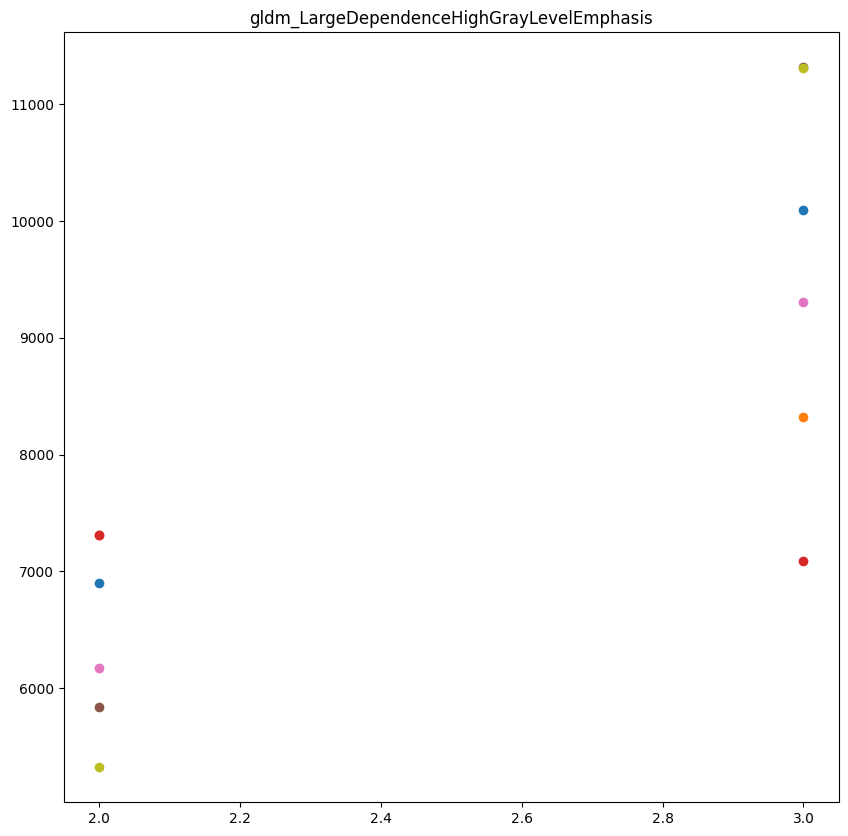

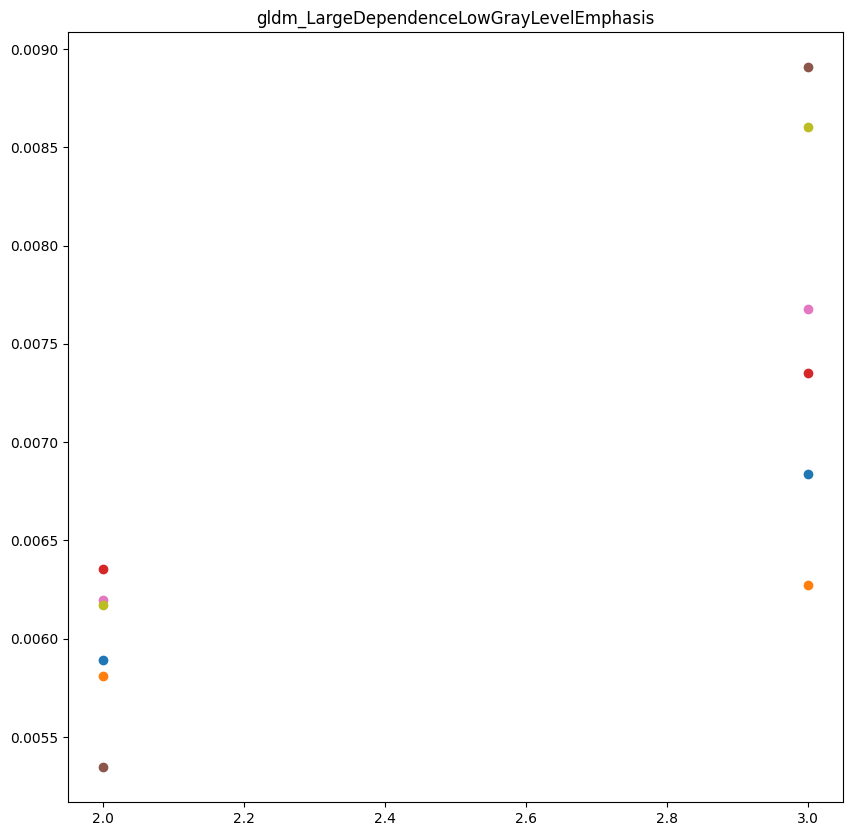

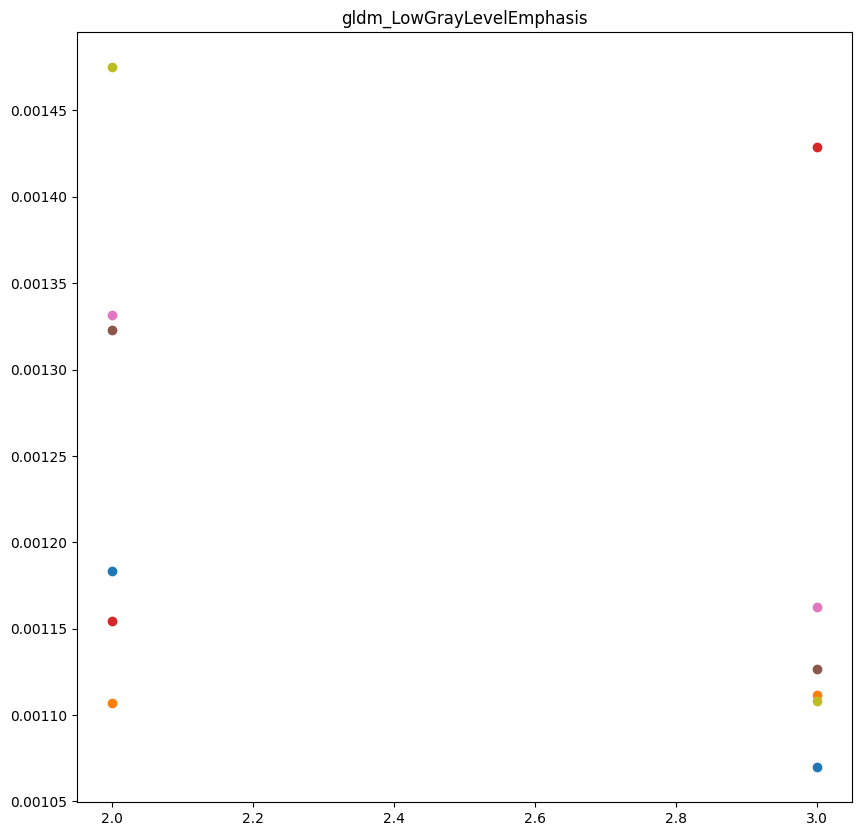

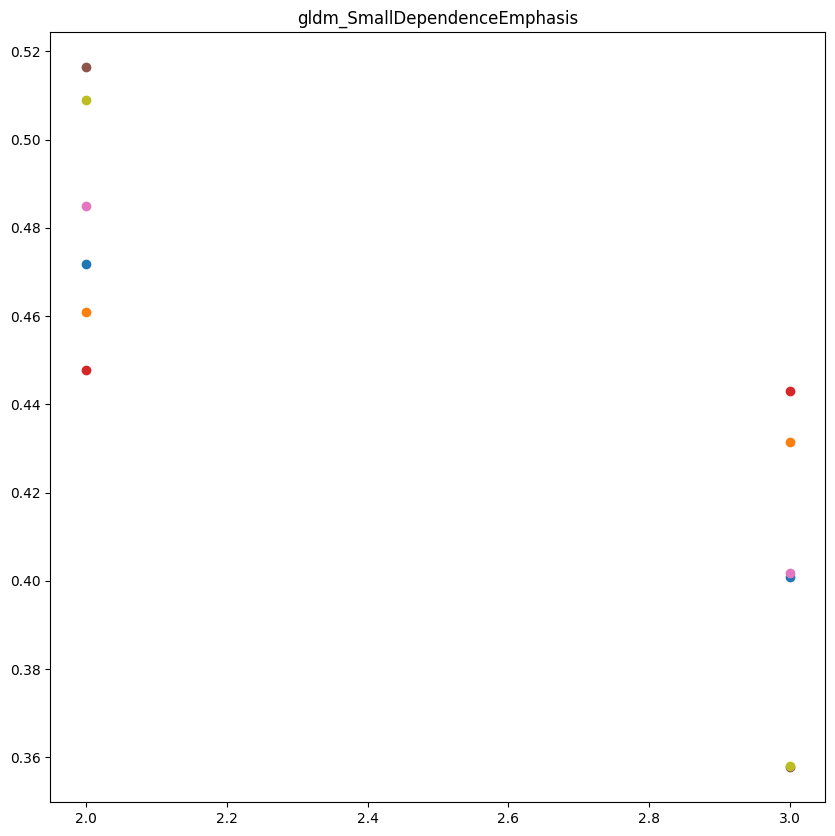

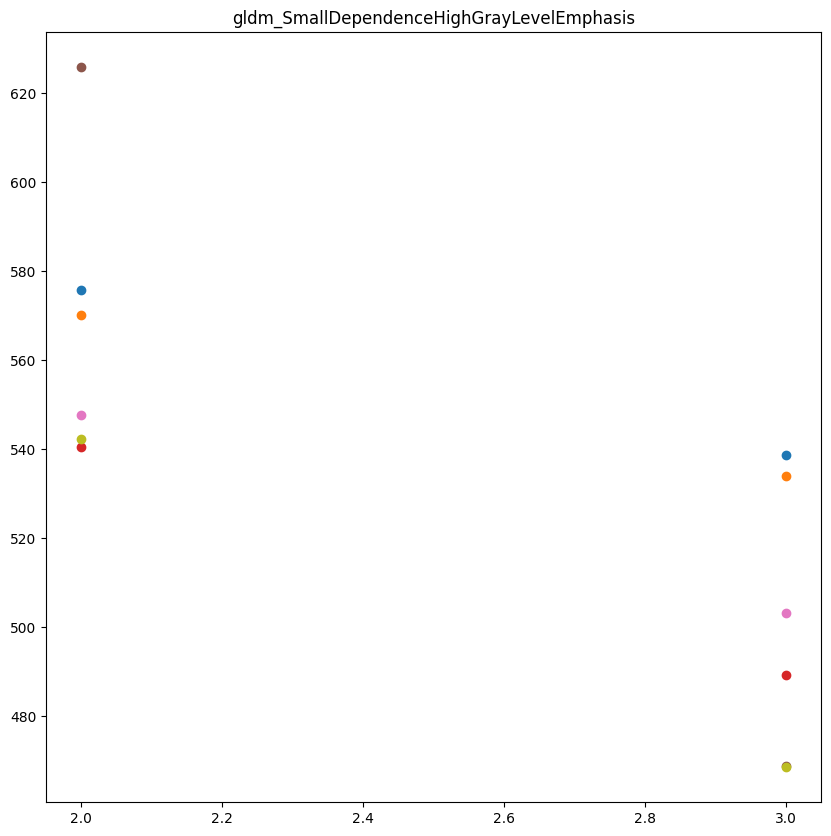

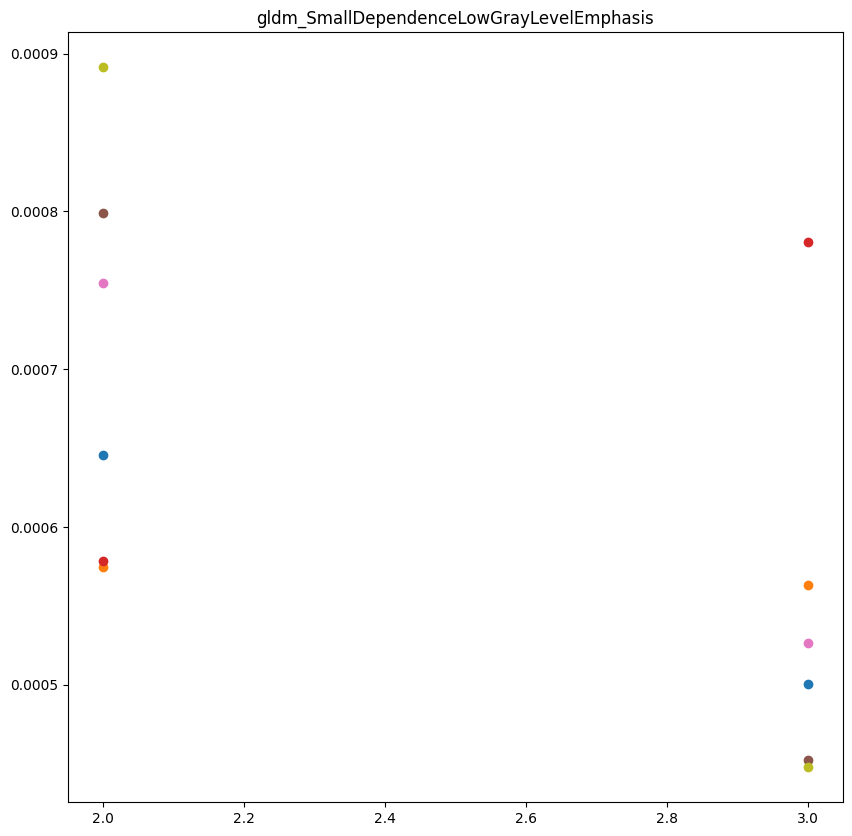

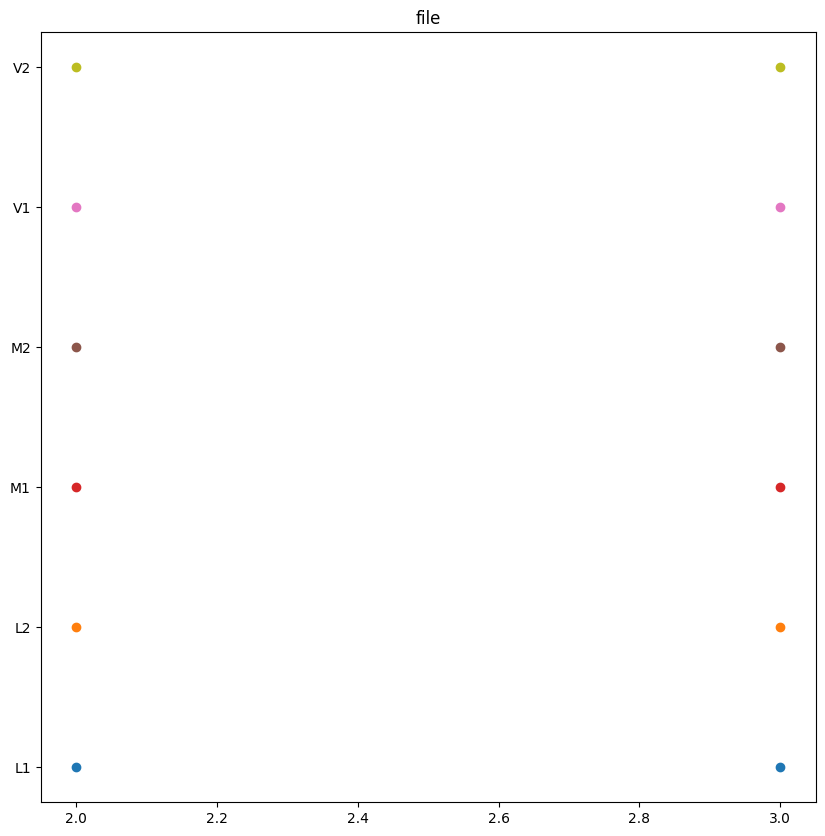

In [177]:
keys = all_df.keys()
key = keys[10] # which feature to plot

for key in keys:
    plt.figure(figsize=(10,10))
    for pat_num in all_df['pat_num'].unique()[0:2]:
    # pat_num = 2
        pat_df = all_df[all_df['pat_num']==pat_num]
        plt.title(key)
        # change color for each point
        for i in range(len(pat_df)):
            plt.plot(pat_df['pat_num'].iloc[i], pat_df[key].iloc[i], 'o', color=plt.cm.tab10(i/len(pat_df)))